# 0. 라이브러리 세팅

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import warnings
warnings.filterwarnings('ignore')
import os

In [4]:
# 맷플롯립 한글 설정 
# matplotlib Korean font
plt.rc('font', family='Malgun Gothic')

In [5]:
# 모든 컬럼을 표시하도록 설정
pd.set_option('display.max_columns', None)

# 컬럼의 너비 제한 해제
pd.set_option('display.max_colwidth', None)

# 출력할 행의 수를 설정 (필요에 따라 조정)
pd.set_option('display.max_rows', 100)


# 1. 행정구역 경계 시각화

In [9]:
# 행정구역 경계 데이터 경로
data_path_emd = "00data/세종특별자치시/36000/TL_SCCO_EMD.shp"
data_path_li = "00data/세종특별자치시/36000/TL_SCCO_LI.shp"
data_path_build = "00data/세종특별자치시/36000/TL_SPBD_BULD.shp"
data_path_rw = "00data/세종특별자치시/36000/TL_SPRD_RW.shp"

# Shapefile 데이터 불러오기
adm_emd = gpd.read_file(data_path_emd, encoding='euc-kr')
adm_li = gpd.read_file(data_path_li, encoding='euc-kr')
building = gpd.read_file(data_path_build, encoding='euc-kr')
rw_poly = gpd.read_file(data_path_rw, encoding='euc-kr')

In [10]:
# 좌표계 설정
adm_emd = adm_emd.set_crs('EPSG:5179')
adm_li = adm_li.set_crs('EPSG:5179')
building = building.set_crs('EPSG:5179')
rw_poly = rw_poly.set_crs('EPSG:5179')

adm_emd_4326 = adm_emd.to_crs(epsg=4326)
adm_li_4326 = adm_li.to_crs(epsg=4326)
building_4326 = building.to_crs(epsg=4326)
rw_poly_4326 = rw_poly.to_crs(epsg=4326)

# 좌표계 확인
print(adm_emd_4326.crs)
print(adm_li_4326.crs)
print(building_4326.crs)
print(rw_poly_4326.crs)

EPSG:4326
EPSG:4326
EPSG:4326
EPSG:4326


In [15]:
# 대상지 경계 파일 불러오기
sejong_zone_adm = gpd.read_file('00data/11.세종시_대상구역도.geojson').copy()
sejong_zone_adm_boundary = sejong_zone_adm.boundary

<Axes: >

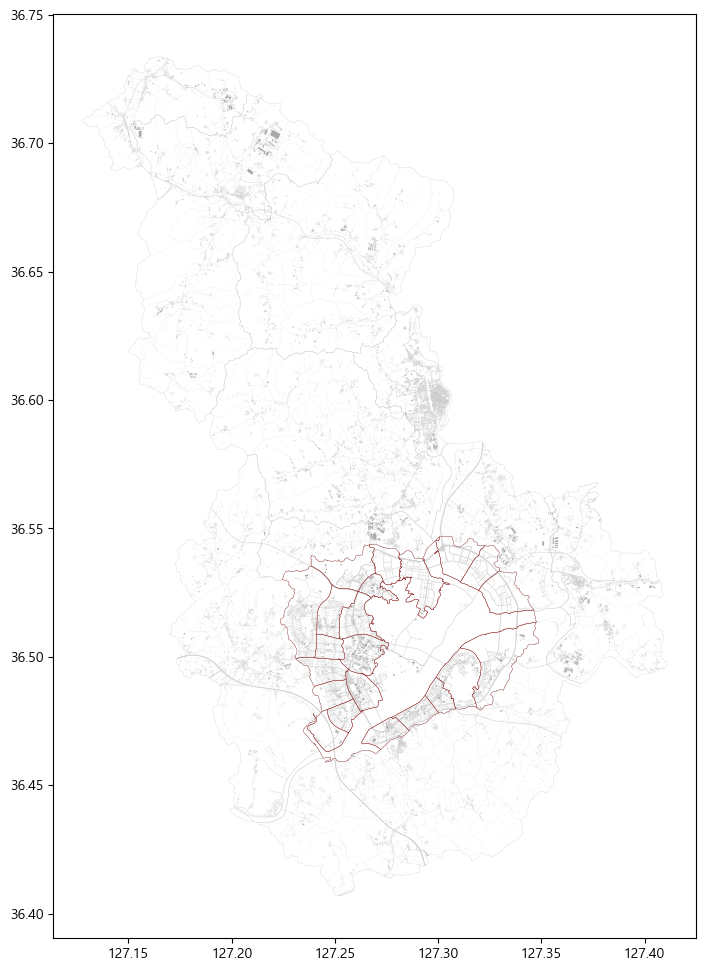

In [16]:
# ax 객체 생성
fig, ax = plt.subplots(figsize=(12, 12))

# 도로 데이터
rw_poly_4326.plot(ax=ax, facecolor='lightgrey', zorder=1) # 요놈이 다 색칠
# 건물 데이터
building_4326.plot(ax=ax, facecolor='darkgrey', zorder=2)

# 각 레이어 스타일 설정
adm_li_4326.plot(ax=ax, edgecolor='lightgrey', facecolor='none', linewidth=0.05, zorder=3)
adm_emd_4326.plot(ax=ax, edgecolor='darkgrey', facecolor='none', linewidth=0.1, zorder=4)

# 세종시 경계
sejong_zone_adm_boundary.plot(ax=ax, facecolor='none', edgecolor='DarkRed', linewidth=0.2, zorder=7)


TypeError: `keep_geom_type` does not support GeometryCollection.

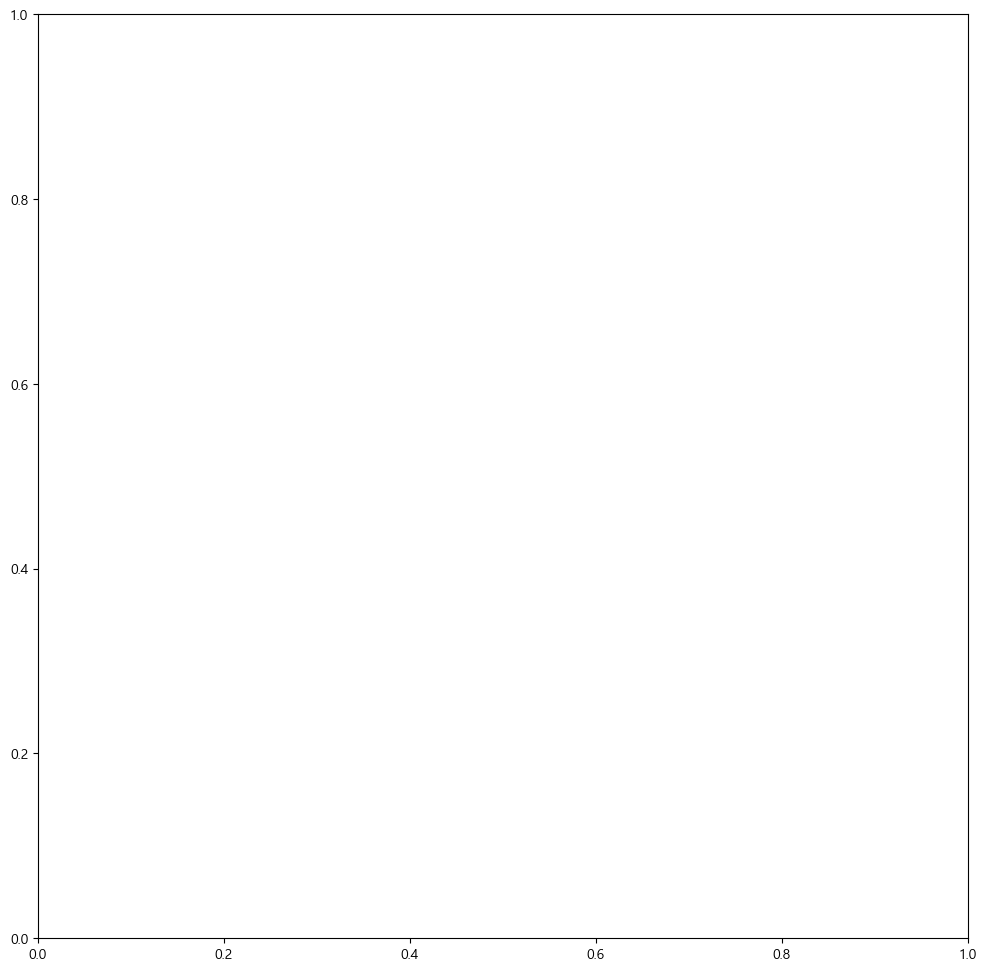

In [23]:
# ax 객체 생성
fig, ax = plt.subplots(figsize=(12, 12))

# 대상구역계 안에 있는 정보만 클리핑 및 추출
# '리(li)'단위는 대상지 밖으로 제외.
# 시군구,시도 단위 데이터는 동일한 경계 & 내부 분할 되어있지 않음.
rw_poly_clipped = gpd.clip(rw_poly_4326, sejong_zone_adm)
building_clipped = gpd.sjoin(building_4326, sejong_zone_adm, how='inner', op='within')

# 도로 데이터
rw_poly_clipped.plot(ax=ax, facecolor='lightgrey', zorder=1)
# 건물 데이터
building_clipped.plot(ax=ax, facecolor='darkgrey', zorder=2)
# 세종시 경계(기존 읍면동 단위)
sejong_zone_adm_boundary.plot(ax=ax, facecolor='none', edgecolor='DarkRed', linewidth=0.2, zorder=3)

plt.show()

## 100x100m 격자 추가

In [27]:
area_grid = gpd.read_file('00data/4.세종시_격자(매핑용).geojson').copy()

print(area_grid.head())

        gid  \
0  다바778286   
1  다바901373   
2  다바806430   
3  다바838306   
4  다바759344   

                                                                                                         geometry  
0  POLYGON ((127.25225 36.45473, 127.25225 36.45563, 127.25337 36.45563, 127.25337 36.45473, 127.25225 36.45473))  
1  POLYGON ((127.38941 36.53337, 127.38941 36.53427, 127.39052 36.53427, 127.39052 36.53337, 127.38941 36.53337))  
2  POLYGON ((127.28314 36.58461, 127.28314 36.58551, 127.28425 36.58551, 127.28426 36.58461, 127.28314 36.58461))  
3  POLYGON ((127.31917 36.47288, 127.31917 36.47378, 127.32028 36.47378, 127.32029 36.47288, 127.31917 36.47288))  
4  POLYGON ((127.23087 36.50697, 127.23087 36.50787, 127.23198 36.50788, 127.23199 36.50697, 127.23087 36.50697))  


In [28]:
# area_grid 좌표계 확인
area_grid.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [29]:
# area_grid.set_crs(epsg=4326, inplace=True)

# 겹치는 부분만 남기고 필터링
area_grid_intsc = gpd.overlay(area_grid, sejong_zone_adm, how='intersection')

# 결과 확인
print(area_grid_intsc.head())

        gid    EMD_CD COL_ADM_SE EMD_NM  \
0  다바759344  36110112      36110    고운동   
1  다바758350  36110112      36110    고운동   
2  다바769344  36110111      36110    종촌동   
3  다바833335  36110101      36110    반곡동   
4  다바759358  36110112      36110    고운동   

                                                                                                         geometry  
0  POLYGON ((127.23087 36.50787, 127.23198 36.50788, 127.23199 36.50697, 127.23087 36.50697, 127.23087 36.50787))  
1  POLYGON ((127.22973 36.51328, 127.23085 36.51328, 127.23085 36.51238, 127.22973 36.51238, 127.22973 36.51328))  
2         POLYGON ((127.24203 36.5079, 127.24315 36.5079, 127.24315 36.507, 127.24204 36.507, 127.24203 36.5079))  
3  POLYGON ((127.31352 36.49992, 127.31464 36.49992, 127.31464 36.49902, 127.31353 36.49902, 127.31352 36.49992))  
4   POLYGON ((127.23082 36.52049, 127.23194 36.5205, 127.23194 36.51959, 127.23082 36.51959, 127.23082 36.52049))  


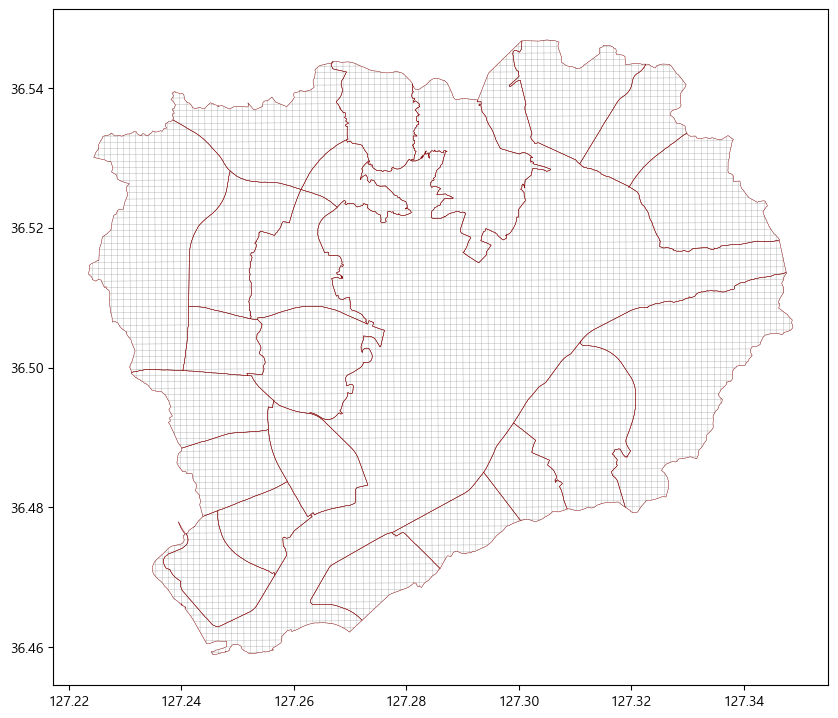

In [30]:
# ax 객체 생성
fig, ax = plt.subplots(figsize=(10, 10))
# ax.axis('off')

# 필터링된 겹치는 부분만 플롯
area_grid_intsc.plot(ax=ax, facecolor='none', edgecolor='gray', linewidth=0.1)
sejong_zone_adm_boundary.plot(ax=ax, facecolor='none', edgecolor='DarkRed', linewidth=0.3)

plt.show()

# | 상가 영업 폐업 현황 파악

# 2. 데이터 정리

## 2.1. 데이터 로드

In [31]:
sanga = pd.read_csv('00data/5.세종시_상가개폐업정보.csv')
category = pd.read_csv('00data/0.지방행정인허가데이터개방_업종코드_업종별영업상태코드목록v2.9.csv')

## 2.1.1. 상가 개폐업 정보 데이터

### # 데이터 파악

In [32]:
print(sanga.shape)
sanga.iloc[25000:25003,:]

(43974, 20)


service_nm    lcpmt_dt rtrcn_dt  biz_stts_cd biz_stts_nm dtls_stts_cd  \
25000      일반음식점  2024-04-30      NaN            1       영업/정상          NaN   
25001      일반음식점  2024-04-30      NaN            1       영업/정상          NaN   
25002      일반음식점  2024-05-01      NaN            1       영업/정상          NaN   

      dtls_stts_nm cls_date tc_strt_dt tc_end_dt re_op_dt  plc_area   zip_cd  \
25000           영업      NaN        NaN       NaN      NaN     35.62  339-009   
25001           영업      NaN        NaN       NaN      NaN     21.75  339-883   
25002           영업      NaN        NaN       NaN      NaN     38.28  339-013   

                            addr  \
25000   세종특별자치시 새롬동 593 새뜸마을6단지    
25001      세종특별자치시 조치원읍 원리 6-19    
25002  세종특별자치시 종촌동 657 종촌 중앙프라자    

                                               rd_addr rd_zip_cd  \
25000  세종특별자치시 새롬중앙1로 13  상가2동 지1층 105호 (새롬동  새뜸마을6단지)       NaN   
25001                    세종특별자치시 조치원읍 새내10길 19  1층 30호       NaN   
25002       세종특별자치시 도움3로 105-5  종촌 중앙프라자 1층 103호 (종촌동)       NaN   

            bplc_nm biz_type         lon        lat  
25000           청달방       기타  127.250117  36.484093  
25001          주막카세       한식  127.299311  36.600737  
25002  본죽&비빔밥 세종종촌점       한식  127.249531  36.504769

1955-10-29 00:00:00
2024-05-31 00:00:00


<Axes: >

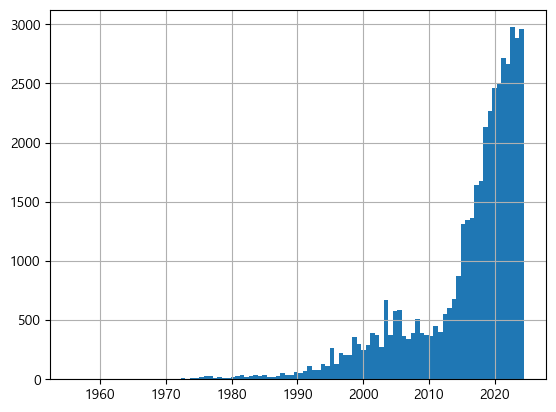

In [33]:
sanga['lcpmt_dt'] = pd.to_datetime(sanga['lcpmt_dt'], errors='coerce')
print(sanga['lcpmt_dt'].min())
print(sanga['lcpmt_dt'].max())
# 날짜 히스토그램
sanga['lcpmt_dt'].hist(bins=100) #히스토그램 막대 100개

In [34]:
# 주소지 전처리
sanga[['addr', 'rd_addr', 'bplc_nm']] = sanga[['addr', 'rd_addr', 'bplc_nm']].apply(lambda x: x.str.replace(r'\s+', ' ', regex=True))
sanga[['addr', 'rd_addr', 'bplc_nm']] = sanga[['addr', 'rd_addr', 'bplc_nm']].apply(lambda x: x.str.strip())
sanga[['addr', 'rd_addr', 'bplc_nm']].head(3)

addr                                     rd_addr  \
0         세종특별자치시 전동면 청람리 21-1                      세종특별자치시 전동면 운주산로 720-6   
1  세종특별자치시 조치원읍 죽림리 389 죽림푸르지오  세종특별자치시 조치원읍 죽림본로 33-6 104동 1304호 (죽림푸르지오)   
2        세종특별자치시 소정면 대곡리 368-8                        세종특별자치시 소정면 학수소사길 63   

     bplc_nm  
0       청수환경  
1  하랑 영농조합법인  
2   (주)금강피스코

### # 대상지 내 데이터만 추출

In [38]:
# 대상구역계 안에 있는 상가들만 추출: 23268개
sejong_zone = gpd.read_file('00data/11.세종시_대상구역도.geojson')
geo_sanga = gpd.GeoDataFrame(sanga, geometry=gpd.points_from_xy(sanga.lon, sanga.lat))
zone_sanga = gpd.sjoin(geo_sanga, sejong_zone, how='inner', predicate='within')
print(zone_sanga.shape)
zone_sanga

(23268, 25)


service_nm   lcpmt_dt rtrcn_dt  biz_stts_cd     biz_stts_nm  \
56         가축사육업 2004-11-05      NaN            4  취소/말소/만료/정지/중지   
75         가축사육업 2004-11-10      NaN            4  취소/말소/만료/정지/중지   
111        가축사육업 2004-12-27      NaN            3              폐업   
112        가축사육업 2004-12-27      NaN            4  취소/말소/만료/정지/중지   
118        가축사육업 2004-12-29      NaN            4  취소/말소/만료/정지/중지   
...          ...        ...      ...          ...             ...   
43969      휴게음식점 2024-05-27      NaN            1           영업/정상   
43970      휴게음식점 2024-05-28      NaN            1           영업/정상   
43971      휴게음식점 2024-05-28      NaN            1           영업/정상   
43972      휴게음식점 2024-05-30      NaN            1           영업/정상   
43973      휴게음식점 2024-05-31      NaN            1           영업/정상   

      dtls_stts_cd dtls_stts_nm    cls_date tc_strt_dt tc_end_dt re_op_dt  \
56             NaN         행정처분         NaN        NaN       NaN      NaN   
75             NaN         행정처분         NaN        NaN       NaN      NaN   
111            NaN           폐업  2007-05-08        NaN       NaN      NaN   
112            NaN         행정처분         NaN        NaN       NaN      NaN   
118            NaN         행정처분         NaN        NaN       NaN      NaN   
...            ...          ...         ...        ...       ...      ...   
43969          NaN           영업         NaN        NaN       NaN      NaN   
43970          NaN           영업         NaN        NaN       NaN      NaN   
43971          NaN           영업         NaN        NaN       NaN      NaN   
43972          NaN           영업         NaN        NaN       NaN      NaN   
43973          NaN           영업         NaN        NaN       NaN      NaN   

       plc_area   zip_cd                       addr  \
56         0.00  339-863    세종특별자치시 연동면 합강리 ***-*번지   
75         0.00  339-834  세종특별자치시 금남면 집현리 ***-***번지   
111        0.00  339-834  세종특별자치시 금남면 집현리 ***-***번지   
112        0.00  339-834        세종특별자치시 반곡동 ***-*번지   
118        0.00  339-834  세종특별자치시 금남면 집현리 ***-***번지   
...         ...      ...                        ...   
43969      3.30      NaN    세종특별자치시 해밀동 334 해밀마을1단지   
43970     49.50  339-005            세종특별자치시 대평동 732   
43971     46.39      NaN    세종특별자치시 산울동 138 산울마을6단지   
43972       NaN      NaN           세종특별자치시 세종동 1204   
43973       NaN  339-003            세종특별자치시 나성동 248   

                                             rd_addr rd_zip_cd        bplc_nm  \
56                              세종특별자치시 연동면 원합강*길 **       NaN           합강목장   
75                            세종특별자치시 금남면 금병로 ***-**       NaN           한림농장   
111                           세종특별자치시 금남면 금병로 ***-**       NaN           금호농장   
112                                              NaN       NaN             창원   
118                               세종특별자치시 금남면 석교길 **       NaN           석교농장   
...                                              ...       ...            ...   
43969      세종특별자치시 해밀3로 32 상가동 1층 140호 (해밀동 해밀마을1단지)       NaN  이마트24 세종해밀마을점   
43970                 세종특별자치시 금남구즉로 19 1층 101호 (대평동)       NaN           카페시온   
43971  세종특별자치시 산울2로 10 근린생활시설B동 B-107호 (산울동 산울마을6단지)       NaN    컴포즈커피 세종산울점   
43972         세종특별자치시 중앙공원로 60 세종시 중앙공원 도시축제마당 (세종동)       NaN           소담곳간   
43973                  세종특별자치시 어울누리로 30 도시상징광장 (나성동)       NaN           방방곳곳   

       biz_type         lon        lat                    geometry  \
56          NaN  127.332681  36.525324  POINT (127.33268 36.52532)   
75          NaN  127.324269  36.487788  POINT (127.32427 36.48779)   
111         NaN  127.326992  36.491780  POINT (127.32699 36.49178)   
112         NaN  127.313923  36.496989  POINT (127.31392 36.49699)   
118         NaN  127.317713  36.485078  POINT (127.31771 36.48508)   
...         ...         ...        ...                         ...   
43969  기타 휴게음식점  127.267367  36.524934  POINT (127.26737 36.52493)   
43970       커피숍  127.282880  36.469593  POINT (127.28288 3

In [40]:
# lcpmt_dt 열을 datetime으로 변환 (잘못된 형식은 NaT로 변환)
zone_sanga['lcpmt_dt'] = pd.to_datetime(zone_sanga['lcpmt_dt'], errors='coerce')

# cls_date 열을 datetime으로 변환 (잘못된 형식은 NaT로 변환)
zone_sanga['cls_date'] = pd.to_datetime(zone_sanga['cls_date'], errors='coerce')

# 개업일(lcpmt_dt) 순으로 정렬
zone_sanga = zone_sanga.sort_values(by='lcpmt_dt')

# 결과 확인
print(zone_sanga.shape)
zone_sanga.head(3)


(23268, 25)


service_nm   lcpmt_dt rtrcn_dt  biz_stts_cd biz_stts_nm dtls_stts_cd  \
41352      휴게음식점 1974-05-16      NaN            3          폐업          NaN   
16418      일반음식점 1974-06-29      NaN            3          폐업          NaN   
4008       담배소매업 1975-07-01      NaN            3          폐업          NaN   

      dtls_stts_nm   cls_date tc_strt_dt tc_end_dt re_op_dt  plc_area  \
41352           폐업 2014-04-18        NaN       NaN      NaN       NaN   
16418           폐업 2018-11-09        NaN       NaN      NaN     27.82   
4008          폐업처리 2007-06-19        NaN       NaN      NaN       NaN   

        zip_cd                                        addr  \
41352  339-012                         세종특별자치시 어진동 110-6번지   
16418  339-014  세종특별자치시 한솔동 0번지 행복도시B-1블록 첫마을아파트 상가동 B101호   
4008       NaN                    세종특별자치시 금남면 집현리 785-74번지   

                                              rd_addr rd_zip_cd bplc_nm  \
41352                                             NaN       NaN     수다실   
16418  세종특별자치시 누리로 119 상가동 지하1층 B101호 (한솔동 첫마을아파트4단지)       NaN     오셰프   
4008                                              NaN       NaN     새가게   

      biz_type         lon        lat                    geometry  \
41352       다방  127.261170  36.501689  POINT (127.26117 36.50169)   
16418       기타  127.252174  36.480617  POINT (127.25217 36.48062)   
4008       NaN  127.323478  36.490075  POINT (127.32348 36.49008)   

       index_right    EMD_CD COL_ADM_SE EMD_NM  
41352            9  36110110      36110    어진동  
16418            5  36110106      36110    한솔동  
4008            17  36110118      36110    집현동

### # 영업상태에 따른 상가 현황 파악

In [41]:
# 영업상태 고유값 확인
zone_sanga['biz_stts_nm'].unique()

array(['폐업', '영업/정상', '취소/말소/만료/정지/중지', '휴업'], dtype=object)

In [42]:
# 영업/정상 or 폐업으로만 분리
zone_sanga = zone_sanga[(zone_sanga['biz_stts_nm'] == '영업/정상') | (zone_sanga['biz_stts_nm'] == '폐업')]

In [43]:
# zone_sanga 필요없는 열 제거
zone_sanga = zone_sanga.drop(columns=['rtrcn_dt','dtls_stts_cd','dtls_stts_nm','tc_strt_dt','tc_end_dt','re_op_dt'])

print(zone_sanga.shape) # (23268,25) => (22865,19)
zone_sanga.head(3)

(22865, 19)


service_nm   lcpmt_dt  biz_stts_cd biz_stts_nm   cls_date  plc_area  \
41352      휴게음식점 1974-05-16            3          폐업 2014-04-18       NaN   
16418      일반음식점 1974-06-29            3          폐업 2018-11-09     27.82   
4008       담배소매업 1975-07-01            3          폐업 2007-06-19       NaN   

        zip_cd                                        addr  \
41352  339-012                         세종특별자치시 어진동 110-6번지   
16418  339-014  세종특별자치시 한솔동 0번지 행복도시B-1블록 첫마을아파트 상가동 B101호   
4008       NaN                    세종특별자치시 금남면 집현리 785-74번지   

                                              rd_addr rd_zip_cd bplc_nm  \
41352                                             NaN       NaN     수다실   
16418  세종특별자치시 누리로 119 상가동 지하1층 B101호 (한솔동 첫마을아파트4단지)       NaN     오셰프   
4008                                              NaN       NaN     새가게   

      biz_type         lon        lat                    geometry  \
41352       다방  127.261170  36.501689  POINT (127.26117 36.50169)   
16418       기타  127.252174  36.480617  POINT (127.25217 36.48062)   
4008       NaN  127.323478  36.490075  POINT (127.32348 36.49008)   

       index_right    EMD_CD COL_ADM_SE EMD_NM  
41352            9  36110110      36110    어진동  
16418            5  36110106      36110    한솔동  
4008            17  36110118      36110    집현동

In [44]:
zone_sanga['biz_stts_nm'].unique()

array(['폐업', '영업/정상'], dtype=object)

## 2.1.2. 지방행정인허가 데이터 (업종별 대분류 확인)

### # 데이터 파악

In [45]:
print(category.shape)
category

(198, 7)


카테고리 분류코드 카테고리 분류명  업종그룹코드   업종그룹명        업종코드           업종명   비고
0          1.0       건강     1.0    의료기관  01_01_01_P            병원  NaN
1          NaN      NaN     NaN     NaN  01_01_02_P            의원  NaN
2          NaN      NaN     NaN     NaN  01_01_03_P        부속의료기관  NaN
3          NaN      NaN     NaN     NaN  01_01_04_P         산후조리업  NaN
4          NaN      NaN     NaN     NaN  01_01_05_P  안전상비의약품 판매업소  NaN
..         ...      ...     ...     ...         ...           ...  ...
193        NaN      NaN    49.0  전문교육기관  11_49_01_P     요양보호사교육기관  NaN
194        NaN      NaN     NaN     NaN  11_49_02_P    장례지도사 교육기관  NaN
195        NaN      NaN    50.0    사무지원  11_50_01_P       무료직업소개소  NaN
196        NaN      NaN     NaN     NaN  11_50_02_P       유료직업소개소  NaN
197        NaN      NaN     NaN     NaN  11_50_03_P          행정사업   삭제

[198 rows x 7 columns]

In [46]:
category = category.fillna(method='ffill')
category

카테고리 분류코드 카테고리 분류명  업종그룹코드   업종그룹명        업종코드           업종명   비고
0          1.0       건강     1.0    의료기관  01_01_01_P            병원  NaN
1          1.0       건강     1.0    의료기관  01_01_02_P            의원  NaN
2          1.0       건강     1.0    의료기관  01_01_03_P        부속의료기관  NaN
3          1.0       건강     1.0    의료기관  01_01_04_P         산후조리업  NaN
4          1.0       건강     1.0    의료기관  01_01_05_P  안전상비의약품 판매업소  NaN
..         ...      ...     ...     ...         ...           ...  ...
193       11.0       기타    49.0  전문교육기관  11_49_01_P     요양보호사교육기관   삭제
194       11.0       기타    49.0  전문교육기관  11_49_02_P    장례지도사 교육기관   삭제
195       11.0       기타    50.0    사무지원  11_50_01_P       무료직업소개소   삭제
196       11.0       기타    50.0    사무지원  11_50_02_P       유료직업소개소   삭제
197       11.0       기타    50.0    사무지원  11_50_03_P          행정사업   삭제

[198 rows x 7 columns]

### # 필요한 컬럼 추출 및 컬럼명 변경

In [47]:
# 필요없는 열 제거 (코드 관련 열)
category = category.drop(columns=['카테고리 분류코드','업종그룹코드','업종코드','비고'])
category

카테고리 분류명   업종그룹명           업종명
0         건강    의료기관            병원
1         건강    의료기관            의원
2         건강    의료기관        부속의료기관
3         건강    의료기관         산후조리업
4         건강    의료기관  안전상비의약품 판매업소
..       ...     ...           ...
193       기타  전문교육기관     요양보호사교육기관
194       기타  전문교육기관    장례지도사 교육기관
195       기타    사무지원       무료직업소개소
196       기타    사무지원       유료직업소개소
197       기타    사무지원          행정사업

[198 rows x 3 columns]

In [48]:
# 열 이름 변경
category = category.rename(columns={'카테고리 분류명':'major','업종그룹명':'group','업종명': 'service_nm'})
category

major   group    service_nm
0      건강    의료기관            병원
1      건강    의료기관            의원
2      건강    의료기관        부속의료기관
3      건강    의료기관         산후조리업
4      건강    의료기관  안전상비의약품 판매업소
..    ...     ...           ...
193    기타  전문교육기관     요양보호사교육기관
194    기타  전문교육기관    장례지도사 교육기관
195    기타    사무지원       무료직업소개소
196    기타    사무지원       유료직업소개소
197    기타    사무지원          행정사업

[198 rows x 3 columns]

## 2.1.3. 상가개폐업 데이터 + 지방행정인허가 데이터

In [49]:
zone_sanga_cat = pd.merge(zone_sanga, category, how='left', on='service_nm')
print(zone_sanga_cat.shape)
zone_sanga_cat.head(3)

(22865, 21)


service_nm   lcpmt_dt  biz_stts_cd biz_stts_nm   cls_date  plc_area  \
0      휴게음식점 1974-05-16            3          폐업 2014-04-18       NaN   
1      일반음식점 1974-06-29            3          폐업 2018-11-09     27.82   
2      담배소매업 1975-07-01            3          폐업 2007-06-19       NaN   

    zip_cd                                        addr  \
0  339-012                         세종특별자치시 어진동 110-6번지   
1  339-014  세종특별자치시 한솔동 0번지 행복도시B-1블록 첫마을아파트 상가동 B101호   
2      NaN                    세종특별자치시 금남면 집현리 785-74번지   

                                          rd_addr rd_zip_cd bplc_nm biz_type  \
0                                             NaN       NaN     수다실       다방   
1  세종특별자치시 누리로 119 상가동 지하1층 B101호 (한솔동 첫마을아파트4단지)       NaN     오셰프       기타   
2                                             NaN       NaN     새가게      NaN   

          lon        lat                    geometry  index_right    EMD_CD  \
0  127.261170  36.501689  POINT (127.26117 36.50169)            9  36110110   
1  127.252174  36.480617  POINT (127.25217 36.48062)            5  36110106   
2  127.323478  36.490075  POINT (127.32348 36.49008)           17  36110118   

  COL_ADM_SE EMD_NM major group  
0      36110    어진동    식품   음식점  
1      36110    한솔동    식품   음식점  
2      36110    집현동    기타    담배

In [29]:
# 원하는 컬럼 순서 정의
cols = ['EMD_CD','COL_ADM_SE','EMD_NM','major','group','service_nm'] + [col for col in zone_sanga_cat.columns if col not in ['EMD_CD','COL_ADM_SE','EMD_NM','major','group','service_nm']]
# 컬럼 순서 변경
zone_sanga_cat = zone_sanga_cat[cols]
print(zone_sanga_cat.shape)
zone_sanga_cat.head()

(22865, 21)


EMD_CD COL_ADM_SE EMD_NM major        group service_nm   lcpmt_dt  \
0  36110110      36110    어진동    식품          음식점      휴게음식점 1974-05-16   
1  36110106      36110    한솔동    식품          음식점      일반음식점 1974-06-29   
2  36110118      36110    집현동    기타           담배      담배소매업 1975-07-01   
3  36110121      36110    한별동    식품  식품 제조/가공/판매    식품제조가공업 1976-10-27   
4  36110119      36110    세종동    식품  식품 제조/가공/판매  즉석판매제조가공업 1979-01-20   

   biz_stts_cd biz_stts_nm   cls_date  plc_area   zip_cd  \
0            3          폐업 2014-04-18       NaN  339-012   
1            3          폐업 2018-11-09     27.82  339-014   
2            3          폐업 2007-06-19       NaN      NaN   
3            3          폐업 2003-04-10       NaN  339-825   
4            3          폐업 2010-11-01       NaN  339-821   

                                         addr  \
0                         세종특별자치시 어진동 110-6번지   
1  세종특별자치시 한솔동 0번지 행복도시B-1블록 첫마을아파트 상가동 B101호   
2                    세종특별자치시 금남면 집현리 785-74번지   
3                      세종특별자치시 연기면 한별리 92-1번지   
4                     세종특별자치시 연기면 세종리 735-239   

                                          rd_addr rd_zip_cd bplc_nm  \
0                                             NaN       NaN     수다실   
1  세종특별자치시 누리로 119 상가동 지하1층 B101호 (한솔동 첫마을아파트4단지)       NaN     오셰프   
2                                             NaN       NaN     새가게   
3                                             NaN       NaN   오케이식품   
4                                             NaN       NaN   성전가공소   

    biz_type         lon        lat                    geometry  index_right  
0         다방  127.261170  36.501689  POINT (127.26117 36.50169)            9  
1         기타  127.252174  36.480617  POINT (127.25217 36.48062)            5  
2        NaN  127.323478  36.490075  POINT (127.32348 36.49008)           17  
3    식품제조가공업  127.280942  36.539398  POINT (127.28094 36.53940)           20  
4  즉석판매제조가공업  127.282061  36.503655  POINT (127.28206 36.50365)           18

# 2.2. "업종별" 상가 개수 및 폐업률 현황 ('영업/정상'과 '폐업' 상가 각각 파악)

### # '영업/정상' 과 '폐업' 각각 변수 지정

In [30]:
# "영업/정상"인 행만 추출
zone_sanga_op = zone_sanga_cat[zone_sanga_cat['biz_stts_nm'] == '영업/정상']
print(zone_sanga_op.shape)
zone_sanga_op

(14188, 21)


EMD_CD COL_ADM_SE EMD_NM major        group   service_nm   lcpmt_dt  \
9      36110101      36110    반곡동    기타          미디어          출판사 1981-08-11   
14     36110101      36110    반곡동    기타          미디어          출판사 1983-07-07   
26     36110101      36110    반곡동    기타          미디어          출판사 1988-09-13   
34     36110101      36110    반곡동    기타          미디어          출판사 1990-11-06   
57     36110101      36110    반곡동    기타          미디어          출판사 1993-10-23   
...         ...        ...    ...   ...          ...          ...        ...   
22859  36110110      36110    어진동    식품  식품 제조/가공/판매    즉석판매제조가공업 2024-05-31   
22860  36110107      36110    나성동    생활           유통        통신판매업 2024-05-31   
22861  36110104      36110    대평동    식품  식품 제조/가공/판매  건강기능식품일반판매업 2024-05-31   
22862  36110110      36110    어진동    생활           유통        통신판매업 2024-05-31   
22863  36110106      36110    한솔동    기타           담배        담배소매업 2024-05-31   

       biz_stts_cd biz_stts_nm cls_date  plc_area   zip_cd  \
9                1       영업/정상      NaT       NaN      NaN   
14               1       영업/정상      NaT       NaN      NaN   
26               1       영업/정상      NaT       NaN  339-007   
34               1       영업/정상      NaT       NaN      NaN   
57               1       영업/정상      NaT       NaN      NaN   
...            ...         ...      ...       ...      ...   
22859            1       영업/정상      NaT      0.78  339-012   
22860            1       영업/정상      NaT       NaN      NaN   
22861            1       영업/정상      NaT      3.30  339-005   
22862            1       영업/정상      NaT       NaN      NaN   
22863            1       영업/정상      NaT       NaN      NaN   

                                addr  \
9                 세종특별자치시 반곡동 ***-**   
14     세종특별자치시 반곡동 *** 나라키움 세종국책연구단지   
26                   세종특별자치시 반곡동 ***   
34                   세종특별자치시 반곡동 ***   
57     세종특별자치시 반곡동 *** 나라키움 세종국책연구단지   
...                              ...   
22859           세종특별자치시 어진동 670 에비뉴힐   
22860       세종특별자치시 나성동 *** 나릿재마을*단지   
22861          세종특별자치시 대평동 *** 아마존타워   
22862       세종특별자치시 어진동 *** 세종파이낸스센터   
22863         세종특별자치시 한솔동 978 첫마을7단지   

                                            rd_addr rd_zip_cd  \
9                   세종특별자치시 국책연구원로 ** (반곡동 한국법제연구원)     30147   
14       세종특별자치시 시청대로 *** 나라키움 세종국책연구단지 경제정책동 (반곡동)     30147   
26             세종특별자치시 시청대로 *** 경제정책동 *층 ***호 (반곡동)   339-007   
34             세종특별자치시 시청대로 *** (반곡동 나라키움 세종국책연구단지)     30147   
57        세종특별자치시 시청대로 *** 나라키움 세종국책연구단지 *~*층 (반곡동)     30147   
...                                             ...       ...   
22859    세종특별자치시 갈매로 353 에비뉴힐 A동 2층 2007(일부)호 (어진동)       NaN   
22860      세종특별자치시 국세청로 ** 상가동 B***호 (나성동 나릿재마을*단지)     30128   
22861           세종특별자치시 시청대로 ** 아마존타워 *층 ***호 (대평동)       NaN   
22862       세종특별자치시 갈매로 *** 세종파이낸스센터 ***-D**호 (어진동)     30121   
22863  세종특별자치시 나리로 38 제상가동 제지1층 제비105호 (한솔동 첫마을7단지)     30130   

                 bplc_nm   biz_type         lon        lat  \
9                한국법제연구원        NaN  127.302147  36.492206   
14                 산업연구원        NaN  127.304607  36.496378   
26               한국노동연구원        NaN  127.304607  36.496378   
34             대외경제정책연구원        NaN  127.304607  36.496378   
57            한국청소년정책연구원        NaN  127.304607  36.496378   
...                  ...        ...         ...        ...   
22859             내맘에 꽃청  즉석판매제조가공업  127.262395  36.495601   
22860       이마트24 세종풍경채점        종합몰  127.261964  36.489109   
22861               광고혁명        NaN  127.275330  36.474465   
22862                도도랑        종합몰  127.262829  36.496339   
22863  지에스25(GS25)세종래미안점        NaN  127.256030  36.473031   

                         geometry  index_right  
9      POINT (127.30215 36.49221)            0  
14     POINT (127.30461 36.49638)            0  
26     POINT (127.30461 36.49638)            0  
34     POINT (127.30461 36.49638)            0  
57     POINT (127.30461 36.49638)            0  
..

In [31]:
# "폐업"인 행만 추출
zone_sanga_cl = zone_sanga_cat[zone_sanga_cat['biz_stts_nm'] == '폐업']
print(zone_sanga_cl.shape)
zone_sanga_cl

(8677, 21)


EMD_CD COL_ADM_SE EMD_NM major        group   service_nm   lcpmt_dt  \
0      36110110      36110    어진동    식품          음식점        휴게음식점 1974-05-16   
1      36110106      36110    한솔동    식품          음식점        일반음식점 1974-06-29   
2      36110118      36110    집현동    기타           담배        담배소매업 1975-07-01   
3      36110121      36110    한별동    식품  식품 제조/가공/판매      식품제조가공업 1976-10-27   
4      36110119      36110    세종동    식품  식품 제조/가공/판매    즉석판매제조가공업 1979-01-20   
...         ...        ...    ...   ...          ...          ...        ...   
22777  36110107      36110    나성동    식품  식품 제조/가공/판매    즉석판매제조가공업 2024-05-24   
22782  36110107      36110    나성동    식품  식품 제조/가공/판매    즉석판매제조가공업 2024-05-24   
22824  36110106      36110    한솔동    건강         의료기기  의료기기판매(임대)업 2024-05-28   
22832  36110110      36110    어진동    건강         의료기기  의료기기판매(임대)업 2024-05-29   
22864  36110101      36110    반곡동    기타           담배        담배소매업        NaT   

       biz_stts_cd biz_stts_nm   cls_date  plc_area   zip_cd  \
0                3          폐업 2014-04-18       NaN  339-012   
1                3          폐업 2018-11-09     27.82  339-014   
2                3          폐업 2007-06-19       NaN      NaN   
3                3          폐업 2003-04-10       NaN  339-825   
4                3          폐업 2010-11-01       NaN  339-821   
...            ...         ...        ...       ...      ...   
22777            3          폐업 2024-05-26       NaN  339-003   
22782            3          폐업 2024-05-25       NaN  339-003   
22824            3          폐업 2024-06-04       NaN      NaN   
22832            3          폐업 2024-05-29       NaN      NaN   
22864            3          폐업 2006-09-20       NaN      NaN   

                                             addr  \
0                             세종특별자치시 어진동 110-6번지   
1      세종특별자치시 한솔동 0번지 행복도시B-1블록 첫마을아파트 상가동 B101호   
2                        세종특별자치시 금남면 집현리 785-74번지   
3                          세종특별자치시 연기면 한별리 92-1번지   
4                         세종특별자치시 연기면 세종리 735-239   
...                                           ...   
22777                             세종특별자치시 나성동 248   
22782                             세종특별자치시 나성동 248   
22824                      세종특별자치시 한솔동 *** 첫마을*단지   
22832            세종특별자치시 어진동 ***번지 세종비지니스센터 세종세무서   
22864                         세종특별자치시 반곡동 375-4번지   

                                              rd_addr rd_zip_cd  \
0                                                 NaN       NaN   
1      세종특별자치시 누리로 119 상가동 지하1층 B101호 (한솔동 첫마을아파트4단지)       NaN   
2                                                 NaN       NaN   
3                                                 NaN       NaN   
4                                                 NaN       NaN   
...                                               ...       ...   
22777                          세종특별자치시 어울누리로 30 (나성동)       NaN   
22782                   세종특별자치시 어울누리로 30 도시상징광장 (나성동)       NaN   
22824       세종특별자치시 나리로 ** 상가동 지*층 비***호 (한솔동 첫마을*단지)     30130   
22832    세종특별자치시 가름로 *** 세종비지니스센터 세종세무서 *층 ***호 (어진동)     30121   
22864                                             NaN       NaN   

                      bplc_nm   biz_type         lon        lat  \
0                         수다실         다방  127.261170  36.501689   
1                         오셰프         기타  127.252174  36.480617   
2                         새가게        NaN  127.323478  36.490075   
3                       오케이식품    식품제조가공업  127.280942  36.539398   
4                       성전가공소  즉석판매제조가공업  127.282061  36.503655   
...                       ...        ...         ...        ...   
22777                   달빛제유소  즉석판매제조가공업  127.264220  36.486289   
22782  주식회사 세종시한글빵(단비캐릭터 솜사탕)  즉석판매제조가공업  127.264220  36.486289   
22824            지에스25 세종래미안점        NaN  127.256030  36.473031   
22832       Smart dental mall        NaN  127.264908  36.495627   
22864                    효정슈퍼        NaN  127.311858  36.494970   

                         geometr

#### # 결측치 제거

In [32]:
# 결측치 행 개수 파악
print(zone_sanga_cl['lcpmt_dt'].isna().sum()) # "폐업" 내 "지정일자(lcpmt_dt)" 결측치 행 개수 파악
print(zone_sanga_cl['cls_date'].isna().sum()) # "폐업" 내 "영업종료(cls_date)" 결측치 행 개수 파악
print(zone_sanga_op['lcpmt_dt'].isna().sum()) # "영업" 내 "지정일자(lcpmt_dt)" 결측치 행 개수 파악
print(zone_sanga_op['cls_date'].isna().sum()) # "영업" 내 "영업종료(cls_date)" 결측치 행 개수 파악 # 결측치 개수 = 총 행 개수 인게 맞는지 확인

1
21
0
14188


In [33]:
# 결측치 행 위치 파악
print(zone_sanga_cl[zone_sanga_cl['lcpmt_dt'].isna()].index) # "폐업" 내 "지정일자(lcpmt_dt)" 결측치 행 위치 파악
print(zone_sanga_cl[zone_sanga_cl['cls_date'].isna()].index) # "폐업" 내 "영업종료(cls_date)" 결측치 행 위치 파악

Int64Index([22864], dtype='int64')
Int64Index([   18,    84,    85,   138,   207,   259,   566,   666,  1041,
             2097,  2803,  5854,  6297,  7285,  8011,  8048,  9108,  9121,
            10197, 10206, 12424],
           dtype='int64')


In [34]:
# "폐업" 내 "지정일자(lcpmt_dt)" 결측치 행 전체 확인
zone_sanga_cl[zone_sanga_cl['lcpmt_dt'].isna()]

EMD_CD COL_ADM_SE EMD_NM major group service_nm lcpmt_dt  \
22864  36110101      36110    반곡동    기타    담배      담배소매업      NaT   

       biz_stts_cd biz_stts_nm   cls_date  plc_area zip_cd  \
22864            3          폐업 2006-09-20       NaN    NaN   

                      addr rd_addr rd_zip_cd bplc_nm biz_type         lon  \
22864  세종특별자치시 반곡동 375-4번지     NaN       NaN    효정슈퍼      NaN  127.311858   

            lat                    geometry  index_right  
22864  36.49497  POINT (127.31186 36.49497)            0

In [35]:
# "폐업" 내 "영업종료(cls_date)" 결측치 행 전체 확인
zone_sanga_cl[zone_sanga_cl['cls_date'].isna()]

EMD_CD COL_ADM_SE EMD_NM major        group       service_nm  \
18     36110118      36110    집현동  자원환경         환경관리  대기오염물질배출시설설치사업장   
84     36110111      36110    종촌동  자원환경         환경관리    수질오염원설치시설(기타)   
85     36110111      36110    종촌동  자원환경         환경관리    수질오염원설치시설(기타)   
138    36110103      36110    보람동    식품  식품 제조/가공/판매            축산가공업   
207    36110112      36110    고운동  자원환경         환경관리  대기오염물질배출시설설치사업장   
259    36110104      36110    대평동  자원환경          지하수          지하수시공업체   
566    36110120      36110    누리동  자원환경         환경관리  대기오염물질배출시설설치사업장   
666    36110120      36110    누리동  자원환경         환경관리  대기오염물질배출시설설치사업장   
1041   36110110      36110    어진동  자원환경          지하수          지하수시공업체   
2097   36110114      36110    도담동  자원환경           목재            원목생산업   
2803   36110114      36110    도담동  자원환경           목재            원목생산업   
5854   36110113      36110    아름동    건강         의료기관            의료유사업   
6297   36110110      36110    어진동    기타          미디어              출판사   
7285   36110103      36110    보람동  자원환경          에너지         전력기술감리업체   
8011   36110107      36110    나성동  자원환경          에너지         전력기술설계업체   
8048   36110107      36110    나성동  자원환경          에너지         전력기술감리업체   
9108   36110104      36110    대평동  자원환경          에너지         전력기술설계업체   
9121   36110104      36110    대평동  자원환경          에너지         전력기술감리업체   
10197  36110107      36110    나성동  자원환경          지하수        지하수영향조사기관   
10206  36110107      36110    나성동  자원환경          지하수          지하수시공업체   
12424  36110104      36110    대평동  자원환경          지하수          지하수시공업체   

        lcpmt_dt  biz_stts_cd biz_stts_nm cls_date  plc_area   zip_cd  \
18    1984-05-30            3          폐업      NaT       NaN  339-834   
84    1995-05-19            3          폐업      NaT       NaN  314-912   
85    1995-05-19            3          폐업      NaT       NaN  314-910   
138   1998-09-05            3          폐업      NaT       0.0      NaN   
207   2001-09-05            3          폐업      NaT       NaN      NaN   
259   2003-07-30            3          폐업      NaT       NaN      NaN   
566   2012-07-01            3          폐업      NaT       NaN      NaN   
666   2013-01-11            3          폐업      NaT       NaN      NaN   
1041  2014-05-12            3          폐업      NaT       NaN      NaN   
2097  2015-07-27            3          폐업      NaT       NaN      NaN   
2803  2016-03-14            3          폐업      NaT       NaN      NaN   
5854  2018-04-30            3          폐업      NaT       NaN      NaN   
6297  2018-07-17            3          폐업      NaT       NaN      NaN   
7285  2019-01-03            3          폐업      NaT       NaN      NaN   
8011  2019-04-25            3          폐업      NaT       NaN      NaN   
8048  2019-04-30            3          폐업      NaT       NaN      NaN   
9108  2019-10-16            3          폐업      NaT       NaN      NaN   
9121  2019-10-17            3          폐업      NaT       NaN      NaN   
10197 2020-03-18            3          폐업      NaT       NaN      NaN   
10206 2020-03-19            3          폐업      NaT       NaN      NaN   
12424 2021-01-25            3          폐업      NaT       NaN      NaN   

                                  addr  \
18               세종특별자치시 금남면 집현리 193번지   
84                   세종특별자치시 종촌동 179-3   
85                   세종특별자치시 종촌동 179-0   
138                 세종특별자치시 보람동 38-1번지   
207                세종특별자치시 고운동 584-0번지   
259               세종특별자치시 대평동 265-24번지   
566           세종특별자치시 연기면 누리리 194-12번지   
666    세종특별자치시 연기면 누리리 194-45번지 월산산업단지   
1041                               NaN   
2097                               NaN   
2803                               NaN   
5854     세종특별자치시 아름동 1296번지 해피라움1 408호   
6297   세종특별자치시 어진동 ***번지 세종시 *차 푸르지오시티   
7285                               NaN   
8011                               NaN   
8048                               NaN   
9108                               NaN   
9121                               NaN 

In [36]:
# 결측치 행 제거
zone_sanga_cl = zone_sanga_cl.dropna(subset=['lcpmt_dt'])
zone_sanga_cl = zone_sanga_cl.dropna(subset=['cls_date'])

In [37]:
# 결측치 행 개수 파악
print(zone_sanga_cl['lcpmt_dt'].isna().sum()) # "폐업" 내 "지정일자(lcpmt_dt)" 결측치 행 개수 파악
print(zone_sanga_cl['cls_date'].isna().sum()) # "폐업" 내 "영업종료(cls_date)" 결측치 행 개수 파악

0
0


#### # 2012년 이후 데이터만 추출

In [38]:
import pandas as pd

# 두 데이터프레임을 로드하거나 이미 로드된 데이터프레임을 사용한다고 가정합니다.
# zone_sanga_op_cnt와 zone_sanga_cl_cnt 데이터프레임이 있다고 가정합니다.

# 날짜 형식 변환
zone_sanga_op['lcpmt_dt'] = pd.to_datetime(zone_sanga_op['lcpmt_dt'], errors='coerce')
zone_sanga_op['cls_date'] = pd.to_datetime(zone_sanga_op['cls_date'], errors='coerce')

zone_sanga_cl['lcpmt_dt'] = pd.to_datetime(zone_sanga_cl['lcpmt_dt'], errors='coerce')
zone_sanga_cl['cls_date'] = pd.to_datetime(zone_sanga_cl['cls_date'], errors='coerce')

# lcpmt_dt(지정일자)열과 cls_date(폐업일자) 두 열 모두 2012년 이후 고려
zone_sanga_op = zone_sanga_op[
    (zone_sanga_op['lcpmt_dt'] >= '2012-01-01') |
    (zone_sanga_op['cls_date'] >= '2012-01-01')
]

zone_sanga_cl = zone_sanga_cl[
    (zone_sanga_cl['lcpmt_dt'] >= '2012-01-01') |
    (zone_sanga_cl['cls_date'] >= '2012-01-01')
]

# 결과 확인
print(zone_sanga_op)
print(zone_sanga_cl)


         EMD_CD COL_ADM_SE EMD_NM major        group   service_nm   lcpmt_dt  \
501    36110102      36110    소담동    생활           유통        통신판매업 2012-01-10   
503    36110104      36110    대평동    생활           미용          미용업 2012-01-17   
504    36110107      36110    나성동    기타         사무지원      유료직업소개소 2012-01-19   
505    36110112      36110    고운동    생활           유통        통신판매업 2012-02-01   
514    36110106      36110    한솔동    식품          음식점        일반음식점 2012-02-14   
...         ...        ...    ...   ...          ...          ...        ...   
22859  36110110      36110    어진동    식품  식품 제조/가공/판매    즉석판매제조가공업 2024-05-31   
22860  36110107      36110    나성동    생활           유통        통신판매업 2024-05-31   
22861  36110104      36110    대평동    식품  식품 제조/가공/판매  건강기능식품일반판매업 2024-05-31   
22862  36110110      36110    어진동    생활           유통        통신판매업 2024-05-31   
22863  36110106      36110    한솔동    기타           담배        담배소매업 2024-05-31   

       biz_stts_cd biz_stts_nm cls_date

In [39]:
zone_sanga_cl

EMD_CD COL_ADM_SE EMD_NM major        group       service_nm  \
0      36110110      36110    어진동    식품          음식점            휴게음식점   
1      36110106      36110    한솔동    식품          음식점            일반음식점   
7      36110119      36110    세종동    식품          음식점            일반음식점   
17     36110118      36110    집현동  자원환경         환경관리  대기오염물질배출시설설치사업장   
19     36110110      36110    어진동    식품          음식점            휴게음식점   
...         ...        ...    ...   ...          ...              ...   
22755  36110111      36110    종촌동    식품  식품 제조/가공/판매        즉석판매제조가공업   
22777  36110107      36110    나성동    식품  식품 제조/가공/판매        즉석판매제조가공업   
22782  36110107      36110    나성동    식품  식품 제조/가공/판매        즉석판매제조가공업   
22824  36110106      36110    한솔동    건강         의료기기      의료기기판매(임대)업   
22832  36110110      36110    어진동    건강         의료기기      의료기기판매(임대)업   

        lcpmt_dt  biz_stts_cd biz_stts_nm   cls_date  plc_area   zip_cd  \
0     1974-05-16            3          폐업 2014-04-18       NaN  339-012   
1     1974-06-29            3          폐업 2018-11-09     27.82  339-014   
7     1980-12-27            3          폐업 2013-02-21       NaN  339-003   
17    1984-05-30            3          폐업 2016-04-22       NaN      NaN   
19    1984-06-04            3          폐업 2017-12-28       NaN  339-012   
...          ...          ...         ...        ...       ...      ...   
22755 2024-05-23            3          폐업 2024-05-30       NaN  339-013   
22777 2024-05-24            3          폐업 2024-05-26       NaN  339-003   
22782 2024-05-24            3          폐업 2024-05-25       NaN  339-003   
22824 2024-05-28            3          폐업 2024-06-04       NaN      NaN   
22832 2024-05-29            3          폐업 2024-05-29       NaN      NaN   

                                             addr  \
0                             세종특별자치시 어진동 110-6번지   
1      세종특별자치시 한솔동 0번지 행복도시B-1블록 첫마을아파트 상가동 B101호   
7                               세종특별자치시 나성동 101번지   
17                        세종특별자치시 금남면 집현리 202-0번지   
19                            세종특별자치시 어진동 76-11번지   
...                                           ...   
22755                       세종특별자치시 종촌동 661 스마트빌딩   
22777                             세종특별자치시 나성동 248   
22782                             세종특별자치시 나성동 248   
22824                      세종특별자치시 한솔동 *** 첫마을*단지   
22832            세종특별자치시 어진동 ***번지 세종비지니스센터 세종세무서   

                                                rd_addr rd_zip_cd  \
0                                                   NaN       NaN   
1        세종특별자치시 누리로 119 상가동 지하1층 B101호 (한솔동 첫마을아파트4단지)       NaN   
7                                                   NaN       NaN   
17                                 세종특별자치시 금남면 금강변길 821       NaN   
19                                                  NaN       NaN   
...                                                 ...       ...   
22755  세종특별자치시 도움3로 105-6 스마트빌딩 1층 이마트에브리데이 세종종촌점 (종촌동)       NaN   
22777                            세종특별자치시 어울누리로 30 (나성동)       NaN   
22782                     세종특별자치시 어울누리로 30 도시상징광장 (나성동)       NaN   
22824         세종특별자치시 나리로 ** 상가동 지*층 비***호 (한솔동 첫마을*단지)     30130   
22832      세종특별자치시 가름로 *** 세종비지니스센터 세종세무서 *층 ***호 (어진동)     30121   

                      bplc_nm            biz_type         lon        lat  \
0                         수다실                  다방  127.261170  36.501689   
1                         오셰프                  기타  127.252174  36.480617   
7                         금강집          정종/대포집/소주방  127.270526  36.480488   
17                    중원콘택(주)  콘크리트 관 및 조립구조재 제조업  127.318325  36.506075   
19                        솔다실                  다방  127.260658  36.503812   
...                       ...                 ...         ...        ...   
22755               김찬길 명인 핫바           즉석판매제조가공업  127.249047  36.504569   
22777                   달빛제유소           즉석판매제조가공업  127.264220  36.486289   
22782  주식회사 세종시한글빵(단비캐릭터 솜사탕)           즉석판매제조가공업  127.264220  36.486289   
22824

In [40]:
zone_sanga_op

EMD_CD COL_ADM_SE EMD_NM major        group   service_nm   lcpmt_dt  \
501    36110102      36110    소담동    생활           유통        통신판매업 2012-01-10   
503    36110104      36110    대평동    생활           미용          미용업 2012-01-17   
504    36110107      36110    나성동    기타         사무지원      유료직업소개소 2012-01-19   
505    36110112      36110    고운동    생활           유통        통신판매업 2012-02-01   
514    36110106      36110    한솔동    식품          음식점        일반음식점 2012-02-14   
...         ...        ...    ...   ...          ...          ...        ...   
22859  36110110      36110    어진동    식품  식품 제조/가공/판매    즉석판매제조가공업 2024-05-31   
22860  36110107      36110    나성동    생활           유통        통신판매업 2024-05-31   
22861  36110104      36110    대평동    식품  식품 제조/가공/판매  건강기능식품일반판매업 2024-05-31   
22862  36110110      36110    어진동    생활           유통        통신판매업 2024-05-31   
22863  36110106      36110    한솔동    기타           담배        담배소매업 2024-05-31   

       biz_stts_cd biz_stts_nm cls_date  plc_area   zip_cd  \
501              1       영업/정상      NaT       NaN      NaN   
503              1       영업/정상      NaT     33.57  339-005   
504              1       영업/정상      NaT       NaN      NaN   
505              1       영업/정상      NaT       NaN      NaN   
514              1       영업/정상      NaT     37.00  339-014   
...            ...         ...      ...       ...      ...   
22859            1       영업/정상      NaT      0.78  339-012   
22860            1       영업/정상      NaT       NaN      NaN   
22861            1       영업/정상      NaT      3.30  339-005   
22862            1       영업/정상      NaT       NaN      NaN   
22863            1       영업/정상      NaT       NaN      NaN   

                               addr  \
501           세종특별자치시 소담동 *** 법조타운B   
503    세종특별자치시 대평동 668 해들마을 6단지 상가동   
504           세종특별자치시 나성동 752 한림프라자   
505           세종특별자치시 고운동 **** 금화빌딩   
514     세종특별자치시 한솔동 940 첫마을2단지 110호   
...                             ...   
22859          세종특별자치시 어진동 670 에비뉴힐   
22860      세종특별자치시 나성동 *** 나릿재마을*단지   
22861         세종특별자치시 대평동 *** 아마존타워   
22862      세종특별자치시 어진동 *** 세종파이낸스센터   
22863        세종특별자치시 한솔동 978 첫마을7단지   

                                              rd_addr rd_zip_cd  \
501            세종특별자치시 한누리대로 **** 법조타운B *층 ***호 (소담동)     30147   
503    세종특별자치시 한누리대로 2236 해들마을 6단지 상가동 2층 C222호 (대평동)       NaN   
504         세종특별자치시 한누리대로 219 한림프라자 4층 401 402호 (나성동)     30127   
505                세종특별자치시 고운서길 ** 금화빌딩 *층 ***호 (고운동)     30063   
514             세종특별자치시 노을3로 19 상가동 110호 (한솔동 첫마을2단지)       NaN   
...                                               ...       ...   
22859      세종특별자치시 갈매로 353 에비뉴힐 A동 2층 2007(일부)호 (어진동)       NaN   
22860        세종특별자치시 국세청로 ** 상가동 B***호 (나성동 나릿재마을*단지)     30128   
22861             세종특별자치시 시청대로 ** 아마존타워 *층 ***호 (대평동)       NaN   
22862         세종특별자치시 갈매로 *** 세종파이낸스센터 ***-D**호 (어진동)     30121   
22863    세종특별자치시 나리로 38 제상가동 제지1층 제비105호 (한솔동 첫마을7단지)     30130   

                 bplc_nm                               biz_type         lon  \
501                (주)마랑                            의류/패션/잡화/뷰티  127.302033   
503              주미 에스테틱                                  피부미용업  127.278462   
504             (주)지에스씨넷                                    NaN  127.258974   
505           주식회사 아이키디아  교육/도서/완구/오락 가구/수납용품 건강/식품 의류/패션/잡화/뷰티  127.234925   
514               압구정 김밥                                김밥(도시락)  127.259840   
...                  ...                                    ...         ...   
22859             내맘에 꽃청                              즉석판매제조가공업  127.262395   
22860       이마트24 세종풍경채점                                    종합몰  127.261964   
22861               광고혁명                                    NaN  127.275330   
22862                도도랑                                    종합몰  127.262829   
22863  지에스25(GS25)세종래미안점                                    NaN  127.256030   

             lat                    geometry  index_right  
501    36.489279  PO

# # 데이터 정제 끝 현황 분석 시작

## 2.2.1. (전체) 상가 "개수" 현황 ('영업/정상'과 '폐업' 상가 각각 파악)

#### # 동일한 사업장명 확인(zone_sanga_op 과 zone_sanga_cl 동일한 사업장명의 영업시작일이 동일할 것이므로)

#### # 총 영업 시작 상가수 = (영업 데이터 내 + 폐업 데이너 내) 영업 시작 상가수 - 중복된 영업 시작 상가수

In [41]:
# 두 데이터프레임을 위-아래로 합치기
zone_sanga_total_op = pd.concat([zone_sanga_op, zone_sanga_cl], axis=0, ignore_index=True)

# 중복 행 제거하기 (bplc_nm과 lcpmt_dt가 동일한 행을 제거)
zone_sanga_total_op = zone_sanga_total_op.drop_duplicates(subset=['bplc_nm', 'lcpmt_dt'], keep=False)

zone_sanga_total_op


EMD_CD COL_ADM_SE EMD_NM major        group   service_nm   lcpmt_dt  \
0      36110102      36110    소담동    생활           유통        통신판매업 2012-01-10   
1      36110104      36110    대평동    생활           미용          미용업 2012-01-17   
2      36110107      36110    나성동    기타         사무지원      유료직업소개소 2012-01-19   
3      36110112      36110    고운동    생활           유통        통신판매업 2012-02-01   
4      36110106      36110    한솔동    식품          음식점        일반음식점 2012-02-14   
...         ...        ...    ...   ...          ...          ...        ...   
22460  36110111      36110    종촌동    식품  식품 제조/가공/판매    즉석판매제조가공업 2024-05-23   
22461  36110107      36110    나성동    식품  식품 제조/가공/판매    즉석판매제조가공업 2024-05-24   
22462  36110107      36110    나성동    식품  식품 제조/가공/판매    즉석판매제조가공업 2024-05-24   
22463  36110106      36110    한솔동    건강         의료기기  의료기기판매(임대)업 2024-05-28   
22464  36110110      36110    어진동    건강         의료기기  의료기기판매(임대)업 2024-05-29   

       biz_stts_cd biz_stts_nm   cls_date  plc_area   zip_cd  \
0                1       영업/정상        NaT       NaN      NaN   
1                1       영업/정상        NaT     33.57  339-005   
2                1       영업/정상        NaT       NaN      NaN   
3                1       영업/정상        NaT       NaN      NaN   
4                1       영업/정상        NaT     37.00  339-014   
...            ...         ...        ...       ...      ...   
22460            3          폐업 2024-05-30       NaN  339-013   
22461            3          폐업 2024-05-26       NaN  339-003   
22462            3          폐업 2024-05-25       NaN  339-003   
22463            3          폐업 2024-06-04       NaN      NaN   
22464            3          폐업 2024-05-29       NaN      NaN   

                                   addr  \
0                 세종특별자치시 소담동 *** 법조타운B   
1          세종특별자치시 대평동 668 해들마을 6단지 상가동   
2                 세종특별자치시 나성동 752 한림프라자   
3                 세종특별자치시 고운동 **** 금화빌딩   
4           세종특별자치시 한솔동 940 첫마을2단지 110호   
...                                 ...   
22460             세종특별자치시 종촌동 661 스마트빌딩   
22461                   세종특별자치시 나성동 248   
22462                   세종특별자치시 나성동 248   
22463            세종특별자치시 한솔동 *** 첫마을*단지   
22464  세종특별자치시 어진동 ***번지 세종비지니스센터 세종세무서   

                                                rd_addr rd_zip_cd  \
0                세종특별자치시 한누리대로 **** 법조타운B *층 ***호 (소담동)     30147   
1        세종특별자치시 한누리대로 2236 해들마을 6단지 상가동 2층 C222호 (대평동)       NaN   
2             세종특별자치시 한누리대로 219 한림프라자 4층 401 402호 (나성동)     30127   
3                    세종특별자치시 고운서길 ** 금화빌딩 *층 ***호 (고운동)     30063   
4                 세종특별자치시 노을3로 19 상가동 110호 (한솔동 첫마을2단지)       NaN   
...                                                 ...       ...   
22460  세종특별자치시 도움3로 105-6 스마트빌딩 1층 이마트에브리데이 세종종촌점 (종촌동)       NaN   
22461                            세종특별자치시 어울누리로 30 (나성동)       NaN   
22462                     세종특별자치시 어울누리로 30 도시상징광장 (나성동)       NaN   
22463         세종특별자치시 나리로 ** 상가동 지*층 비***호 (한솔동 첫마을*단지)     30130   
22464      세종특별자치시 가름로 *** 세종비지니스센터 세종세무서 *층 ***호 (어진동)     30121   

                      bplc_nm                               biz_type  \
0                       (주)마랑                            의류/패션/잡화/뷰티   
1                     주미 에스테틱                                  피부미용업   
2                    (주)지에스씨넷                                    NaN   
3                  주식회사 아이키디아  교육/도서/완구/오락 가구/수납용품 건강/식품 의류/패션/잡화/뷰티   
4                      압구정 김밥                                김밥(도시락)   
...                       ...                                    ...   
22460               김찬길 명인 핫바                              즉석판매제조가공업   
22461                   달빛제유소                              즉석판매제조가공업   
22462  주식회사 세종시한글빵(단비캐릭터 솜사탕)                              즉석판매제조가공업   
22463            지에스25 세종래미안점                                    NaN   
22464       Smart dental mall                                    NaN   

              lon        lat                    geometry  index_righ

#### # 데이터 복제

In [42]:
# 데이터 복제
zone_sanga_op_cnt = zone_sanga_total_op.copy()
zone_sanga_cl_cnt = zone_sanga_cl.copy()

#### # 총 영업 시작 상가수 = (영업 데이터 내 + 폐업 데이너 내) 영업 시작 상가수 - 중복된 영업 시작 상가수

#### # zone_sanga_total_op => 앞에서 정제한 데이터프레임 사용

In [43]:
import pandas as pd
# 영업 데이터 내
# 2012년 이후 영업 시작 상가수를 연도별로 집계
zone_sanga_op_cnt['lcpmt_dt'] = pd.to_datetime(zone_sanga_op_cnt['lcpmt_dt'])

total_op_counts = zone_sanga_op_cnt[zone_sanga_op_cnt['lcpmt_dt'].dt.year >= 2012]
total_op_counts_yearly = total_op_counts.groupby(total_op_counts['lcpmt_dt'].dt.year).size()

total_op_counts_yearly = total_op_counts_yearly.to_frame(name='count')
total_op_counts_yearly.index.name = 'year'
total_op_counts_yearly.reset_index(inplace=True)

print(total_op_counts_yearly.info())
total_op_counts_yearly

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    13 non-null     int64
 1   count   13 non-null     int64
dtypes: int64(2)
memory usage: 336.0 bytes
None


year  count
0   2012    152
1   2013    208
2   2014    624
3   2015   1037
4   2016   1063
5   2017   1542
6   2018   1930
7   2019   2328
8   2020   2521
9   2021   2678
10  2022   3109
11  2023   3001
12  2024   1525

#### # 폐업 데이터 내 "폐업 시작" 상가수

In [44]:
# 폐업 데이터 내
# 2012년 이후 영업 시작 상가수를 연도별로 집계
zone_sanga_cl_cnt['cls_date'] = pd.to_datetime(zone_sanga_cl_cnt['cls_date'])

cl_cl_counts = zone_sanga_cl_cnt[zone_sanga_cl_cnt['cls_date'].dt.year >= 2012]
cl_cl_counts_yearly = cl_cl_counts.groupby(cl_cl_counts['cls_date'].dt.year).size()

cl_cl_counts_yearly = cl_cl_counts_yearly.to_frame(name='count')
cl_cl_counts_yearly.index.name = 'year'
cl_cl_counts_yearly.reset_index(inplace=True)

print(cl_cl_counts_yearly.info())
cl_cl_counts_yearly

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    13 non-null     int64
 1   count   13 non-null     int64
dtypes: int64(2)
memory usage: 336.0 bytes
None


year  count
0   2012     14
1   2013     38
2   2014     50
3   2015    104
4   2016    244
5   2017    410
6   2018    624
7   2019   1039
8   2020    990
9   2021   1131
10  2022   1383
11  2023   1686
12  2024    733

#### # "총 영업 시작" 상가수 & "폐업 시작" 상가수 하나로 합치기

In [45]:
# year 열을 기준으로 병합total_op_counts_yearly
counts_yearly = pd.merge(total_op_counts_yearly, cl_cl_counts_yearly, how='left', on='year', suffixes=('_open', '_close'))
# 결측값을 0으로 채우기
counts_yearly = counts_yearly.fillna(0)
# count 열을 빼기
counts_yearly['count_substract'] = counts_yearly['count_open'] - counts_yearly['count_close']

# # 불필요한 열 삭제
# counts_yearly = total_op_counts_yearly[['year', 'count']]

# 결과 출력
print(counts_yearly.info)
counts_yearly

<bound method DataFrame.info of     year  count_open  count_close  count_substract
0   2012         152           14              138
1   2013         208           38              170
2   2014         624           50              574
3   2015        1037          104              933
4   2016        1063          244              819
5   2017        1542          410             1132
6   2018        1930          624             1306
7   2019        2328         1039             1289
8   2020        2521          990             1531
9   2021        2678         1131             1547
10  2022        3109         1383             1726
11  2023        3001         1686             1315
12  2024        1525          733              792>


year  count_open  count_close  count_substract
0   2012         152           14              138
1   2013         208           38              170
2   2014         624           50              574
3   2015        1037          104              933
4   2016        1063          244              819
5   2017        1542          410             1132
6   2018        1930          624             1306
7   2019        2328         1039             1289
8   2020        2521          990             1531
9   2021        2678         1131             1547
10  2022        3109         1383             1726
11  2023        3001         1686             1315
12  2024        1525          733              792

# 총 상가 수 시각화

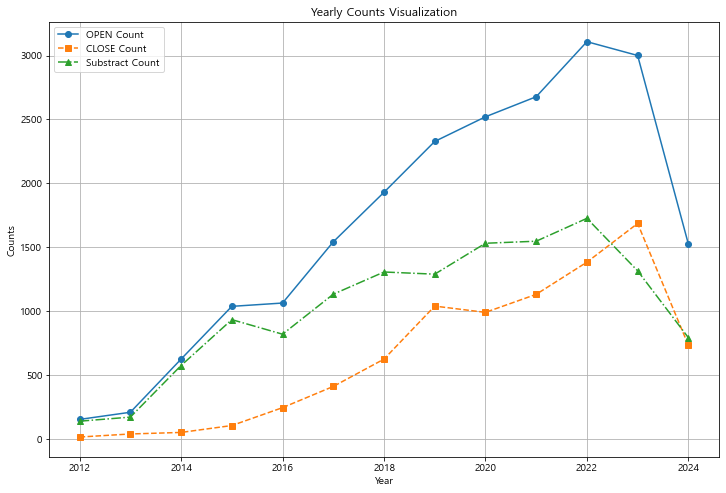

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# 시각화
plt.figure(figsize=(12, 8))

# 각 열에 대해 꺾은선 그래프 그리기
plt.plot(counts_yearly['year'], counts_yearly['count_open'], label='OPEN Count', linestyle='-', marker='o')
plt.plot(counts_yearly['year'], counts_yearly['count_close'], label='CLOSE Count', linestyle='--', marker='s')
plt.plot(counts_yearly['year'], counts_yearly['count_substract'], label='Substract Count', linestyle='-.', marker='^')

# 그래프 꾸미기
plt.title('Yearly Counts Visualization')
plt.xlabel('Year')
plt.ylabel('Counts')
plt.legend()
plt.grid(True)

# 그래프 보여주기
plt.show()

## 2.2.2. (행정동별_개수) 상가 "개수" 현황 ('영업/정상'과 '폐업' 상가 각각 파악)

In [47]:
# 데이터 복제
zone_sanga_op_emd = zone_sanga_total_op.copy()
zone_sanga_cl_emd = zone_sanga_cl.copy()

In [48]:
zone_sanga_op_emd

EMD_CD COL_ADM_SE EMD_NM major        group   service_nm   lcpmt_dt  \
0      36110102      36110    소담동    생활           유통        통신판매업 2012-01-10   
1      36110104      36110    대평동    생활           미용          미용업 2012-01-17   
2      36110107      36110    나성동    기타         사무지원      유료직업소개소 2012-01-19   
3      36110112      36110    고운동    생활           유통        통신판매업 2012-02-01   
4      36110106      36110    한솔동    식품          음식점        일반음식점 2012-02-14   
...         ...        ...    ...   ...          ...          ...        ...   
22460  36110111      36110    종촌동    식품  식품 제조/가공/판매    즉석판매제조가공업 2024-05-23   
22461  36110107      36110    나성동    식품  식품 제조/가공/판매    즉석판매제조가공업 2024-05-24   
22462  36110107      36110    나성동    식품  식품 제조/가공/판매    즉석판매제조가공업 2024-05-24   
22463  36110106      36110    한솔동    건강         의료기기  의료기기판매(임대)업 2024-05-28   
22464  36110110      36110    어진동    건강         의료기기  의료기기판매(임대)업 2024-05-29   

       biz_stts_cd biz_stts_nm   cls_date  plc_area   zip_cd  \
0                1       영업/정상        NaT       NaN      NaN   
1                1       영업/정상        NaT     33.57  339-005   
2                1       영업/정상        NaT       NaN      NaN   
3                1       영업/정상        NaT       NaN      NaN   
4                1       영업/정상        NaT     37.00  339-014   
...            ...         ...        ...       ...      ...   
22460            3          폐업 2024-05-30       NaN  339-013   
22461            3          폐업 2024-05-26       NaN  339-003   
22462            3          폐업 2024-05-25       NaN  339-003   
22463            3          폐업 2024-06-04       NaN      NaN   
22464            3          폐업 2024-05-29       NaN      NaN   

                                   addr  \
0                 세종특별자치시 소담동 *** 법조타운B   
1          세종특별자치시 대평동 668 해들마을 6단지 상가동   
2                 세종특별자치시 나성동 752 한림프라자   
3                 세종특별자치시 고운동 **** 금화빌딩   
4           세종특별자치시 한솔동 940 첫마을2단지 110호   
...                                 ...   
22460             세종특별자치시 종촌동 661 스마트빌딩   
22461                   세종특별자치시 나성동 248   
22462                   세종특별자치시 나성동 248   
22463            세종특별자치시 한솔동 *** 첫마을*단지   
22464  세종특별자치시 어진동 ***번지 세종비지니스센터 세종세무서   

                                                rd_addr rd_zip_cd  \
0                세종특별자치시 한누리대로 **** 법조타운B *층 ***호 (소담동)     30147   
1        세종특별자치시 한누리대로 2236 해들마을 6단지 상가동 2층 C222호 (대평동)       NaN   
2             세종특별자치시 한누리대로 219 한림프라자 4층 401 402호 (나성동)     30127   
3                    세종특별자치시 고운서길 ** 금화빌딩 *층 ***호 (고운동)     30063   
4                 세종특별자치시 노을3로 19 상가동 110호 (한솔동 첫마을2단지)       NaN   
...                                                 ...       ...   
22460  세종특별자치시 도움3로 105-6 스마트빌딩 1층 이마트에브리데이 세종종촌점 (종촌동)       NaN   
22461                            세종특별자치시 어울누리로 30 (나성동)       NaN   
22462                     세종특별자치시 어울누리로 30 도시상징광장 (나성동)       NaN   
22463         세종특별자치시 나리로 ** 상가동 지*층 비***호 (한솔동 첫마을*단지)     30130   
22464      세종특별자치시 가름로 *** 세종비지니스센터 세종세무서 *층 ***호 (어진동)     30121   

                      bplc_nm                               biz_type  \
0                       (주)마랑                            의류/패션/잡화/뷰티   
1                     주미 에스테틱                                  피부미용업   
2                    (주)지에스씨넷                                    NaN   
3                  주식회사 아이키디아  교육/도서/완구/오락 가구/수납용품 건강/식품 의류/패션/잡화/뷰티   
4                      압구정 김밥                                김밥(도시락)   
...                       ...                                    ...   
22460               김찬길 명인 핫바                              즉석판매제조가공업   
22461                   달빛제유소                              즉석판매제조가공업   
22462  주식회사 세종시한글빵(단비캐릭터 솜사탕)                              즉석판매제조가공업   
22463            지에스25 세종래미안점                                    NaN   
22464       Smart dental mall                                    NaN   

              lon        lat                    geometry  index_righ

In [49]:
# 행정동별로 lcpmt_dt의 고유값들을 집계
total_op_emd_counts = zone_sanga_op_emd.groupby('EMD_NM')['lcpmt_dt'].nunique().reset_index()

total_op_emd_counts

EMD_NM  lcpmt_dt
0     가람동       456
1     고운동      1250
2     나성동      1588
3     누리동        25
4     다솜동         3
5     다정동       761
6     대평동       659
7     도담동      1109
8     반곡동       578
9     보람동      1197
10    산울동        50
11    새롬동       910
12    세종동        46
13    소담동       874
14    아름동      1105
15    어진동      1596
16    종촌동      1080
17    집현동       297
18    한별동         3
19    한솔동       745
20    합강동         3
21    해밀동       185

In [50]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# cls_date의 고유값을 행정동별로 집계
cl_cl_emd_counts = zone_sanga_cl_emd.groupby('EMD_NM')['cls_date'].nunique().reset_index()

cl_cl_emd_counts

EMD_NM  cls_date
0     가람동       350
1     고운동       526
2     나성동       618
3     누리동        20
4     다솜동         3
5     다정동       314
6     대평동       259
7     도담동       548
8     반곡동       145
9     보람동       497
10    산울동        16
11    새롬동       369
12    세종동        23
13    소담동       298
14    아름동       471
15    어진동       854
16    종촌동       509
17    집현동        54
18    한별동         2
19    한솔동       320
20    합강동         2
21    해밀동        27

In [51]:
# year 열을 기준으로 병합total_op_counts_yearly
emd_counts = pd.merge(total_op_emd_counts, cl_cl_emd_counts, how='left', on='EMD_NM')
# 결측값을 0으로 채우기
emd_counts = emd_counts.fillna(0)
# count 열을 빼기
emd_counts['substract'] = emd_counts['lcpmt_dt'] - emd_counts['cls_date']
emd_counts['close_ratio'] = emd_counts['cls_date'] / emd_counts['lcpmt_dt']

# 결과 출력
emd_counts

EMD_NM  lcpmt_dt  cls_date  substract  close_ratio
0     가람동       456       350        106     0.767544
1     고운동      1250       526        724     0.420800
2     나성동      1588       618        970     0.389169
3     누리동        25        20          5     0.800000
4     다솜동         3         3          0     1.000000
5     다정동       761       314        447     0.412615
6     대평동       659       259        400     0.393020
7     도담동      1109       548        561     0.494139
8     반곡동       578       145        433     0.250865
9     보람동      1197       497        700     0.415205
10    산울동        50        16         34     0.320000
11    새롬동       910       369        541     0.405495
12    세종동        46        23         23     0.500000
13    소담동       874       298        576     0.340961
14    아름동      1105       471        634     0.426244
15    어진동      1596       854        742     0.535088
16    종촌동      1080       509        571     0.471296
17    집현동       297        54        243     0.181818
18    한별동         3         2          1     0.666667
19    한솔동       745       320        425     0.429530
20    합강동         3         2          1     0.666667
21    해밀동       185        27        158     0.145946

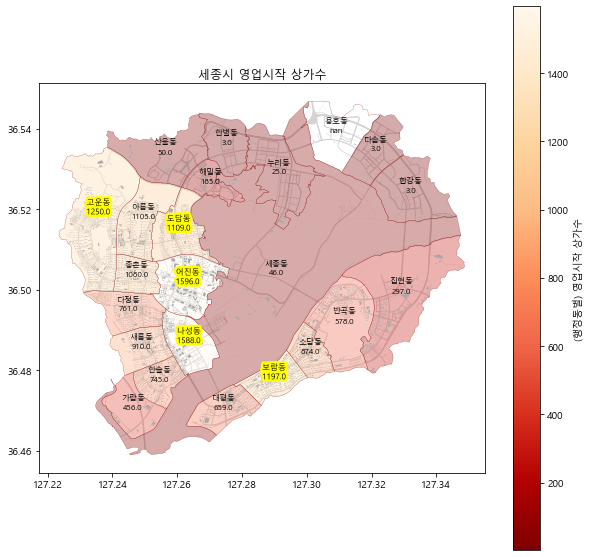

   행정동 이름  영업시작 상가수
9     어진동    1596.0
6     나성동    1588.0
11    고운동    1250.0
2     보람동    1197.0
13    도담동    1109.0


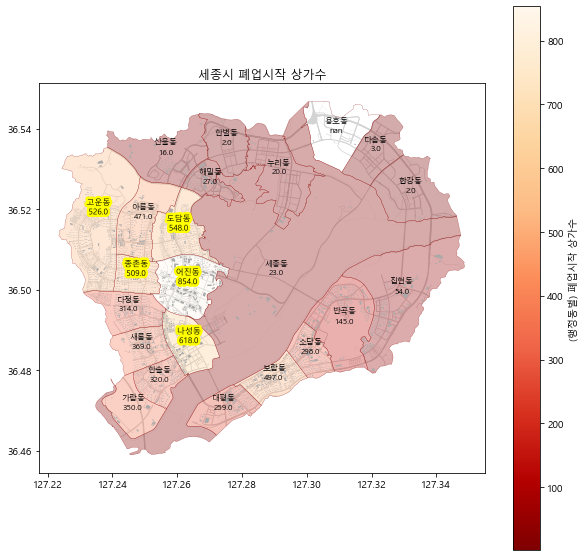

   행정동 이름  폐업시작 상가수
9     어진동     854.0
6     나성동     618.0
13    도담동     548.0
11    고운동     526.0
10    종촌동     509.0


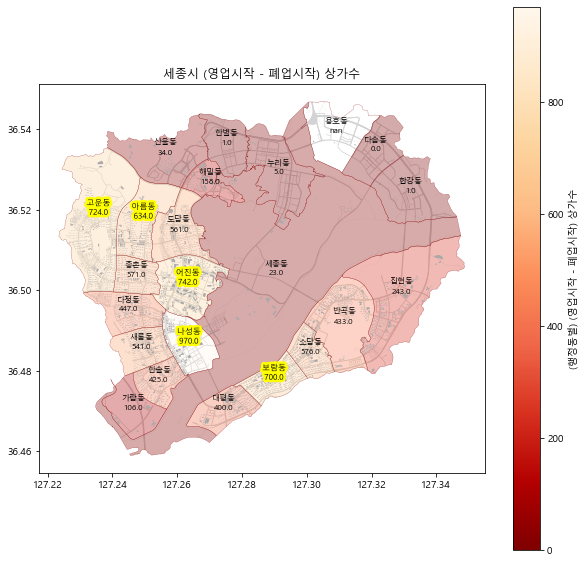

   행정동 이름  (영업시작 - 폐업시작) 상가수
6     나성동              970.0
9     어진동              742.0
11    고운동              724.0
2     보람동              700.0
12    아름동              634.0


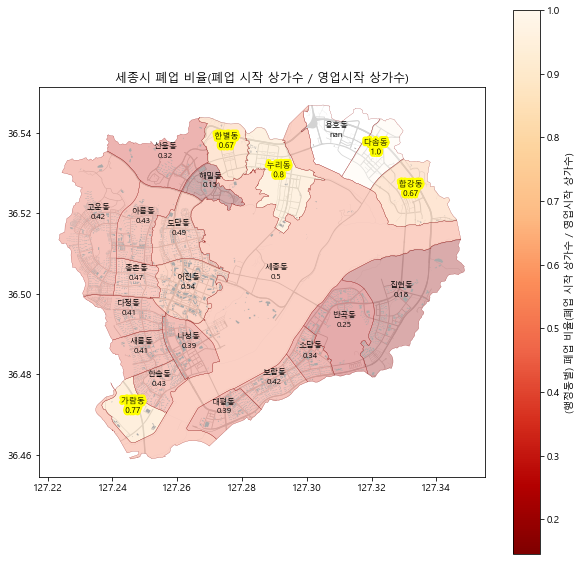

   행정동 이름  폐업 비율(폐업 시작 상가수 / 영업시작 상가수)
21    다솜동                     1.000000
19    누리동                     0.800000
4     가람동                     0.767544
16    합강동                     0.666667
20    한별동                     0.666667


In [65]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patheffects as path_effects

# 시각화 함수 정의
def visualize_sejong_data(column_name, title, cmap='OrRd_r'):
    # 세종시 경계
    sejong_zone_adm_gpd = sejong_zone_adm.copy()

    # 데이터프레임과 세종시 경계 데이터를 행정동 이름(EMD_NM) 기준으로 병합
    emd_counts_gdf = sejong_zone_adm_gpd.merge(emd_counts, left_on='EMD_NM', right_on='EMD_NM', how='left')

    # 해당 열(column_name) 기준 상위 5개 지역 추출
    top_5_areas = emd_counts_gdf.nlargest(5, column_name)

    # 시각화
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))

    # 도로 데이터
    rw_poly_clipped.plot(ax=ax, facecolor='lightgrey', zorder=1)
    # 건물 데이터
    building_clipped.plot(ax=ax, facecolor='darkgrey', zorder=2)
    # 세종시 경계(기존 읍면동 단위)
    sejong_zone_adm_boundary.plot(ax=ax, facecolor='none', edgecolor='DarkRed', linewidth=0.2, zorder=3)

    # 행정동별 데이터 시각화
    emd_counts_gdf.plot(column=column_name, ax=ax, legend=True, cmap=cmap, alpha=0.33, 
                        legend_kwds={'label': f"(행정동별) {title}"})

    # 행정동별 이름과 데이터 값 표시
    for idx, row in emd_counts_gdf.iterrows():
        centroid = row['geometry'].centroid
        emd_name = row['EMD_NM']
        value = round(row[column_name], 2)  # 소수 둘째 자리까지 반올림
        
        # 형광펜 효과 설정 (상위 5개 지역에 대해 강조)
        if row['EMD_NM'] in top_5_areas['EMD_NM'].values:
            text = ax.annotate(text=f"{emd_name}\n{value}", xy=(centroid.x, centroid.y), 
                               ha='center', fontsize=8, color='black')
            text.set_path_effects([path_effects.Stroke(linewidth=5, foreground='yellow'),
                                   path_effects.Normal()])
        else:
            ax.annotate(text=f"{emd_name}\n{value}", xy=(centroid.x, centroid.y), 
                        ha='center', fontsize=8, color='black')

    plt.title(f"세종시 {title}")
    plt.show()

    # 상위 5개 지역에 대한 표 출력
    top_5_areas = top_5_areas[['EMD_NM', column_name]]
    top_5_areas.columns = ['행정동 이름', title]
    print(top_5_areas)

# lcpmt_dt 열을 시각화
visualize_sejong_data('lcpmt_dt', '영업시작 상가수')

# cls_date 열을 시각화
visualize_sejong_data('cls_date', '폐업시작 상가수')

# substract 열을 시각화
visualize_sejong_data('substract', '(영업시작 - 폐업시작) 상가수')

# close_ratio 열을 시각화
visualize_sejong_data('close_ratio', '폐업 비율(폐업 시작 상가수 / 영업시작 상가수)')


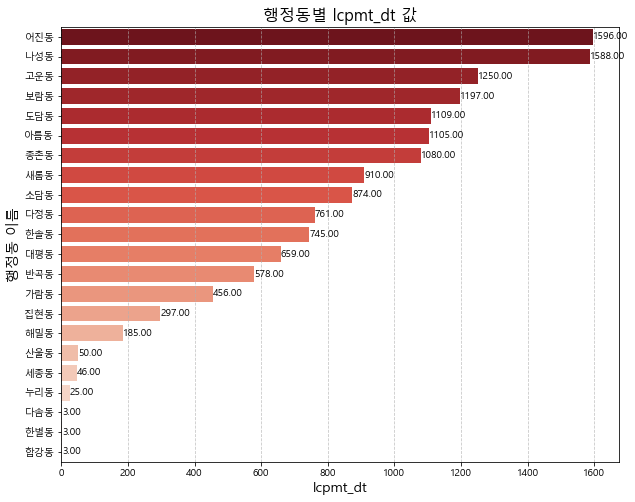

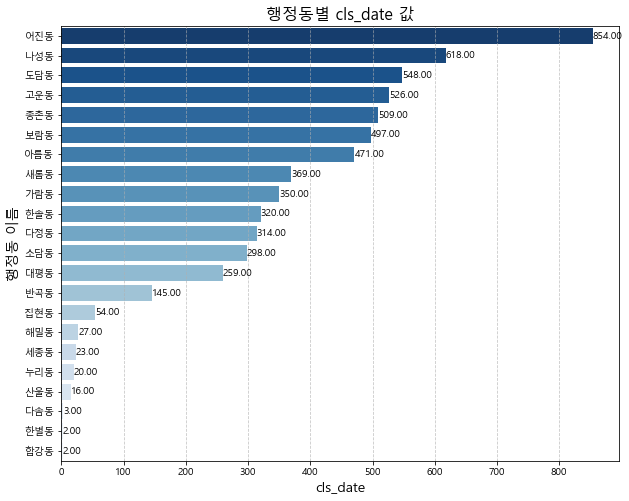

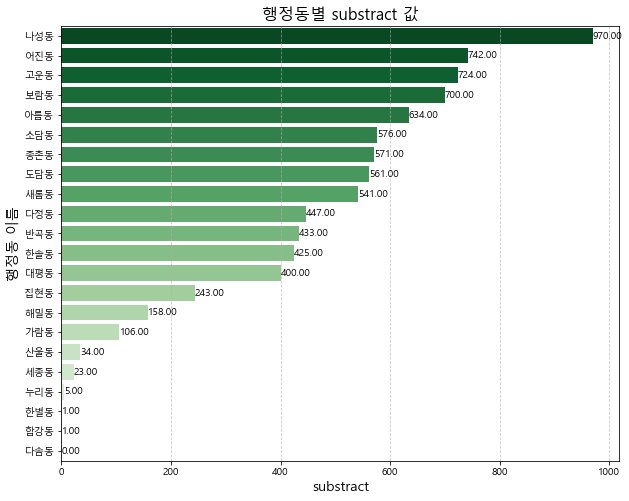

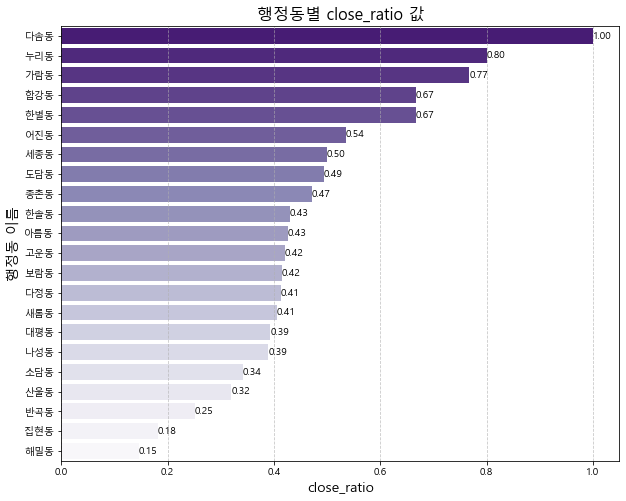

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터프레임 정의 (이 부분은 이미 주어졌다고 가정)
# emd_counts = pd.DataFrame({...})

# 시각화를 위한 컬러맵 설정
color_maps = ['Reds', 'Blues', 'Greens', 'Purples']

# 각 열에 대해 시각화
for i, column in enumerate(['lcpmt_dt', 'cls_date', 'substract', 'close_ratio']):
    # 데이터프레임을 내림차순으로 정렬
    sorted_df = emd_counts.sort_values(by=column, ascending=False)
    
    # 컬러맵을 거꾸로 적용
    colors = sns.color_palette(color_maps[i], len(sorted_df))[::-1]
    
    # 막대 그래프 생성
    plt.figure(figsize=(10, 8))
    barplot = sns.barplot(x=column, y='EMD_NM', data=sorted_df, palette=colors)
    
    # 막대마다 값 표기
    for index, value in enumerate(sorted_df[column]):
        plt.text(value, index, f'{value:.2f}', color='black', va="center", ha="left", fontsize=10)

    # 그래프 제목 및 라벨 설정
    plt.title(f'행정동별 {column} 값', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('행정동 이름', fontsize=14)
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    # 그래프 표시
    plt.show()


## 2.2.3. (행정동별_업종별) 상가 "개수" 현황 ('영업/정상'과 '폐업' 상가 각각 파악)

In [85]:
# 데이터 복제: 업종 대분류 / 중분류 / 소분류 / 세종시 경계 각각 복제
zone_sanga_op_emd_mjr = zone_sanga_total_op.copy()
zone_sanga_op_emd_grp = zone_sanga_total_op.copy()
zone_sanga_op_emd_srv = zone_sanga_total_op.copy()

zone_sanga_cl_emd_mjr = zone_sanga_cl.copy()
zone_sanga_cl_emd_grp = zone_sanga_cl.copy()
zone_sanga_cl_emd_srv = zone_sanga_cl.copy()

sejong_zone_adm_gpd = sejong_zone_adm.copy()

### 2.2.3.1. (행정동별_업종별) 영업 시작 상가

#### # 대분류(major)

In [86]:
zone_sanga_op_emd_mjr

EMD_CD COL_ADM_SE EMD_NM major        group   service_nm   lcpmt_dt  \
0      36110102      36110    소담동    생활           유통        통신판매업 2012-01-10   
1      36110104      36110    대평동    생활           미용          미용업 2012-01-17   
2      36110107      36110    나성동    기타         사무지원      유료직업소개소 2012-01-19   
3      36110112      36110    고운동    생활           유통        통신판매업 2012-02-01   
4      36110106      36110    한솔동    식품          음식점        일반음식점 2012-02-14   
...         ...        ...    ...   ...          ...          ...        ...   
22460  36110111      36110    종촌동    식품  식품 제조/가공/판매    즉석판매제조가공업 2024-05-23   
22461  36110107      36110    나성동    식품  식품 제조/가공/판매    즉석판매제조가공업 2024-05-24   
22462  36110107      36110    나성동    식품  식품 제조/가공/판매    즉석판매제조가공업 2024-05-24   
22463  36110106      36110    한솔동    건강         의료기기  의료기기판매(임대)업 2024-05-28   
22464  36110110      36110    어진동    건강         의료기기  의료기기판매(임대)업 2024-05-29   

       biz_stts_cd biz_stts_nm   cls_date  plc_area   zip_cd  \
0                1       영업/정상        NaT       NaN      NaN   
1                1       영업/정상        NaT     33.57  339-005   
2                1       영업/정상        NaT       NaN      NaN   
3                1       영업/정상        NaT       NaN      NaN   
4                1       영업/정상        NaT     37.00  339-014   
...            ...         ...        ...       ...      ...   
22460            3          폐업 2024-05-30       NaN  339-013   
22461            3          폐업 2024-05-26       NaN  339-003   
22462            3          폐업 2024-05-25       NaN  339-003   
22463            3          폐업 2024-06-04       NaN      NaN   
22464            3          폐업 2024-05-29       NaN      NaN   

                                   addr  \
0                 세종특별자치시 소담동 *** 법조타운B   
1          세종특별자치시 대평동 668 해들마을 6단지 상가동   
2                 세종특별자치시 나성동 752 한림프라자   
3                 세종특별자치시 고운동 **** 금화빌딩   
4           세종특별자치시 한솔동 940 첫마을2단지 110호   
...                                 ...   
22460             세종특별자치시 종촌동 661 스마트빌딩   
22461                   세종특별자치시 나성동 248   
22462                   세종특별자치시 나성동 248   
22463            세종특별자치시 한솔동 *** 첫마을*단지   
22464  세종특별자치시 어진동 ***번지 세종비지니스센터 세종세무서   

                                                rd_addr rd_zip_cd  \
0                세종특별자치시 한누리대로 **** 법조타운B *층 ***호 (소담동)     30147   
1        세종특별자치시 한누리대로 2236 해들마을 6단지 상가동 2층 C222호 (대평동)       NaN   
2             세종특별자치시 한누리대로 219 한림프라자 4층 401 402호 (나성동)     30127   
3                    세종특별자치시 고운서길 ** 금화빌딩 *층 ***호 (고운동)     30063   
4                 세종특별자치시 노을3로 19 상가동 110호 (한솔동 첫마을2단지)       NaN   
...                                                 ...       ...   
22460  세종특별자치시 도움3로 105-6 스마트빌딩 1층 이마트에브리데이 세종종촌점 (종촌동)       NaN   
22461                            세종특별자치시 어울누리로 30 (나성동)       NaN   
22462                     세종특별자치시 어울누리로 30 도시상징광장 (나성동)       NaN   
22463         세종특별자치시 나리로 ** 상가동 지*층 비***호 (한솔동 첫마을*단지)     30130   
22464      세종특별자치시 가름로 *** 세종비지니스센터 세종세무서 *층 ***호 (어진동)     30121   

                      bplc_nm                               biz_type  \
0                       (주)마랑                            의류/패션/잡화/뷰티   
1                     주미 에스테틱                                  피부미용업   
2                    (주)지에스씨넷                                    NaN   
3                  주식회사 아이키디아  교육/도서/완구/오락 가구/수납용품 건강/식품 의류/패션/잡화/뷰티   
4                      압구정 김밥                                김밥(도시락)   
...                       ...                                    ...   
22460               김찬길 명인 핫바                              즉석판매제조가공업   
22461                   달빛제유소                              즉석판매제조가공업   
22462  주식회사 세종시한글빵(단비캐릭터 솜사탕)                              즉석판매제조가공업   
22463            지에스25 세종래미안점                                    NaN   
22464       Smart dental mall                                    NaN   

              lon        lat                    geometry  index_righ

In [87]:
import pandas as pd

# 데이터프레임을 groupby를 통해 EMD_NM 별로 major 열의 고유값들을 집계
grouped_op_emd_mjr = zone_sanga_op_emd_mjr.groupby('EMD_NM')['major'].value_counts().unstack(fill_value=0)
grouped_op_emd_mjr.reset_index(inplace=True)
# grouped.set_index('major')

# 업종별 총합 계산하여 Total 열 추가
grouped_op_emd_mjr['Total_mjr'] = grouped_op_emd_mjr[['건강', '기타', '동물', '문화', '생활', '식품', '자원환경']].sum(axis=1)

# total_counts의 총합 계산
grouped_op_emd_mjr_sum = grouped_op_emd_mjr[['건강','기타','동물','문화','생활','식품','자원환경','Total_mjr']].sum()

# 총합을 새로운 행으로 추가
grouped_op_emd_mjr.loc[len(grouped_op_emd_mjr)] = ['Total'] + grouped_op_emd_mjr_sum.tolist()

grouped_op_emd_mjr

major EMD_NM    건강    기타   동물   문화    생활    식품  자원환경  Total_mjr
0        가람동     5     1    2    3    10   557    11        589
1        고운동   104   110   22   30   928   724    16       1934
2        나성동   222   164   36  108   909  1595    67       3101
3        누리동     0     3    0    0     0    19     6         28
4        다솜동     0     0    0    0     0     2     1          3
5        다정동    66    57   15    2   516   402     7       1065
6        대평동    62    54   14   14   300   427    17        888
7        도담동   101    84   21   47   500   762    25       1540
8        반곡동    53    44    7    5   366   278    10        763
9        보람동    87    87   17   45   650   907    27       1820
10       산울동     1     6    0    1    14    30     3         55
11       새롬동    77    64   12    3   555   545     8       1264
12       세종동     0     3    0    5     0    60     6         74
13       소담동    78    83    9   16   545   417    19       1167
14       아름동   116    95   27   28   547   645    15       1473
15       어진동   139   146   17   61  1317  1385    55       3120
16       종촌동   110    74   15   22   635   622     9       1487
17       집현동    20    40    5    8   160   104    24        361
18       한별동     0     0    0    0     0     3     0          3
19       한솔동    41    55    8   13   367   391     3        878
20       합강동     0     0    0    1     0     2     0          3
21       해밀동    21    10    4    0    96    83     0        214
22     Total  1303  1180  231  412  8415  9960   329      21830

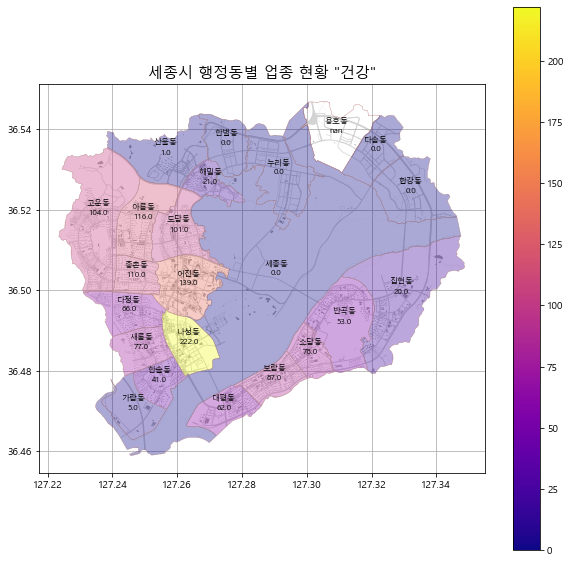

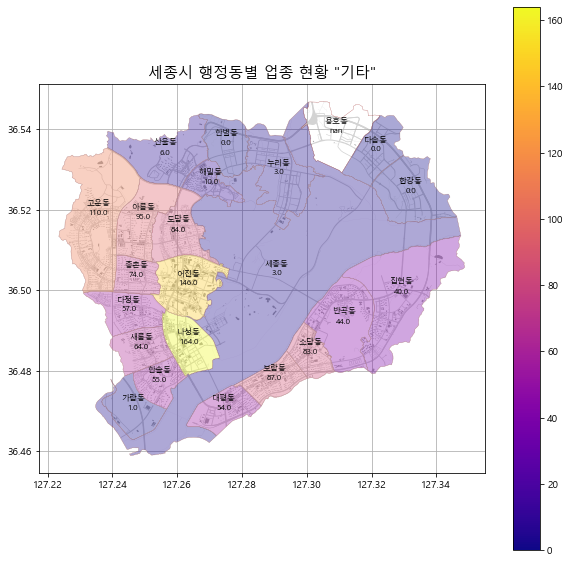

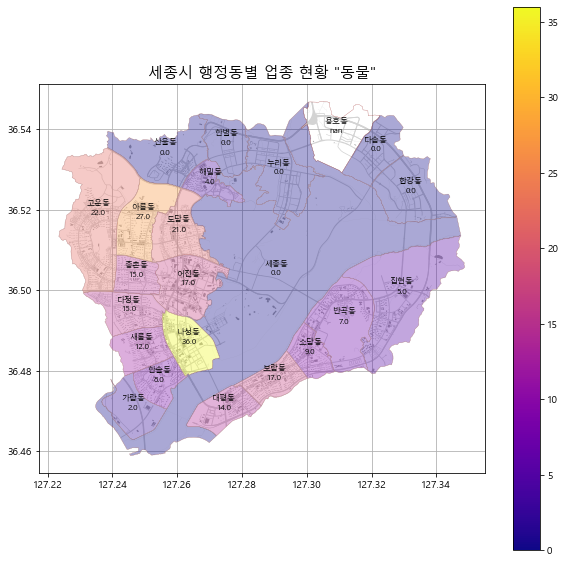

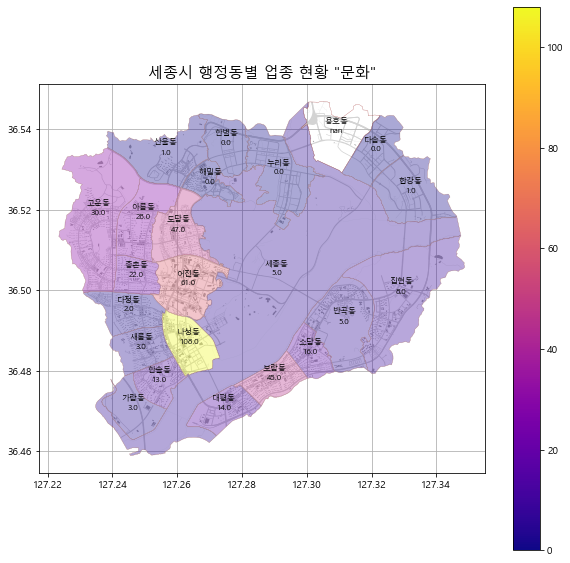

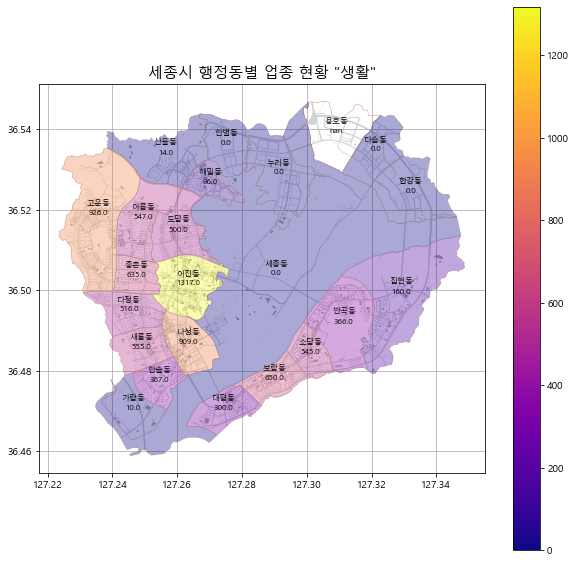

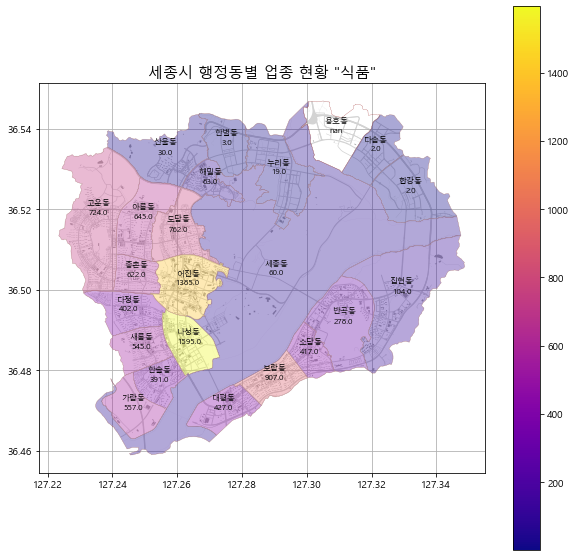

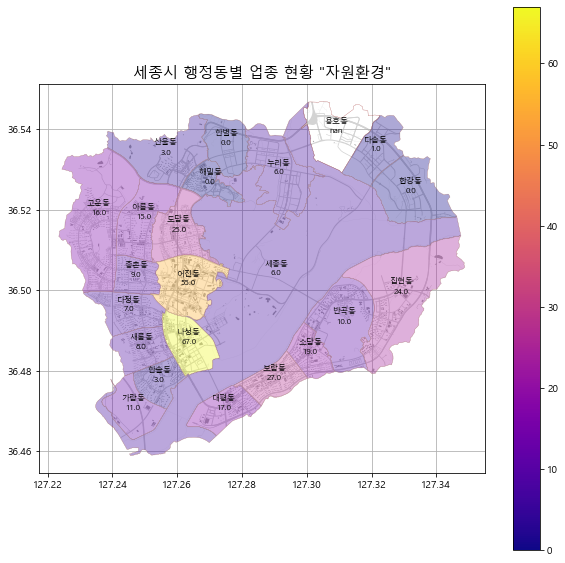

In [98]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# grouped_op_emd_mjr 데이터프레임과 sejong_zone_adm_gpd 데이터프레임이 이미 존재한다고 가정합니다.
# 또한 rw_poly_clipped, building_clipped, sejong_zone_adm_boundary 데이터도 존재한다고 가정합니다.

# 1. "Total" 행 제거
grouped_op_emd_mjr = grouped_op_emd_mjr[grouped_op_emd_mjr['EMD_NM'] != 'Total']

# 2. 각 업종에 대해 시각화 수행
grouped_op_emd_mjr_industries = ['건강', '기타', '동물', '문화', '생활', '식품', '자원환경']

for industry in grouped_op_emd_mjr_industries:
    # 3. sejong_zone_adm_gpd와 grouped_op_emd_mjr 데이터를 행정동 이름을 기준으로 병합
    grouped_op_emd_mjr_merged_gdf = sejong_zone_adm_gpd.merge(grouped_op_emd_mjr[['EMD_NM', industry]], how='left', left_on='EMD_NM', right_on='EMD_NM')
    
    # 4. 지도 시각화
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))

    # 도로 데이터
    rw_poly_clipped.plot(ax=ax, facecolor='lightgrey', zorder=1)
    # 건물 데이터
    building_clipped.plot(ax=ax, facecolor='darkgrey', zorder=2)
    # 세종시 경계(기존 읍면동 단위)
    sejong_zone_adm_boundary.plot(ax=ax, facecolor='none', edgecolor='DarkRed', linewidth=0.2, zorder=3)

    # 업종별 데이터 시각화
    grouped_op_emd_mjr_merged_gdf.plot(column=industry, cmap='plasma', linewidth=0.8, ax=ax, edgecolor='0.8', alpha=0.35, legend=True, zorder=4)
    
    # 행정동 이름과 값 표시
    for x, y, label, value in zip(grouped_op_emd_mjr_merged_gdf.geometry.centroid.x, 
                                  grouped_op_emd_mjr_merged_gdf.geometry.centroid.y, 
                                  grouped_op_emd_mjr_merged_gdf['EMD_NM'], 
                                  grouped_op_emd_mjr_merged_gdf[industry]):
        ax.text(x, y, f'{label}\n{value}', fontsize=8, ha='center', color='black', zorder=5)

    # 그리드 추가
    ax.grid(True)
    
    ax.set_title(f'세종시 행정동별 업종 현황 "{industry}"', fontsize=15)
    ax.set_axis_on()

    # 5. 그래프 보여주기
    plt.show()

In [ ]:
# 'Total' 값을 제외한 grouped_op_emd_mjr 데이터프레임 필터링
grouped_op_emd_mjr_gdf = grouped_op_emd_mjr_gdf[grouped_op_emd_mjr_gdf['EMD_NM'] != 'Total']

# 지도 시각화
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
grouped_op_emd_mjr_gdf.plot(column='Total', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# 제목 설정
ax.set_title('Total 업종 수에 따른 세종시 행정동 분포', fontsize=15)
ax.axis('on')

plt.show()

In [80]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# grouped_op_emd_mjr와 sejong_zone_adm_gpd를 로드합니다.
# grouped_op_emd_mjr = pd.read_csv('path_to_grouped_op_emd_mjr.csv')  # 예시
# sejong_zone_adm_gpd = gpd.read_file('path_to_sejong_zone_adm_gpd.shp')  # 예시



# 필요한 열만 선택합니다.
cols_to_sum = ['건강', '기타', '동물', '문화', '생활', '식품', '자원환경']
grouped_op_emd_mjr_filtered['Total'] = grouped_op_emd_mjr_filtered[cols_to_sum].sum(axis=1)

# grouped_op_emd_mjr_filtered를 sejong_zone_adm_gpd와 병합
merged_gdf = sejong_zone_adm_gpd.merge(grouped_op_emd_mjr_filtered, left_on='EMD_NM', right_on='EMD_NM')

# 지도 시각화
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
merged_gdf.plot(column='Total', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# 제목 설정
ax.set_title('Total 업종 수에 따른 세종시 행정동 분포', fontsize=15)
ax.axis('off')

plt.show()


major EMD_NM   건강   기타  동물   문화    생활    식품  자원환경  Total_mjr  Total
0        가람동    5    1   2    3    10   557    11        589    589
1        고운동  104  110  22   30   928   724    16       1934   1934
2        나성동  222  164  36  108   909  1595    67       3101   3101
3        누리동    0    3   0    0     0    19     6         28     28
4        다솜동    0    0   0    0     0     2     1          3      3
5        다정동   66   57  15    2   516   402     7       1065   1065
6        대평동   62   54  14   14   300   427    17        888    888
7        도담동  101   84  21   47   500   762    25       1540   1540
8        반곡동   53   44   7    5   366   278    10        763    763
9        보람동   87   87  17   45   650   907    27       1820   1820
10       산울동    1    6   0    1    14    30     3         55     55
11       새롬동   77   64  12    3   555   545     8       1264   1264
12       세종동    0    3   0    5     0    60     6         74     74
13       소담동   78   83   9   16   545   417    19       1167   1167
14       아름동  116   95  27   28   547   645    15       1473   1473
15       어진동  139  146  17   61  1317  1385    55       3120   3120
16       종촌동  110   74  15   22   635   622     9       1487   1487
17       집현동   20   40   5    8   160   104    24        361    361
18       한별동    0    0   0    0     0     3     0          3      3
19       한솔동   41   55   8   13   367   391     3        878    878
20       합강동    0    0   0    1     0     2     0          3      3
21       해밀동   21   10   4    0    96    83     0        214    214

#### # 중분류(group)

In [57]:
zone_sanga_op_emd_grp['group'].unique()

array(['유통', '미용', '사무지원', '음식점', '급식', '식품 제조/가공/판매', '미디어', '환경관리',
       '체육', '의료기관', '동물', '의료기기', '세탁소/빨래방', '에너지', '담배', '노래방', '여행',
       '문화기획', '게임', '이용', '관광', '비디오', '숙박', '영화', '축산', '목욕탕/찜질방/사우나',
       '민방위', '목재', '전문교육기관', '엘리베이터', '물류', '공연', '음악', '지하수'],
      dtype=object)

In [58]:
import pandas as pd

# 데이터프레임을 groupby를 통해 EMD_NM 별로 group 열의 고유값들을 집계
grouped_op_emd_grp = zone_sanga_op_emd_grp.groupby('EMD_NM')['group'].value_counts().unstack(fill_value=0)
grouped_op_emd_grp.reset_index(inplace=True)
# grouped.set_index('major')

# 업종별 총합 계산하여 Total 열 추가
grouped_op_emd_grp['Total_grp'] = grouped_op_emd_grp[['유통', '미용', '사무지원', '음식점', '급식', '식품 제조/가공/판매', '미디어', '환경관리',
       '체육', '의료기관', '동물', '의료기기', '세탁소/빨래방', '에너지', '담배', '노래방', '여행',
       '문화기획', '게임', '이용', '관광', '비디오', '숙박', '영화', '축산', '목욕탕/찜질방/사우나',
       '민방위', '목재', '전문교육기관', '엘리베이터', '물류', '공연', '음악', '지하수']].sum(axis=1)

# total_counts의 총합 계산
grouped_op_emd_grp_sum = grouped_op_emd_grp[['유통', '미용', '사무지원', '음식점', '급식', '식품 제조/가공/판매', '미디어', '환경관리',
       '체육', '의료기관', '동물', '의료기기', '세탁소/빨래방', '에너지', '담배', '노래방', '여행',
       '문화기획', '게임', '이용', '관광', '비디오', '숙박', '영화', '축산', '목욕탕/찜질방/사우나',
       '민방위', '목재', '전문교육기관', '엘리베이터', '물류', '공연', '음악', '지하수','Total_grp']].sum()

# 총합을 새로운 행으로 추가
grouped_op_emd_grp.loc[len(grouped_op_emd_grp)] = ['Total'] + grouped_op_emd_grp_sum.tolist()

grouped_op_emd_grp

group EMD_NM    게임   공연  관광    급식  노래방    담배   동물  목욕탕/찜질방/사우나   목재  문화기획  \
0        가람동     0    0   3     6    0     1    2            0    0     0   
1        고운동     3    0   5    28    6    76   19            0    0     2   
2        나성동    31    1   2    25   22   102   30            3    0     7   
3        누리동     0    0   0     7    0     2    0            0    0     0   
4        다솜동     0    0   0     0    0     0    0            0    0     0   
5        다정동     0    0   1    21    0    41   15            0    0     0   
6        대평동     3    0   3    25    0    37   14            0    0     1   
7        도담동    19    0   1    29   17    63   18            0    1     1   
8        반곡동     0    1   0    32    0    29    7            0    0     1   
9        보람동    13    0   6    26   10    47   13            0    1     1   
10       산울동     0    0   0     3    0     6    0            0    0     0   
11       새롬동     0    1   0    24    0    38   12            0    1     0   
12       세종동     0    0   4     2    0     1    0            0    0     0   
13       소담동     4    0   2    23    1    60    9            0    0     1   
14       아름동    11    0   3    21    7    66   25            0    0     3   
15       어진동     3    2   6    63    3    81   15            0    2     7   
16       종촌동     3    0   5    20    5    53   14            1    1     0   
17       집현동     1    0   0    18    0    17    4            0    0     1   
18       한별동     0    0   0     0    0     0    0            0    0     0   
19       한솔동     2    0   2    21    5    35    7            0    0     0   
20       합강동     0    0   0     0    0     0    0            0    0     0   
21       해밀동     0    0   0     9    0     8    4            0    0     0   
22     Total  7107  930  41  5996  403  3561  342          244  301   758   

group   물류  미디어   미용  민방위  비디오  사무지원  세탁소/빨래방  숙박  식품 제조/가공/판매  에너지  엘리베이터  \
0        0    0    5    0    0     0        0   0          519    6      0   
1        0   31  109    0    7     2        6   1          257    1      0   
2        2   40  207    1   21    15        2   1          476    3      3   
3        0    0    0    0    0     0        0   0            8    1      0   
4        0    0    0    0    0     0        0   0            0    0      0   
5        0   15   51    1    0     0        2   0          187    4      0   
6        0   13   47    1    2     2        1   0          178    5      1   
7        0   18   75    0    2     1        4   0          152    8      0   
8        0   13   17    0    0     2        0   0           70    1      0   
9        0   33   94    1    5     4        0   0          202    3      0   
10       0    0    2    0    0     0        0   1            9    2      0   
11       0   23   63    1    1     2        3   0          174    1      0   
12       0    0    0    2    0     0        0   1           18    6      0   
13       0   16   61    1    4     5        3   0          136    3      1   
14       0   24   56    1    1     4        2   2          165    3      0   
15       1   58   39    2   11     3        2   6          597   11      1   
16       0   19   57    1    2     0        5   0          263    0      0   
17       0   20    6    2    5     1        1   1           24   18      0   
18       0    0    0    0    0     0        0   0            1    0      0   
19       0   18   31    2    3     0        6   0           99    1      0   
20       0    0    0    0    0     0        0   1            0    0      0   
21       0    1   10    1    0     0        1   0           26    0      0   
22     208  545   38   77  763    76       63  25           93   35     43   

group  여행  영화    유통   음식점  음악  의료기관  의료기기  이용  전문교육기관  지하수  체육  축산  환경관리  \
0       0   0     4    32   0     2     3   1       0    0   0   0     5   
1       5   1   777   439   0    59    45   4       1    0  32   3    15   
2      17   6   649  1094   0   124    98   7     

In [71]:
# 데이터프레임과 세종시 경계 데이터를 행정동 이름(EMD_NM) 기준으로 병합
grouped_op_emd_grp_gdf = sejong_zone_adm_gpd.merge(grouped_op_emd_grp, left_on='EMD_NM', right_on='EMD_NM', how='left')
grouped_op_emd_grp_gdf

EMD_CD COL_ADM_SE EMD_NM  \
0   36110101      36110    반곡동   
1   36110102      36110    소담동   
2   36110103      36110    보람동   
3   36110104      36110    대평동   
4   36110105      36110    가람동   
5   36110106      36110    한솔동   
6   36110107      36110    나성동   
7   36110108      36110    새롬동   
8   36110109      36110    다정동   
9   36110110      36110    어진동   
10  36110111      36110    종촌동   
11  36110112      36110    고운동   
12  36110113      36110    아름동   
13  36110114      36110    도담동   
14  36110115      36110    산울동   
15  36110116      36110    해밀동   
16  36110117      36110    합강동   
17  36110118      36110    집현동   
18  36110119      36110    세종동   
19  36110120      36110    누리동   
20  36110121      36110    한별동   
21  36110122      36110    다솜동   
22  36110123      36110    용호동   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

#### # 소분류(service_nm)

In [59]:
zone_sanga_op_emd_srv['service_nm'].unique()

array(['통신판매업', '미용업', '유료직업소개소', '일반음식점', '집단급식소', '제과점영업', '출판사',
       '축산판매업', '대기오염물질배출시설설치사업장', '체육도장업', '의원', '골프장', '동물병원', '안경업',
       '세탁업', '건강기능식품일반판매업', '약국', '인쇄사', '고압가스업', '부속의료기관', '식품자동판매기업',
       '담배소매업', '즉석판매제조가공업', '노래연습장업', '휴게음식점', '산후조리업', '안전상비의약품 판매업소',
       '수질오염원설치시설(기타)', '유통전문판매업', '국내외여행업', '후원방문판매업체', '문화예술법인', '당구장업',
       '건물위생관리업', '골프연습장업', '대규모점포', '소독업', '식품판매업(기타)', '의료기기판매(임대)업',
       '동물판매업', '인터넷컴퓨터게임시설제공업', '위탁급식영업', '이용업', '석유판매업', '치과기공소',
       '유원시설업(기타)', '비디오물제작업', '체력단련장업', '자동차야영장업', '옥외광고업', '종합체육시설업',
       '숙박업', '방문판매업', '영화상영관', '사료제조업', '종합여행업', '국내여행업', '목욕장업',
       '배출가스전문정비사업자(확인검사대행자)', '전력기술설계업체', '동물약국', '수영장업', '환경전문공사업',
       '국제회의기획업', '집단급식소식품판매업', '민방위급수시설', '청소년게임제공업', '제재업', '복합유통게임제공업',
       '요양보호사교육기관', '식품제조가공업', '식품소분업', '개인하수처리시설관리업(사업장)', '영화제작업',
       '저수조청소업', '병원', '승강기유지관리업체', '한옥체험업', '목재수입유통업', '전력기술감리업체',
       '동물미용업', '특정고압가스업', '무료직업소개소', '게임물제작업', '일반야영장업', '원목생산업', '의료법인',
   

In [60]:
import pandas as pd
grouped_op_emd_grp
# 데이터프레임을 groupby를 통해 EMD_NM 별로 service_nm 열의 고유값들을 집계
grouped_op_emd_srv = zone_sanga_op_emd_srv.groupby('EMD_NM')['service_nm'].value_counts().unstack(fill_value=0)
grouped_op_emd_srv.reset_index(inplace=True)
# grouped.set_index('major')

# 업종별 총합 계산하여 Total 열 추가
grouped_op_emd_srv['Total_srv'] = grouped_op_emd_srv[['통신판매업', '미용업', '유료직업소개소', '일반음식점', '집단급식소', '제과점영업', '출판사',
       '축산판매업', '대기오염물질배출시설설치사업장', '체육도장업', '의원', '골프장', '동물병원', '안경업',
       '세탁업', '건강기능식품일반판매업', '약국', '인쇄사', '고압가스업', '부속의료기관', '식품자동판매기업',
       '담배소매업', '즉석판매제조가공업', '노래연습장업', '휴게음식점', '산후조리업', '안전상비의약품 판매업소',
       '수질오염원설치시설(기타)', '유통전문판매업', '국내외여행업', '후원방문판매업체', '문화예술법인', '당구장업',
       '건물위생관리업', '골프연습장업', '대규모점포', '소독업', '식품판매업(기타)', '의료기기판매(임대)업',
       '동물판매업', '인터넷컴퓨터게임시설제공업', '위탁급식영업', '이용업', '석유판매업', '치과기공소',
       '유원시설업(기타)', '비디오물제작업', '체력단련장업', '자동차야영장업', '옥외광고업', '종합체육시설업',
       '숙박업', '방문판매업', '영화상영관', '사료제조업', '종합여행업', '국내여행업', '목욕장업',
       '배출가스전문정비사업자(확인검사대행자)', '전력기술설계업체', '동물약국', '수영장업', '환경전문공사업',
       '국제회의기획업', '집단급식소식품판매업', '민방위급수시설', '청소년게임제공업', '제재업', '복합유통게임제공업',
       '요양보호사교육기관', '식품제조가공업', '식품소분업', '개인하수처리시설관리업(사업장)', '영화제작업',
       '저수조청소업', '병원', '승강기유지관리업체', '한옥체험업', '목재수입유통업', '전력기술감리업체',
       '동물미용업', '특정고압가스업', '무료직업소개소', '게임물제작업', '일반야영장업', '원목생산업', '의료법인',
       '국제물류주선업', '동물위탁관리업', '의료유사업', '쓰레기종량제봉투판매업', '공연장', '건설폐기물처리업',
       '음반.음악영상물배급업', '건강기능식품유통전문판매업', '의료기기수리업', '지하수영향조사기관', '식품첨가물제조업',
       '전화권유판매업', '동물전시업', '대중문화예술기획업', '동물용의료용구판매업', '지하수시공업체',
       '음반.음악영상물제작업', '시내순환관광업', '관광숙박업', '환경컨설팅회사', '빙상장업', '식품운반업',
       '가축인공수정소', '동물운송업', '게임물배급업', '동물용의약품도매상', '환경관리대행기관', '환경측정대행업',
       '축산가공업', '용기·포장지제조업', '가축사육업', '식육포장처리업', '영화상영업', '외국인관광도시민박업',
       '썰매장업', '일반유원시설업']].sum(axis=1)

# total_counts의 총합 계산
grouped_op_emd_srv_sum = grouped_op_emd_srv[['통신판매업', '미용업', '유료직업소개소', '일반음식점', '집단급식소', '제과점영업', '출판사',
       '축산판매업', '대기오염물질배출시설설치사업장', '체육도장업', '의원', '골프장', '동물병원', '안경업',
       '세탁업', '건강기능식품일반판매업', '약국', '인쇄사', '고압가스업', '부속의료기관', '식품자동판매기업',
       '담배소매업', '즉석판매제조가공업', '노래연습장업', '휴게음식점', '산후조리업', '안전상비의약품 판매업소',
       '수질오염원설치시설(기타)', '유통전문판매업', '국내외여행업', '후원방문판매업체', '문화예술법인', '당구장업',
       '건물위생관리업', '골프연습장업', '대규모점포', '소독업', '식품판매업(기타)', '의료기기판매(임대)업',
       '동물판매업', '인터넷컴퓨터게임시설제공업', '위탁급식영업', '이용업', '석유판매업', '치과기공소',
       '유원시설업(기타)', '비디오물제작업', '체력단련장업', '자동차야영장업', '옥외광고업', '종합체육시설업',
       '숙박업', '방문판매업', '영화상영관', '사료제조업', '종합여행업', '국내여행업', '목욕장업',
       '배출가스전문정비사업자(확인검사대행자)', '전력기술설계업체', '동물약국', '수영장업', '환경전문공사업',
       '국제회의기획업', '집단급식소식품판매업', '민방위급수시설', '청소년게임제공업', '제재업', '복합유통게임제공업',
       '요양보호사교육기관', '식품제조가공업', '식품소분업', '개인하수처리시설관리업(사업장)', '영화제작업',
       '저수조청소업', '병원', '승강기유지관리업체', '한옥체험업', '목재수입유통업', '전력기술감리업체',
       '동물미용업', '특정고압가스업', '무료직업소개소', '게임물제작업', '일반야영장업', '원목생산업', '의료법인',
       '국제물류주선업', '동물위탁관리업', '의료유사업', '쓰레기종량제봉투판매업', '공연장', '건설폐기물처리업',
       '음반.음악영상물배급업', '건강기능식품유통전문판매업', '의료기기수리업', '지하수영향조사기관', '식품첨가물제조업',
       '전화권유판매업', '동물전시업', '대중문화예술기획업', '동물용의료용구판매업', '지하수시공업체',
       '음반.음악영상물제작업', '시내순환관광업', '관광숙박업', '환경컨설팅회사', '빙상장업', '식품운반업',
       '가축인공수정소', '동물운송업', '게임물배급업', '동물용의약품도매상', '환경관리대행기관', '환경측정대행업',
       '축산가공업', '용기·포장지제조업', '가축사육업', '식육포장처리업', '영화상영업', '외국인관광도시민박업',
       '썰매장업', '일반유원시설업','Total_srv']].sum()

# 총합을 새로운 행으로 추가
grouped_op_emd_srv.loc[len(grouped_op_emd_srv)] = ['Total'] + grouped_op_emd_srv_sum.tolist()

grouped_op_emd_srv

service_nm EMD_NM  가축사육업  가축인공수정소  개인하수처리시설관리업(사업장)  건강기능식품유통전문판매업  \
0             가람동      0        0                 0              0   
1             고운동      0        0                 0              0   
2             나성동      0        0                 0              4   
3             누리동      0        0                 0              2   
4             다솜동      0        0                 0              0   
5             다정동      0        0                 0              0   
6             대평동      0        0                 0              1   
7             도담동      0        0                 1              0   
8             반곡동      0        0                 0              1   
9             보람동      0        0                 0              1   
10            산울동      0        0                 0              0   
11            새롬동      0        0                 0              1   
12            세종동      0        0                 0              0   
13            소담동      0        0                 0              1   
14            아름동      1        0                 0              2   
15            어진동      1        0                 0              3   
16            종촌동      0        0                 0              1   
17            집현동      1        0                 0              0   
18            한별동      0        0                 0              0   
19            한솔동      0        1                 0              0   
20            합강동      0        0                 0              0   
21            해밀동      0        0                 0              0   
22          Total   7029      930                34           4431   

service_nm  건강기능식품일반판매업  건물위생관리업  건설폐기물처리업  게임물배급업  게임물제작업  고압가스업  골프연습장업  \
0                     6        0         0       0       0      5       0   
1                   105        6         0       0       0      0       2   
2                    70       28         0       1       3      1       9   
3                     0        0         0       0       0      1       0   
4                     0        0         0       0       0      0       0   
5                    60        0         0       0       0      1       0   
6                    37        4         0       0       0      3       3   
7                    51        6         0       0       0      4       1   
8                    31        4         0       0       0      0       1   
9                    55       14         0       0       0      3       4   
10                    1        0         0       0       0      0       1   
11                   54        1         0       0       0      0       3   
12                    0        0         0       0       0      6       0   
13                   68       10         1       0       0      0       1   
14                   76        3         0       0       0      2       2   
15                   98       17         1       0       1      8       1   
16                   77        1         0       0       1      0       2   
17                   13        0         0       0       1     15       0   
18                    0        0         0       0       0      0       0   
19                   42        0         0       0       0      1       1   
20                    0        0         0       0       0      0       0   
21                   13        0         0       0       0      0       0   
22                  337      182       281     105      16    148     362   

service_nm  골프장  공연장  관광숙박업  국내여행업  국내외여행업  국제물류주선업  국제회의기획업  노래연습장업  담배소매업  \
0             0    0      0      0       0        0        0       0      1   
1             0    0      0      0       2        0        0       6     76   
2             0    1      0      1       6        2        3      22    102   
3             0    0      0      0       0        0        0       0      2   
4             0    0      0      0       0        0        0       0      0

In [72]:
# 데이터프레임과 세종시 경계 데이터를 행정동 이름(EMD_NM) 기준으로 병합
grouped_op_emd_srv_gdf = sejong_zone_adm_gpd.merge(grouped_op_emd_srv, left_on='EMD_NM', right_on='EMD_NM', how='left')
grouped_op_emd_srv_gdf

EMD_CD COL_ADM_SE EMD_NM  \
0   36110101      36110    반곡동   
1   36110102      36110    소담동   
2   36110103      36110    보람동   
3   36110104      36110    대평동   
4   36110105      36110    가람동   
5   36110106      36110    한솔동   
6   36110107      36110    나성동   
7   36110108      36110    새롬동   
8   36110109      36110    다정동   
9   36110110      36110    어진동   
10  36110111      36110    종촌동   
11  36110112      36110    고운동   
12  36110113      36110    아름동   
13  36110114      36110    도담동   
14  36110115      36110    산울동   
15  36110116      36110    해밀동   
16  36110117      36110    합강동   
17  36110118      36110    집현동   
18  36110119      36110    세종동   
19  36110120      36110    누리동   
20  36110121      36110    한별동   
21  36110122      36110    다솜동   
22  36110123      36110    용호동   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

# 여기까지 한 것 => 금요일까지 한 작업

## 2.2.4. (업종별) 상가 "개수" 현황 ('영업/정상'과 '폐업' 상가 각각 파악)

### 2.2.4.1. "major(대분류)" 기준 업종별 분류

In [ ]:
# 데이터 복사
zone_sanga_cl_mjr = zone_sanga_cl.copy()
zone_sanga_op_mjr = zone_sanga_op.copy()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. lcpmt_dt 열을 datetime 형식으로 변환
zone_sanga_cl_mjr['lcpmt_dt'] = pd.to_datetime(zone_sanga_cl_mjr['lcpmt_dt'])
zone_sanga_cl_mjr['cls_date'] = pd.to_datetime(zone_sanga_cl_mjr['cls_date'])
zone_sanga_op_mjr['lcpmt_dt'] = pd.to_datetime(zone_sanga_op_mjr['lcpmt_dt'])

# 2. service_nm 열에서 겹치는 고유값들만 남기고 나머지 제거
zone_sanga_mjr_all = set(zone_sanga_cl_mjr['major'].unique()) & set(zone_sanga_op_mjr['major'].unique())

zone_sanga_cl_mjr = zone_sanga_cl_mjr[zone_sanga_cl_mjr['major'].isin(zone_sanga_mjr_all)]
zone_sanga_op_mjr = zone_sanga_op_mjr[zone_sanga_op_mjr['major'].isin(zone_sanga_mjr_all)]

# 3. service_nm 열 내 고유값들의 개수 세고 오름차순으로 정리
zone_sanga_mjr_closed_service_counts = zone_sanga_cl_mjr['major'].value_counts().sort_index()
zone_sanga_mjr_open_service_counts = zone_sanga_op_mjr['major'].value_counts().sort_index()

print("'폐업 상가' 업종별(대분류) 집계:")
print(zone_sanga_mjr_closed_service_counts)

print("'영업 상가' 업종별(대분류) 집계:")
print(zone_sanga_mjr_open_service_counts)

# 4. lcpmt_dt 열 기준으로 월단위 시계열 groupby 후 service_nm 별로 집계
zone_sanga_mjr_cl_op_grp = zone_sanga_cl_mjr.groupby([pd.Grouper(key='lcpmt_dt', freq='M'), 'major']).size().unstack(fill_value=0)
zone_sanga_mjr_cl_cl_grp = zone_sanga_cl_mjr.groupby([pd.Grouper(key='cls_date', freq='M'), 'major']).size().unstack(fill_value=0)
zone_sanga_mjr_op_grp = zone_sanga_op_mjr.groupby([pd.Grouper(key='lcpmt_dt', freq='M'), 'major']).size().unstack(fill_value=0)

In [ ]:
zone_sanga_mjr_cl_op_grp

In [ ]:
zone_sanga_mjr_cl_cl_grp

In [ ]:
zone_sanga_mjr_op_grp

#### # 업종별 연도별 집계

In [ ]:
# 날짜를 연도로 변환하는 새로운 열을 생성
zone_sanga_mjr_cl_op_grp.reset_index(inplace=True)
zone_sanga_mjr_cl_cl_grp.reset_index(inplace=True)
zone_sanga_mjr_op_grp.reset_index(inplace=True)

In [ ]:
import pandas as pd

# 날짜를 연도로 변환하는 새로운 열을 생성합니다.
zone_sanga_mjr_cl_op_grp['year'] = pd.to_datetime(zone_sanga_mjr_cl_op_grp['lcpmt_dt']).dt.year # 폐업 데이터 내 "영업" 상가(지정일자)
zone_sanga_mjr_cl_cl_grp['year'] = pd.to_datetime(zone_sanga_mjr_cl_cl_grp['cls_date']).dt.year # 폐업 데이터 내 "폐업" 상가(폐업일자)
zone_sanga_mjr_op_grp['year'] = pd.to_datetime(zone_sanga_mjr_op_grp['lcpmt_dt']).dt.year # 영업 데이터 내 "영업" 상가(지정일자)

# 연도별로 합계를 구합니다.
zone_sanga_mjr_cl_op_grp_yearly = zone_sanga_mjr_cl_op_grp.groupby('year').sum().reset_index()
zone_sanga_mjr_cl_cl_grp_yearly = zone_sanga_mjr_cl_cl_grp.groupby('year').sum().reset_index()
zone_sanga_mjr_op_grp_yearly = zone_sanga_mjr_op_grp.groupby('year').sum().reset_index()

# 연도별 데이터프레임 출력
print("zone_sanga_mjr_cl_op_grp_yearly:")
print(zone_sanga_mjr_cl_op_grp_yearly)

print("zone_sanga_mjr_cl_cl_grp_yearly:")
print(zone_sanga_mjr_cl_cl_grp_yearly)

print("zone_sanga_mjr_op_grp_yearly:")
print(zone_sanga_mjr_op_grp_yearly)


#### # 총 영업 상가 = 지정일자 기준 상가 (영업 데이터 상가 + 폐업 데이터 상가)

In [ ]:
# 데이터프레임들의 업종들에 대한 연도별 합계 집계
mjr_cl_op_grp_yearly_sums = zone_sanga_mjr_cl_op_grp_yearly.groupby('year').sum() # 폐업 데이터 내 "영업시작"
mjr_op_grp_yearly_sums = zone_sanga_mjr_op_grp_yearly.groupby('year').sum() # 영업 데이터 내 "영업시작"

# 집계된 데이터프레임을 연도별로 합침
zone_sanga_mjr_op_tot_grp_yearly = mjr_cl_op_grp_yearly_sums.add(mjr_op_grp_yearly_sums, fill_value=0)

# 결과 출력 또는 저장
print(zone_sanga_mjr_op_tot_grp_yearly)
# zone_sanga_mjr_op_tot_grp_yearly.to_csv('zone_sanga_mjr_op_tot_grp_yearly.csv')  # 필요한 경우 저장

#### # 폐업 상가수 현황 (연도별 추이)

In [ ]:
zone_sanga_mjr_cl_cl_grp_yearly

In [ ]:
# 데이터 복제
zone_sanga_mjr_cl_cl_grp_yearly_total = zone_sanga_mjr_cl_cl_grp_yearly.copy()

# 2012년 이후 데이터만 남기기 위한 필터링
zone_sanga_mjr_cl_cl_grp_yearly_total = zone_sanga_mjr_cl_cl_grp_yearly_total[zone_sanga_mjr_cl_cl_grp_yearly_total['year'] >= 2012]

zone_sanga_mjr_cl_cl_grp_yearly_total.reset_index(inplace=True)
zone_sanga_mjr_cl_cl_grp_yearly_total = zone_sanga_mjr_cl_cl_grp_yearly_total.drop(columns=['index'])
zone_sanga_mjr_cl_cl_grp_yearly_total

In [ ]:
# 업종별 총합 계산하여 Total 열 추가
zone_sanga_mjr_cl_cl_grp_yearly_total['Total'] = zone_sanga_mjr_cl_cl_grp_yearly_total[['건강', '기타', '동물', '문화', '생활', '식품', '자원환경']].sum(axis=1)

# total_counts의 총합 계산
zone_sanga_mjr_cl_cl_grp_yearly_total_sum = zone_sanga_mjr_cl_cl_grp_yearly_total[['건강','기타','동물','문화','생활','식품','자원환경','Total']].sum()

# 총합을 새로운 행으로 추가
zone_sanga_mjr_cl_cl_grp_yearly_total.loc[len(zone_sanga_mjr_cl_cl_grp_yearly_total)] = ['Total'] + zone_sanga_mjr_cl_cl_grp_yearly_total_sum.tolist()

zone_sanga_mjr_cl_cl_grp_yearly_total

#### # 총 영업 상가수 현황 (연도별 추이)

In [ ]:
zone_sanga_mjr_op_tot_grp_yearly

In [ ]:
zone_sanga_mjr_op_tot_grp_yearly.reset_index(inplace=True)
zone_sanga_mjr_op_tot_grp_yearly

In [ ]:
# 데이터 복제
zone_sanga_mjr_op_tot_grp_yearly_total = zone_sanga_mjr_op_tot_grp_yearly.copy()

# 2012년 이후 데이터만 남기기 위한 필터링
zone_sanga_mjr_op_tot_grp_yearly_total = zone_sanga_mjr_op_tot_grp_yearly_total[zone_sanga_mjr_op_tot_grp_yearly_total['year'] >= 2012]

zone_sanga_mjr_op_tot_grp_yearly_total.reset_index(inplace=True)
zone_sanga_mjr_op_tot_grp_yearly_total = zone_sanga_mjr_op_tot_grp_yearly_total.drop(columns=['index'])
zone_sanga_mjr_op_tot_grp_yearly_total

In [ ]:
# 업종별 총합 계산하여 Total 열 추가
zone_sanga_mjr_op_tot_grp_yearly_total['Total'] = zone_sanga_mjr_op_tot_grp_yearly_total[['건강', '기타', '동물', '문화', '생활', '식품', '자원환경']].sum(axis=1)

# total_counts의 총합 계산
zone_sanga_mjr_op_tot_grp_yearly_total_sum = zone_sanga_mjr_op_tot_grp_yearly_total[['건강','기타','동물','문화','생활','식품','자원환경','Total']].sum()

# 총합을 새로운 행으로 추가
zone_sanga_mjr_op_tot_grp_yearly_total.loc[len(zone_sanga_mjr_op_tot_grp_yearly_total)] = ['Total'] + zone_sanga_mjr_op_tot_grp_yearly_total_sum.tolist()

zone_sanga_mjr_op_tot_grp_yearly_total

#### # 폐업시작과 영업시작 상가수 Total 값 시각화

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Total 행만 추출
cl_total = zone_sanga_mjr_cl_cl_grp_yearly_total.iloc[-1, 1:]
op_total = zone_sanga_mjr_op_tot_grp_yearly_total.iloc[-1, 1:]

# 시각화
plt.figure(figsize=(10, 6))

plt.plot(cl_total.index, cl_total.values, marker='o', label='폐업 시작 상가수')
plt.plot(op_total.index, op_total.values, marker='o', label='영업 시작 상가수')

plt.title('업종별 영업 시작 및 폐업 시작 상가수 (Total)')
plt.xlabel('업종')
plt.ylabel('상가수')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Total 행만 추출
cl_total = zone_sanga_mjr_cl_cl_grp_yearly_total.iloc[-1, 1:]
op_total = zone_sanga_mjr_op_tot_grp_yearly_total.iloc[-1, 1:]

# 영업 시작 상가수 - 폐업 시작 상가수 계산
diff_total = op_total - cl_total

# 시각화
plt.figure(figsize=(10, 6))

# 막대그래프 그리기
bar_width = 0.35
index = cl_total.index

plt.bar(index, cl_total.values, bar_width, label='폐업 시작 상가수')
plt.bar(index, op_total.values, bar_width, bottom=cl_total.values, label='영업 시작 상가수')
plt.bar(index, diff_total.values, bar_width, bottom=(cl_total + op_total).values, label='영업 시작 - 폐업 시작')

# 그래프 설정
plt.title('업종별 영업 시작 및 폐업 시작 상가수 (Total)')
plt.xlabel('업종')
plt.ylabel('상가수')
plt.legend()
plt.grid(True, axis='y')

plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Total 행만 추출
cl_total = zone_sanga_mjr_cl_cl_grp_yearly_total.iloc[-1, 1:]
op_total = zone_sanga_mjr_op_tot_grp_yearly_total.iloc[-1, 1:]

# 영업 시작 상가수 - 폐업 시작 상가수 계산
diff_total = op_total - cl_total

# 업종 전체의 합계 계산
cl_sum = cl_total.sum()
op_sum = op_total.sum()
diff_sum = diff_total.sum()

# 시각화
plt.figure(figsize=(14, 8))

# 막대그래프 그리기 - 업종별
bar_width = 0.35
index = cl_total.index

plt.bar(index, cl_total.values, bar_width, label='폐업 시작 상가수')
plt.bar(index, op_total.values, bar_width, bottom=cl_total.values, label='영업 시작 상가수')
plt.bar(index, diff_total.values, bar_width, bottom=(cl_total + op_total).values, label='영업 시작 - 폐업 시작')

# 막대그래프 그리기 - 전체 합계
plt.bar('전체 합계', cl_sum, bar_width, label='전체 폐업 시작 상가수', color='red')
plt.bar('전체 합계', op_sum, bar_width, bottom=cl_sum, label='전체 영업 시작 상가수', color='blue')
plt.bar('전체 합계', diff_sum, bar_width, bottom=(cl_sum + op_sum), label='전체 영업 시작 - 폐업 시작', color='green')

# 그래프 설정
plt.title('업종별 및 전체 영업 시작 및 폐업 시작 상가수 (Total)')
plt.xlabel('업종')
plt.ylabel('상가수')
plt.legend()
plt.grid(True, axis='y')

plt.show()


#### # 폐업시작과 영업시작 상가수 업종별 연도별 추이 시각화 (2012년~2024년)

In [ ]:
zone_sanga_mjr_cl_cl_grp_yearly_total

In [ ]:
zone_sanga_mjr_op_tot_grp_yearly_total

In [ ]:
# Total 행 제거
df_cl_yearly = zone_sanga_mjr_cl_cl_grp_yearly_total.iloc[:-1, :]
df_op_yearly = zone_sanga_mjr_op_tot_grp_yearly_total.iloc[:-1, :]

print(df_cl_yearly)
print(df_op_yearly)

In [ ]:
# 데이터 세팅 (2012년부터 2024년까지)
years = df_cl_yearly['year'].values  # Total 행 제거 후의 years 값 추출
columns = ['건강', '기타', '동물', '문화', '생활', '식품', '자원환경']

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# 데이터 세팅 (2012년부터 2024년까지)
years = df_cl_yearly['year'].values  # Total 행 제거 후의 years 값 추출
columns = ['건강', '기타', '동물', '문화', '생활', '식품', '자원환경']

# 시각화 준비
plt.figure(figsize=(14, 8))

# 시각화 데이터 저장을 위한 리스트
lines = []
labels = []

for column in columns:
    line1, = plt.plot(years, df_cl_yearly[column], marker='o', linestyle='--', label=f'{column}-폐업')
    line2, = plt.plot(years, df_op_yearly[column], marker='o', label=f'{column}-영업')
    lines.extend([line1, line2])
    labels.extend([f'{column}-폐업', f'{column}-영업'])

# 범례를 값이 높은 순으로 정렬
sorted_lines_labels = sorted(zip(lines, labels), key=lambda x: max(x[0].get_ydata()), reverse=True)
sorted_lines, sorted_labels = zip(*sorted_lines_labels)

plt.legend(sorted_lines, sorted_labels, loc='best')  # 범례를 그래프 안에 배치하고, 'best' 위치를 자동 선택

# 그래프 설정
plt.title('업종별 영업시작 상가수와 폐업시작 상가수 (2012-2024년)')
plt.xlabel('년도')
plt.ylabel('상가수')
plt.grid(True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# 데이터 세팅 (2012년부터 2024년까지)
years = df_cl_yearly['year'].values  # Total 행 제거 후의 years 값 추출
columns = ['건강', '기타', '동물', '문화', '생활', '식품', '자원환경']

# 색상 지정
colors = plt.cm.get_cmap('tab10', len(columns)).colors  # 'tab10' 컬러맵에서 색상 추출

# 폐업시작 상가수 시각화
plt.figure(figsize=(14, 6))

lines_cl = []
labels_cl = []

for idx, column in enumerate(columns):
    line, = plt.plot(years, df_cl_yearly[column], marker='o', linestyle='--', label=f'{column}-폐업', color=colors[idx])
    lines_cl.append(line)
    labels_cl.append(f'{column}-폐업')

# 범례를 값에 따라 내림차순으로 정렬
sorted_lines_cl_labels = sorted(zip(lines_cl, labels_cl), key=lambda x: max(x[0].get_ydata()), reverse=True)
sorted_lines_cl, sorted_labels_cl = zip(*sorted_lines_cl_labels)

plt.legend(sorted_lines_cl, sorted_labels_cl, loc='upper left')

plt.title('업종별 폐업시작 상가수 (2012-2024년)')
plt.xlabel('년도')
plt.ylabel('폐업시작 상가수')
plt.grid(True)
plt.show()

# 영업시작 상가수 시각화
plt.figure(figsize=(14, 6))

lines_op = []
labels_op = []

for idx, column in enumerate(columns):
    line, = plt.plot(years, df_op_yearly[column], marker='o', label=f'{column}-영업', color=colors[idx])
    lines_op.append(line)
    labels_op.append(f'{column}-영업')

# 범례를 값에 따라 내림차순으로 정렬
sorted_lines_op_labels = sorted(zip(lines_op, labels_op), key=lambda x: max(x[0].get_ydata()), reverse=True)
sorted_lines_op, sorted_labels_op = zip(*sorted_lines_op_labels)

plt.legend(sorted_lines_op, sorted_labels_op, loc='upper left')

plt.title('업종별 영업시작 상가수 (2012-2024년)')
plt.xlabel('년도')
plt.ylabel('영업시작 상가수')
plt.grid(True)
plt.show()

# 영업시작 상가수 - 폐업시작 상가수 시각화
plt.figure(figsize=(14, 6))

lines_diff = []
labels_diff = []

for idx, column in enumerate(columns):
    diff_values = df_op_yearly[column] - df_cl_yearly[column]
    line, = plt.plot(years, diff_values, marker='o', label=f'{column}-영업-폐업', color=colors[idx])
    lines_diff.append(line)
    labels_diff.append(f'{column}-영업-폐업')

# 범례를 값에 따라 내림차순으로 정렬
sorted_lines_diff_labels = sorted(zip(lines_diff, labels_diff), key=lambda x: max(x[0].get_ydata()), reverse=True)
sorted_lines_diff, sorted_labels_diff = zip(*sorted_lines_diff_labels)

plt.legend(sorted_lines_diff, sorted_labels_diff, loc='upper left')

plt.title('업종별 영업시작 상가수 - 폐업시작 상가수 (2012-2024년)')
plt.xlabel('년도')
plt.ylabel('영업시작 상가수 - 폐업시작 상가수')
plt.grid(True)
plt.show()


## 2.2.2. "업종별" 폐업률 현황 ('영업/정상'과 '폐업' 상가 각각 파악)

#### # 폐업률 = 폐업 상가수 / 총 영업 상가수

In [ ]:
zone_sanga_mjr_op_tot_grp_yearly

In [ ]:
zone_sanga_mjr_op_tot_grp_yearly.reset_index(inplace=True)
zone_sanga_mjr_op_tot_grp_yearly

In [ ]:
import pandas as pd

# 연도를 기준으로 데이터프레임들을 합칠 때, 존재하지 않는 연도는 0으로 처리
mjr_cl_cl_grp_yearly_sums = zone_sanga_mjr_cl_cl_grp_yearly.set_index('year').fillna(0)
zone_sanga_mjr_op_tot_grp_yearly = zone_sanga_mjr_op_tot_grp_yearly.set_index('year').fillna(0)

# 폐업률 계산 : 폐업률 = 폐업 상가수 / 총 영업 상가수
zone_sanga_mjr_closure_rate_df_only_op = mjr_cl_cl_grp_yearly_sums / zone_sanga_mjr_op_tot_grp_yearly

# 'year' 열을 다시 추가하여 데이터프레임으로 변환합니다.
zone_sanga_mjr_closure_rate_df_only_op.reset_index(inplace=True)

# 결과 출력
print("\n")
print("세종시 상가 폐업률 데이터프레임:")
zone_sanga_mjr_closure_rate_df_only_op


#### # 폐업률 업종별 시각화

In [ ]:
# NaN 값을 0으로 대체
zone_sanga_mjr_closure_rate_df_only_op.fillna(0, inplace=True)
zone_sanga_mjr_closure_rate_df_only_op

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 데이터프레임에서 inf 값을 해당 열의 최대값으로 대체
zone_sanga_mjr_closure_rate_df_only_op = zone_sanga_mjr_closure_rate_df_only_op.replace([np.inf, -np.inf], np.nan)

# 각 열에 대해 inf가 nan으로 바뀐 후, 최대값으로 대체
zone_sanga_mjr_closure_rate_df_only_op = zone_sanga_mjr_closure_rate_df_only_op.apply(lambda x: x.fillna(x.max()), axis=0)

# 2012년 이후의 데이터만 선택
zone_sanga_mjr_closure_rate_df_only_op_2012 = zone_sanga_mjr_closure_rate_df_only_op[zone_sanga_mjr_closure_rate_df_only_op['year'] >= 2012]

# 데이터프레임 내 모든 값 중 최대값을 구함
mjr_max_value = zone_sanga_mjr_closure_rate_df_only_op_2012.drop(columns=['year']).max().max()

# 'year' 열을 제외한 78개의 업종에 대해 각각 꺾은선 그래프 시각화
mjr_service_names_only_op = zone_sanga_mjr_closure_rate_df_only_op_2012.columns[1:]  # 'year'를 제외한 열 이름들

# 모든 연도 값을 추출 (2012년 이후)
mjr_years_only_op = zone_sanga_mjr_closure_rate_df_only_op_2012['year'].unique()

# 연도 표시를 '12', '13', ... 이런 형태로 변환
mjr_years_only_op_labels = [f"{str(year)[2:]}'" for year in mjr_years_only_op]

# 한 줄에 10개씩, 총 8줄로 그래프를 플롯
fig, axes = plt.subplots(10, 10, figsize=(30, 20))
axes = axes.flatten()  # 8x10 배열을 1차원 배열로 평탄화

for i, service in enumerate(mjr_service_names_only_op):
    axes[i].plot(zone_sanga_mjr_closure_rate_df_only_op_2012['year'], zone_sanga_mjr_closure_rate_df_only_op_2012[service], marker='o', linestyle='-', color='Blue')
    axes[i].set_title(service)
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Closure Rate (%)')
    axes[i].grid(True)
    axes[i].set_ylim(0, mjr_max_value)  # y축 범위를 0부터 전체 데이터의 최대값으로 설정
    axes[i].set_xticks(mjr_years_only_op)  # x축에 모든 연도 값을 표시
    axes[i].set_xticklabels(mjr_years_only_op_labels)  # x축 레이블을 '12', '13', ... 이런 형식으로 설정
    axes[i].axhline(y=1, color='red', linestyle='--')  # y=1인 지점에 빨간색 점선 추가

# 남은 빈 그래프 칸 제거
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### 2.2.3. "group(업종그룹)" 기준 업종별 분류

In [ ]:
# 데이터 복사
zone_sanga_cl_grp = zone_sanga_cl.copy()
zone_sanga_op_grp = zone_sanga_op.copy()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. lcpmt_dt 열을 datetime 형식으로 변환
zone_sanga_cl_grp['lcpmt_dt'] = pd.to_datetime(zone_sanga_cl_grp['lcpmt_dt'])
zone_sanga_cl_grp['cls_date'] = pd.to_datetime(zone_sanga_cl_grp['cls_date'])
zone_sanga_op_grp['lcpmt_dt'] = pd.to_datetime(zone_sanga_op_grp['lcpmt_dt'])

# 2. service_nm 열에서 겹치는 고유값들만 남기고 나머지 제거
zone_sanga_grp_all = set(zone_sanga_cl_grp['group'].unique()) & set(zone_sanga_op_grp['group'].unique())

zone_sanga_cl_grp = zone_sanga_cl_grp[zone_sanga_cl_grp['group'].isin(zone_sanga_grp_all)]
zone_sanga_op_grp = zone_sanga_op_grp[zone_sanga_op_grp['group'].isin(zone_sanga_grp_all)]

# 3. service_nm 열 내 고유값들의 개수 세고 오름차순으로 정리
zone_sanga_grp_closed_service_counts = zone_sanga_cl_grp['group'].value_counts().sort_index()
zone_sanga_grp_open_service_counts = zone_sanga_op_grp['group'].value_counts().sort_index()

# 4. lcpmt_dt 열 기준으로 월단위 시계열 groupby 후 service_nm 별로 집계
zone_sanga_grp_cl_op_grp = zone_sanga_cl_grp.groupby([pd.Grouper(key='lcpmt_dt', freq='M'), 'group']).size().unstack(fill_value=0)
zone_sanga_grp_cl_cl_grp = zone_sanga_cl_grp.groupby([pd.Grouper(key='cls_date', freq='M'), 'group']).size().unstack(fill_value=0)
zone_sanga_grp_op_grp = zone_sanga_op_grp.groupby([pd.Grouper(key='lcpmt_dt', freq='M'), 'group']).size().unstack(fill_value=0)

In [ ]:
zone_sanga_grp_cl_op_grp

In [ ]:
zone_sanga_grp_cl_cl_grp

In [ ]:
zone_sanga_grp_op_grp

#### # 업종별 연도별 집계

In [ ]:
# 날짜를 연도로 변환하는 새로운 열을 생성
zone_sanga_grp_cl_op_grp.reset_index(inplace=True)
zone_sanga_grp_cl_cl_grp.reset_index(inplace=True)
zone_sanga_grp_op_grp.reset_index(inplace=True)

In [ ]:
import pandas as pd

# 날짜를 연도로 변환하는 새로운 열을 생성합니다.
zone_sanga_grp_cl_op_grp['year'] = pd.to_datetime(zone_sanga_grp_cl_op_grp['lcpmt_dt']).dt.year # 폐업 데이터 내 "영업" 상가(지정일자)
zone_sanga_grp_cl_cl_grp['year'] = pd.to_datetime(zone_sanga_grp_cl_cl_grp['cls_date']).dt.year # 폐업 데이터 내 "폐업" 상가(폐업일자)
zone_sanga_grp_op_grp['year'] = pd.to_datetime(zone_sanga_grp_op_grp['lcpmt_dt']).dt.year # 영업 데이터 내 "영업" 상가(지정일자)

# 연도별로 합계를 구합니다.
zone_sanga_grp_cl_op_grp_yearly = zone_sanga_grp_cl_op_grp.groupby('year').sum().reset_index()
zone_sanga_grp_cl_cl_grp_yearly = zone_sanga_grp_cl_cl_grp.groupby('year').sum().reset_index()
zone_sanga_grp_op_grp_yearly = zone_sanga_grp_op_grp.groupby('year').sum().reset_index()

# 연도별 데이터프레임 출력
print("zone_sanga_grp_cl_op_grp_yearly:")
print(zone_sanga_grp_cl_op_grp_yearly)

print("zone_sanga_grp_cl_cl_grp_yearly:")
print(zone_sanga_grp_cl_cl_grp_yearly)

print("zone_sanga_grp_op_grp_yearly:")
print(zone_sanga_grp_op_grp_yearly)


#### # 총 영업 상가 = 지정일자 기준 상가 (영업 데이터 상가 + 폐업 데이터 상가)

In [ ]:
# 데이터프레임들의 업종들에 대한 연도별 합계 집계
grp_cl_op_grp_yearly_sums = zone_sanga_grp_cl_op_grp_yearly.groupby('year').sum()
grp_op_grp_yearly_sums = zone_sanga_grp_op_grp_yearly.groupby('year').sum()

# 집계된 데이터프레임을 연도별로 합침
zone_sanga_grp_op_tot_grp_yearly = grp_cl_op_grp_yearly_sums.add(grp_op_grp_yearly_sums, fill_value=0)

# 결과 출력 또는 저장
print(zone_sanga_grp_op_tot_grp_yearly)
# zone_sanga_grp_op_tot_grp_yearly.to_csv('zone_sanga_grp_op_tot_grp_yearly.csv')  # 필요한 경우 저장

#### # 폐업률 = 폐업 상가수 / 총 영업 상가수

In [ ]:
zone_sanga_grp_op_tot_grp_yearly.reset_index(inplace=True)
zone_sanga_grp_op_tot_grp_yearly

In [ ]:
import pandas as pd

# 연도를 기준으로 데이터프레임들을 합칠 때, 존재하지 않는 연도는 0으로 처리
grp_cl_cl_grp_yearly_sums = zone_sanga_grp_cl_cl_grp_yearly.set_index('year').fillna(0)
grp_op_grp_yearly_sums = zone_sanga_grp_op_grp_yearly.set_index('year').fillna(0)
zone_sanga_grp_op_tot_grp_yearly = zone_sanga_grp_op_tot_grp_yearly.set_index('year').fillna(0)

# 폐업률 계산 : 폐업률 = 폐업 상가수 / 총 영업 상가수
zone_sanga_grp_closure_rate_df_only_op = grp_cl_cl_grp_yearly_sums / zone_sanga_grp_op_tot_grp_yearly

# 'year' 열을 다시 추가하여 데이터프레임으로 변환합니다.
zone_sanga_grp_closure_rate_df_only_op.reset_index(inplace=True)

# 결과 출력
print("세종시 상가 폐업률 데이터프레임:")
print(zone_sanga_grp_closure_rate_df_only_op)


#### # 폐업률 업종별 시각화

In [ ]:
# NaN 값을 0으로 대체
zone_sanga_grp_closure_rate_df_only_op.fillna(0, inplace=True)
zone_sanga_grp_closure_rate_df_only_op

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 데이터프레임에서 inf 값을 해당 열의 최대값으로 대체
zone_sanga_grp_closure_rate_df_only_op = zone_sanga_grp_closure_rate_df_only_op.replace([np.inf, -np.inf], np.nan)

# 각 열에 대해 inf가 nan으로 바뀐 후, 최대값으로 대체
zone_sanga_grp_closure_rate_df_only_op = zone_sanga_grp_closure_rate_df_only_op.apply(lambda x: x.fillna(x.max()), axis=0)

# 2012년 이후의 데이터만 선택
zone_sanga_grp_closure_rate_df_only_op_2012 = zone_sanga_grp_closure_rate_df_only_op[zone_sanga_grp_closure_rate_df_only_op['year'] >= 2012]

# 데이터프레임 내 모든 값 중 최대값을 구함
grp_max_value = zone_sanga_grp_closure_rate_df_only_op_2012.drop(columns=['year']).max().max()

# 'year' 열을 제외한 78개의 업종에 대해 각각 꺾은선 그래프 시각화
grp_service_names_only_op = zone_sanga_grp_closure_rate_df_only_op_2012.columns[1:]  # 'year'를 제외한 열 이름들

# 모든 연도 값을 추출 (2012년 이후)
grp_years_only_op = zone_sanga_grp_closure_rate_df_only_op_2012['year'].unique()

# 연도 표시를 '12', '13', ... 이런 형태로 변환
grp_years_only_op_labels = [f"{str(year)[2:]}'" for year in grp_years_only_op]

# 한 줄에 10개씩, 총 8줄로 그래프를 플롯
fig, axes = plt.subplots(10, 10, figsize=(30, 20))
axes = axes.flatten()  # 8x10 배열을 1차원 배열로 평탄화

for i, service in enumerate(grp_service_names_only_op):
    axes[i].plot(zone_sanga_grp_closure_rate_df_only_op_2012['year'], zone_sanga_grp_closure_rate_df_only_op_2012[service], marker='o', linestyle='-', color='Blue')
    axes[i].set_title(service)
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Closure Rate (%)')
    axes[i].grid(True)
    axes[i].set_ylim(0, grp_max_value)  # y축 범위를 0부터 전체 데이터의 최대값으로 설정
    axes[i].set_xticks(grp_years_only_op)  # x축에 모든 연도 값을 표시
    axes[i].set_xticklabels(grp_years_only_op_labels)  # x축 레이블을 '12', '13', ... 이런 형식으로 설정
    axes[i].axhline(y=1, color='red', linestyle='--')  # y=1인 지점에 빨간색 점선 추가

# 남은 빈 그래프 칸 제거
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### 2.2.4. "service_nm(개방서비스명)" 기준 업종별 분류

In [ ]:
# 데이터 복사
zone_sanga_cl_srv_nm = zone_sanga_cl.copy()
zone_sanga_op_srv_nm = zone_sanga_op.copy()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. lcpmt_dt 열을 datetime 형식으로 변환
zone_sanga_cl_srv_nm['lcpmt_dt'] = pd.to_datetime(zone_sanga_cl_srv_nm['lcpmt_dt'])
zone_sanga_cl_srv_nm['cls_date'] = pd.to_datetime(zone_sanga_cl_srv_nm['cls_date'])
zone_sanga_op_srv_nm['lcpmt_dt'] = pd.to_datetime(zone_sanga_op_srv_nm['lcpmt_dt'])

# 2. service_nm 열에서 겹치는 고유값들만 남기고 나머지 제거
zone_sanga_all_common_services = set(zone_sanga_cl_srv_nm['service_nm'].unique()) & set(zone_sanga_op_srv_nm['service_nm'].unique())

zone_sanga_cl_srv_nm = zone_sanga_cl_srv_nm[zone_sanga_cl_srv_nm['service_nm'].isin(zone_sanga_all_common_services)]
zone_sanga_op_srv_nm = zone_sanga_op_srv_nm[zone_sanga_op_srv_nm['service_nm'].isin(zone_sanga_all_common_services)]

# 3. service_nm 열 내 고유값들의 개수 세고 오름차순으로 정리
zone_sanga_closed_service_counts = zone_sanga_cl_srv_nm['service_nm'].value_counts().sort_index()
zone_sanga_open_service_counts = zone_sanga_op_srv_nm['service_nm'].value_counts().sort_index()

# 4. lcpmt_dt 열 기준으로 월단위 시계열 groupby 후 service_nm 별로 집계
zone_sanga_cl_op_grp = zone_sanga_cl_srv_nm.groupby([pd.Grouper(key='lcpmt_dt', freq='M'), 'service_nm']).size().unstack(fill_value=0)
zone_sanga_cl_cl_grp = zone_sanga_cl_srv_nm.groupby([pd.Grouper(key='cls_date', freq='M'), 'service_nm']).size().unstack(fill_value=0)
zone_sanga_op_grp = zone_sanga_op_srv_nm.groupby([pd.Grouper(key='lcpmt_dt', freq='M'), 'service_nm']).size().unstack(fill_value=0)

In [ ]:
zone_sanga_cl_op_grp

In [ ]:
zone_sanga_cl_cl_grp

In [ ]:
zone_sanga_op_grp

#### # 업종별 연도별 집계

In [ ]:
# 날짜를 연도로 변환하는 새로운 열을 생성
zone_sanga_cl_op_grp.reset_index(inplace=True)
zone_sanga_cl_op_grp

In [ ]:
zone_sanga_cl_cl_grp.reset_index(inplace=True)

In [ ]:
zone_sanga_op_grp.reset_index(inplace=True)

In [ ]:
import pandas as pd

# 날짜를 연도로 변환하는 새로운 열을 생성
zone_sanga_cl_op_grp['year'] = pd.to_datetime(zone_sanga_cl_op_grp['lcpmt_dt']).dt.year # 폐업 데이터 내 "영업" 상가(지정일자)
zone_sanga_cl_cl_grp['year'] = pd.to_datetime(zone_sanga_cl_cl_grp['cls_date']).dt.year # 폐업 데이터 내 "폐업" 상가(폐업일자)
zone_sanga_op_grp['year'] = pd.to_datetime(zone_sanga_op_grp['lcpmt_dt']).dt.year # 영업 데이터 내 "영업" 상가(지정일자)

# 연도별 집계
zone_sanga_cl_op_grp_yearly = zone_sanga_cl_op_grp.groupby('year').sum().reset_index()
zone_sanga_cl_cl_grp_yearly = zone_sanga_cl_cl_grp.groupby('year').sum().reset_index()
zone_sanga_op_grp_yearly = zone_sanga_op_grp.groupby('year').sum().reset_index()

# 연도별 데이터프레임 출력
print("zone_sanga_cl_op_grp_yearly:")
print(zone_sanga_cl_op_grp_yearly)

print("zone_sanga_cl_cl_grp_yearly:")
print(zone_sanga_cl_cl_grp_yearly)

print("zone_sanga_op_grp_yearly:")
print(zone_sanga_op_grp_yearly)


#### # 총 영업 상가 = 지정일자 기준 상가 (영업 데이터 상가 + 폐업 데이터 상가)

In [ ]:
# 데이터프레임들의 업종들에 대한 연도별 합계 집계
cl_op_grp_yearly_sums = zone_sanga_cl_op_grp_yearly.groupby('year').sum()
op_grp_yearly_sums = zone_sanga_op_grp_yearly.groupby('year').sum()

# 집계된 데이터프레임을 연도별로 합침
zone_sanga_op_tot_grp_yearly = cl_op_grp_yearly_sums.add(op_grp_yearly_sums, fill_value=0)

# 결과 출력 또는 저장
print(zone_sanga_op_tot_grp_yearly)
# zone_sanga_op_tot_grp_yearly.to_csv('zone_sanga_op_tot_grp_yearly.csv')  # 필요한 경우 저장

#### # 폐업률 = 폐업 상가수 / 총 영업 상가수

In [ ]:
zone_sanga_op_tot_grp_yearly.reset_index(inplace=True)
zone_sanga_op_tot_grp_yearly

In [ ]:
import pandas as pd

# 연도를 기준으로 데이터프레임들을 합칠 때, 존재하지 않는 연도는 0으로 처리
cl_cl_grp_yearly_sums = zone_sanga_cl_cl_grp_yearly.set_index('year').fillna(0)
op_grp_yearly_sums = zone_sanga_op_grp_yearly.set_index('year').fillna(0)
zone_sanga_op_tot_grp_yearly = zone_sanga_op_tot_grp_yearly.set_index('year').fillna(0)

# 폐업률 계산 : 폐업률 = 폐업 상가수 / 총 영업 상가수
zone_sanga_closure_rate_df_only_op = cl_cl_grp_yearly_sums / zone_sanga_op_tot_grp_yearly

# 'year' 열을 다시 추가하여 데이터프레임으로 변환합니다.
zone_sanga_closure_rate_df_only_op.reset_index(inplace=True)

# 결과 출력
print("세종시 상가 폐업률 데이터프레임:")
print(zone_sanga_closure_rate_df_only_op)


#### # 폐업률 업종별 시각화

In [ ]:
# NaN 값을 0으로 대체
zone_sanga_closure_rate_df_only_op.fillna(0, inplace=True)
zone_sanga_closure_rate_df_only_op

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 데이터프레임에서 inf 값을 해당 열의 최대값으로 대체
zone_sanga_closure_rate_df_only_op = zone_sanga_closure_rate_df_only_op.replace([np.inf, -np.inf], np.nan)

# 각 열에 대해 inf가 nan으로 바뀐 후, 최대값으로 대체
zone_sanga_closure_rate_df_only_op = zone_sanga_closure_rate_df_only_op.apply(lambda x: x.fillna(x.max()), axis=0)

# 2012년 이후의 데이터만 선택
zone_sanga_closure_rate_df_only_op_2012 = zone_sanga_closure_rate_df_only_op[zone_sanga_closure_rate_df_only_op['year'] >= 2012]

# 데이터프레임 내 모든 값 중 최대값을 구함
max_value = zone_sanga_closure_rate_df_only_op_2012.drop(columns=['year']).max().max()

# 'year' 열을 제외한 78개의 업종에 대해 각각 꺾은선 그래프 시각화
service_names_only_op = zone_sanga_closure_rate_df_only_op_2012.columns[1:]  # 'year'를 제외한 열 이름들

# 모든 연도 값을 추출 (2012년 이후)
years_only_op = zone_sanga_closure_rate_df_only_op_2012['year'].unique()

# 한 줄에 10개씩, 총 8줄로 그래프를 플롯
fig, axes = plt.subplots(10, 10, figsize=(30, 20))
axes = axes.flatten()  # 8x10 배열을 1차원 배열로 평탄화

for i, service in enumerate(service_names_only_op):
    axes[i].plot(zone_sanga_closure_rate_df_only_op_2012['year'], zone_sanga_closure_rate_df_only_op_2012[service], marker='o', linestyle='-', color='Blue')
    axes[i].set_title(service)
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Closure Rate (%)')
    axes[i].grid(True)
    axes[i].set_ylim(0, max_value)  # y축 범위를 0부터 전체 데이터의 최대값으로 설정
    axes[i].set_xticks(years_only_op)  # x축에 모든 연도 값을 표시
    axes[i].axhline(y=1, color='red', linestyle='--')  # y=1인 지점에 빨간색 점선 추가

# 남은 빈 그래프 칸 제거
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# 3. 행정동별 상가 현황 파악

## 세부 업종 파악 후 행정동별 시각화로 파악

In [ ]:
# 데이터 복사 (상가 개폐업 데이터 + 지방행정인허가 업종분류)
zone_sanga_cl_mjr_emd = zone_sanga_cl.copy()
zone_sanga_op_mjr_emd = zone_sanga_op.copy()

# | 카드매출 현황 분석

# 2. 데이터 정리

## 2.1. 데이터 로드

In [ ]:
# 사용 데이터
# 9.세종시_카드매출(격자매핑).csv

# 데이터 호출
card_sales = pd.read_csv('00data/9.세종시_카드매출(격자매핑).csv').copy()
card_sales

## 2.2. 세종시 업소별 격자매핑 카드매출 데이터

### # 대상지 내 데이터만 추출

In [ ]:
from shapely.geometry import Point

# geometry 열 생성
card_sales = gpd.GeoDataFrame(card_sales, geometry=gpd.points_from_xy(card_sales.CNS_X, card_sales.CNS_Y))
card_sales = gpd.GeoDataFrame(card_sales, geometry='geometry')

card_sales

In [ ]:
# 공간 조인: 대상구역도 내 카드매출만 파악
card_sales = gpd.sjoin(card_sales, sejong_zone_adm, how="inner", op="within")
card_sales

In [ ]:
card_sales.info()

### # 데이터 파악 및 결측치 제거

In [ ]:
#결측치 확인
card_sales.isnull().sum()

In [ ]:
card_sales['KBC_BZC_NM_1'].unique() # 대분류 4개+nan

In [ ]:
# 'KBC_BZC_NM_1' 결측치 채우기
card_sales['KBC_BZC_NM_1'].fillna('없음', inplace = True) # 결측치 '없음'으로 처리

In [ ]:
card_sales['KBC_BZC_NM_2'].unique() # 중분류 50개+nan

In [ ]:
# 'KBC_BZC_NM_2' 결측치 채우기
card_sales['KBC_BZC_NM_2'].fillna('없음', inplace = True) # 결측치 '없음'으로 처리

In [ ]:
card_sales['KBC_BZC_NM_3'].unique() # 중분류 50개+nan

In [ ]:
# 'KBC_BZC_NM_3' 결측치 채우기
card_sales['KBC_BZC_NM_3'].fillna('없음', inplace = True) # 결측치 '없음'으로 처리

In [ ]:
card_sales['EST_SALES'].unique() # 중분류 23292개(nanv포함)

In [ ]:
# 'EST_SALES' 결측치 채우기
card_sales['EST_SALES'] = card_sales['EST_SALES'].fillna(0) # 결측치 '0'으로 처리

In [ ]:
#결측치 재확인
card_sales.isnull().sum()

In [ ]:
card_sales

### # 결측치 값 찾아서 기입

In [ ]:
import pandas as pd

# '없음' 값을 가지고 있는 행의 개수 계산
count_kbc_bzc_nm_1 = card_sales[card_sales['KBC_BZC_NM_1'] == '없음'].shape[0]
count_kbc_bzc_nm_2 = card_sales[card_sales['KBC_BZC_NM_2'] == '없음'].shape[0]
count_kbc_bzc_nm_3 = card_sales[card_sales['KBC_BZC_NM_3'] == '없음'].shape[0]

print(f"KBC_BZC_NM_1에서 '없음'을 가진 행의 개수: {count_kbc_bzc_nm_1}")
print(f"KBC_BZC_NM_2에서 '없음'을 가진 행의 개수: {count_kbc_bzc_nm_2}")
print(f"KBC_BZC_NM_3에서 '없음'을 가진 행의 개수: {count_kbc_bzc_nm_3}")

# 각각 '없음' 값을 가지고 있는 행들만 필터링하여 별도의 데이터프레임으로 저장
df_kbc_bzc_nm_1_indices = card_sales[card_sales['KBC_BZC_NM_1'] == '없음'].index
df_kbc_bzc_nm_2_indices = card_sales[card_sales['KBC_BZC_NM_2'] == '없음'].index
df_kbc_bzc_nm_3_indices = card_sales[card_sales['KBC_BZC_NM_3'] == '없음'].index

# 결과 확인 - 인덱스 번호와 함께 출력 using loc
print("KBC_BZC_NM_1에서 '없음'을 가진 행들 (행 번호 포함):")
print(df_kbc_bzc_nm_1_indices.tolist())
display(card_sales.loc[df_kbc_bzc_nm_1_indices])

print("KBC_BZC_NM_2에서 '없음'을 가진 행들 (행 번호 포함):")
print(df_kbc_bzc_nm_2_indices.tolist())
display(card_sales.loc[df_kbc_bzc_nm_2_indices])

print("KBC_BZC_NM_3에서 '없음'을 가진 행들 (행 번호 포함):")
print(df_kbc_bzc_nm_3_indices.tolist())
display(card_sales.loc[df_kbc_bzc_nm_3_indices])


In [ ]:
# 'KBC_BZC_NM_1' 열 내 '없음' 분류 찾아서 기입
card_sales.loc[36166, 'KBC_BZC_NM_1'] = '음식'
card_sales.loc[56492, 'KBC_BZC_NM_1'] = '음식'
card_sales.loc[86127, 'KBC_BZC_NM_1'] = '음식'
card_sales.loc[86152, 'KBC_BZC_NM_1'] = '음식'
card_sales.loc[23273, 'KBC_BZC_NM_1'] = '음식'

# 'KBC_BZC_NM_2' 열 내 '없음' 분류 찾아서 기입
card_sales.loc[36166, 'KBC_BZC_NM_2'] = '한식'
card_sales.loc[56492, 'KBC_BZC_NM_2'] = '커피/음료'
card_sales.loc[86127, 'KBC_BZC_NM_2'] = '한식'
card_sales.loc[86152, 'KBC_BZC_NM_2'] = '한식'
card_sales.loc[23273, 'KBC_BZC_NM_2'] = '커피/음료'


# KBC_BZC_NM_3 열 내 '없음' 분류 찾아서 기입
card_sales.loc[36166, 'KBC_BZC_NM_3'] = '삼겹살/구이전문점'
card_sales.loc[56492, 'KBC_BZC_NM_3'] = '커피전문점'
card_sales.loc[86127, 'KBC_BZC_NM_3'] = '일반한식/백반'
card_sales.loc[86152, 'KBC_BZC_NM_3'] = '일반한식/백반'
card_sales.loc[23273, 'KBC_BZC_NM_3'] = '커피전문점'

In [ ]:
# 특정 행과 열(KBC_BZC_NM_1)의 값을 확인 (행 번호 36165번부터 36169번까지, 인덱스가 0부터 시작하므로 위치 기반으로는 iloc을 사용)
modified_value_1 = card_sales.loc[36166,:]
print(modified_value_1)

modified_value_2 = card_sales.loc[56492,:]
print(modified_value_2)

modified_value_3 = card_sales.loc[86127,:]
print(modified_value_3)

modified_value_4 = card_sales.loc[86152,:]
print(modified_value_4)

modified_value_5 = card_sales.loc[23273,:]
print(modified_value_5)


### # 카드매출액과 총매출추정액 0값 비교

In [ ]:
card_sales_sales_vs = card_sales.copy()

In [ ]:
card_sales_sales_vs

In [ ]:
# CARD_SALES와 EST_SALES 열의 총합 구하기
card_sales_total = card_sales_sales_vs['CARD_SALES'].sum()
est_sales_total = card_sales_sales_vs['EST_SALES'].sum()

# CARD_SALES와 EST_SALES 열에서 값이 0인 행의 개수 구하기
card_sales_zero_count = (card_sales_sales_vs['CARD_SALES'] == 0).sum()
est_sales_zero_count = (card_sales_sales_vs['EST_SALES'] == 0).sum()

# 결과 출력
print(f"Total of CARD_SALES: {card_sales_total}")
print(f"Total of EST_SALES: {est_sales_total}")
print(f"Number of rows with CARD_SALES == 0: {card_sales_zero_count}")
print(f"Number of rows with EST_SALES == 0: {est_sales_zero_count}")


### # 카드매출책의 0값이 적고, 값이 훨씬 많으므로 카드매출액 채택

# 3. 데이터 시각화

## 3.1. 월별 매출액 합계

In [ ]:
# 정제된 데이터 복사
card_sales_monthly = card_sales.copy()

# 월별 매출액 합계 계산
card_sales_monthly = card_sales_monthly.groupby('STDR_YM')['CARD_SALES'].sum()
print(card_sales_monthly)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(card_sales_monthly.index, card_sales_monthly.values, marker='o', linestyle='-')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Estimated Sales')
plt.grid(True)

# 이미지 파일 저장
# plt.savefig('00data/img/03_1_카드매출_월별_합계_추이.png', dpi=300, bbox_inches='tight')

plt.show()

## 3.2. 업종 분류에 따른 데이터 탐색

### 3.2.1. "KBC_BZC_NM_1(대분류)"

In [ ]:
# 정제된 데이터 복사
card_sales_sum5 = card_sales.copy()

# 업종별 총 매출액 계산
card_sales_sum5_industry = card_sales_sum5.groupby('KBC_BZC_NM_1')['CARD_SALES'].sum()

# 매출액 상위 10개 업종 선택
card_sales_sum5_industries = card_sales_sum5_industry.nlargest(10).index

# 상위 10개 업종에 해당하는 데이터 선택
card_sales_sum5_industries_data = card_sales_sum5[card_sales_sum5['KBC_BZC_NM_1'].isin(card_sales_sum5_industries)]
card_sales_sum5_industries_data_simple = card_sales_sum5_industries_data.groupby(['STDR_YM', 'KBC_BZC_NM_1']).agg({'CARD_SALES' : 'sum'}).reset_index()

# 상위 10개 업종 총 매출액 추이
plt.figure(figsize=(14, 8))
for sum5_industry in card_sales_sum5_industries:
    sum5_industry_data = card_sales_sum5_industries_data_simple[card_sales_sum5_industries_data_simple['KBC_BZC_NM_1'] == sum5_industry]
    plt.plot(sum5_industry_data['STDR_YM'], sum5_industry_data['CARD_SALES'], marker='o', label=sum5_industry)

plt.title('Industries by Estimated Sales by sum5')
plt.xlabel('Year-Month')
plt.ylabel('Estimated Sales')
plt.legend()
plt.grid(True)

# 이미지 파일 저장
# plt.savefig('00data/img/03_2_카드매출_매출액_상위10개.png', dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
card_sales_sales_vs['KBC_BZC_NM_2'].value_counts()

# 대분류: 서비스만

### 3.2.2. "KBC_BZC_NM_1(대분류)" "서비스"만 추출 후 내 중분류 시각화

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 1. KBC_BZC_NM_1 열에서 특정 업종(서비스) 추출
service_data = card_sales_sales_vs[card_sales_sales_vs['KBC_BZC_NM_1'] == '서비스']

# 2. KBC_BZC_NM_2 열에서 업종별 카드매출액을 날짜별로 집계
# 'STDR_YM' 열을 기준으로 'KBC_BZC_NM_2' 별로 'CARD_SALES'를 합계
service_sales_by_date = service_data.groupby(['STDR_YM', 'KBC_BZC_NM_2'])['CARD_SALES'].sum().unstack()

service_sales_by_date.index = pd.to_datetime(service_sales_by_date.index, format = '%Y%m')

# 3. 날짜별로 집계한 업종별 카드매출액 데이터를 꺽은선 그래프로 시각화
service_sales_by_date.plot(kind='line', figsize=(14, 7))
plt.title('날짜별 서비스 업종별 카드매출액')
plt.xlabel('날짜')
plt.ylabel('카드매출액')
plt.grid(True)
# y축에 천 단위 콤마 형식 적용
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
plt.legend(title='중분류 업종', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
# 데이터 프레임 내 지수표기 변환
service_sales_by_date['(비정기)전문서비스'] = service_sales_by_date['(비정기)전문서비스'].apply(lambda x: '{:,.0f}'.format(x))
service_sales_by_date['(정기)납부/대여서비스'] = service_sales_by_date['(정기)납부/대여서비스'].apply(lambda x: '{:,.0f}'.format(x))
service_sales_by_date['교육서비스'] = service_sales_by_date['교육서비스'].apply(lambda x: '{:,.0f}'.format(x))
service_sales_by_date['생활편의서비스'] = service_sales_by_date['생활편의서비스'].apply(lambda x: '{:,.0f}'.format(x))
service_sales_by_date['여가/오락서비스'] = service_sales_by_date['여가/오락서비스'].apply(lambda x: '{:,.0f}'.format(x))
service_sales_by_date['의료서비스'] = service_sales_by_date['의료서비스'].apply(lambda x: '{:,.0f}'.format(x))

In [ ]:
service_sales_by_date

### 3.2.3. "KBC_BZC_NM_1(대분류)" 서비스 내 중분류 시각화 =>  "(정기) 납부/대여 서비스 제거" 후 시각화

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 1. KBC_BZC_NM_1 열에서 특정 업종(서비스) 추출
service_data = card_sales_sales_vs[card_sales_sales_vs['KBC_BZC_NM_1'] == '서비스']

# 2. '(정기)납부/대여서비스' 값을 제외
service_data = service_data[service_data['KBC_BZC_NM_2'] != '(정기)납부/대여서비스']

# 3. KBC_BZC_NM_2 열에서 업종별 카드매출액을 날짜별로 집계
# 'STDR_YM' 열을 기준으로 'KBC_BZC_NM_2' 별로 'CARD_SALES'를 합계
service_sales_by_date = service_data.groupby(['STDR_YM', 'KBC_BZC_NM_2'])['CARD_SALES'].sum().unstack()

service_sales_by_date.index = pd.to_datetime(service_sales_by_date.index, format = '%Y%m')

# 4. 날짜별로 집계한 업종별 카드매출액 데이터를 꺽은선 그래프로 시각화
service_sales_by_date.plot(kind='line', figsize=(14, 7))
plt.title('날짜별 서비스 업종별 카드매출액')
plt.xlabel('날짜')
plt.ylabel('카드매출액')
plt.grid(True)
# y축에 천 단위 콤마 형식 적용
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
plt.legend(title='중분류 업종', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
### 3.2.2. "KBC_BZC_NM_1(대분류)" 내 중분류 시각화

# 대분류: 소매업만

### 3.2.4. "KBC_BZC_NM_1(대분류)" "소매업"만 추출 후 내 중분류 시각화

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 1. KBC_BZC_NM_1 열에서 특정 업종(소매업) 추출
retail_data = card_sales_sales_vs[card_sales_sales_vs['KBC_BZC_NM_1'] == '소매업']

# 2. KBC_BZC_NM_2 열에서 업종별 카드매출액을 날짜별로 집계
# 'STDR_YM' 열을 기준으로 'KBC_BZC_NM_2' 별로 'CARD_SALES'를 합계
retail_sales_by_date = retail_data.groupby(['STDR_YM', 'KBC_BZC_NM_2'])['CARD_SALES'].sum().unstack()

retail_sales_by_date.index = pd.to_datetime(retail_sales_by_date.index, format = '%Y%m')

# 3. 날짜별로 집계한 업종별 카드매출액 데이터를 꺽은선 그래프로 시각화
retail_sales_by_date.plot(kind='line', figsize=(14, 7))
plt.title('날짜별 "소매업" 업종별 카드매출액')
plt.xlabel('날짜')
plt.ylabel('카드매출액')
plt.grid(True)
# y축에 천 단위 콤마 형식 적용
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
plt.legend(title='중분류 업종', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 1. KBC_BZC_NM_1 열에서 특정 업종(소매업) 추출
retail_data = card_sales_sales_vs[card_sales_sales_vs['KBC_BZC_NM_1'] == '소매업']

# 2. KBC_BZC_NM_2 열에서 업종별 카드매출액을 날짜별로 집계
# 'STDR_YM' 열을 기준으로 'KBC_BZC_NM_2' 별로 'CARD_SALES'를 합계
retail_sales_by_date = retail_data.groupby(['STDR_YM', 'KBC_BZC_NM_2'])['CARD_SALES'].sum().unstack()

retail_sales_by_date.index = pd.to_datetime(retail_sales_by_date.index, format='%Y%m')

# 3. 전체 기간 동안의 업종별 총 매출액 계산
total_sales_by_retail = retail_sales_by_date.sum()

# 4. 매출액 상위 10개 업종 선택
top_10_retail = total_sales_by_retail.nlargest(10).index

# 5. 상위 10개 업종에 대한 데이터만 필터링
retail_sales_top_10 = retail_sales_by_date[top_10_retail]

# 6. 날짜별로 집계한 업종별 카드매출액 데이터를 꺾은선 그래프로 시각화
retail_sales_top_10.plot(kind='line', figsize=(14, 7))
plt.title('날짜별 "소매업" 상위 10개 업종별 카드매출액')
plt.xlabel('날짜')
plt.ylabel('카드매출액')
plt.grid(True)

# y축에 천 단위 콤마 형식 적용
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
plt.legend(title='중분류 업종', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
total_sales_by_retail

In [ ]:
top_10_retail

In [ ]:
# 데이터 프레임 내 지수표기 변환
retail_sales_top_10['차량부품'] = retail_sales_top_10['차량부품'].apply(lambda x: '{:,.0f}'.format(x))
retail_sales_top_10['종합소매'] = retail_sales_top_10['종합소매'].apply(lambda x: '{:,.0f}'.format(x))
retail_sales_top_10['연료소매'] = retail_sales_top_10['연료소매'].apply(lambda x: '{:,.0f}'.format(x))
retail_sales_top_10['음식료품소매'] = retail_sales_top_10['음식료품소매'].apply(lambda x: '{:,.0f}'.format(x))
retail_sales_top_10['의약/의료기기'] = retail_sales_top_10['의약/의료기기'].apply(lambda x: '{:,.0f}'.format(x))
retail_sales_top_10['의류'] = retail_sales_top_10['의류'].apply(lambda x: '{:,.0f}'.format(x))
retail_sales_top_10['기타용품'] = retail_sales_top_10['기타용품'].apply(lambda x: '{:,.0f}'.format(x))
retail_sales_top_10['운동/레져용품'] = retail_sales_top_10['운동/레져용품'].apply(lambda x: '{:,.0f}'.format(x))
retail_sales_top_10['화장품/미용'] = retail_sales_top_10['화장품/미용'].apply(lambda x: '{:,.0f}'.format(x))
retail_sales_top_10['패션잡화'] = retail_sales_top_10['패션잡화'].apply(lambda x: '{:,.0f}'.format(x))

In [ ]:
retail_sales_top_10

### 3.2.5. "KBC_BZC_NM_1(대분류)" "소매업" 내 중분류 시각화 =>  "차량부품", "종합소매" 제거 후 시각화

#### # 제거 후 전체

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 1. KBC_BZC_NM_1 열에서 특정 업종(서비스) 추출
retail_data = card_sales_sales_vs[card_sales_sales_vs['KBC_BZC_NM_1'] == '소매업']

# 2. '(정기)납부/대여서비스' 값을 제외
retail_data = retail_data[retail_data['KBC_BZC_NM_2'] != '차량부품']
retail_data = retail_data[retail_data['KBC_BZC_NM_2'] != '종합소매']

# 3. KBC_BZC_NM_2 열에서 업종별 카드매출액을 날짜별로 집계
# 'STDR_YM' 열을 기준으로 'KBC_BZC_NM_2' 별로 'CARD_SALES'를 합계
retail_sales_by_date = retail_data.groupby(['STDR_YM', 'KBC_BZC_NM_2'])['CARD_SALES'].sum().unstack()

retail_sales_by_date.index = pd.to_datetime(retail_sales_by_date.index, format = '%Y%m')

# 4. 날짜별로 집계한 업종별 카드매출액 데이터를 꺽은선 그래프로 시각화
retail_sales_by_date.plot(kind='line', figsize=(14, 7))
plt.title('날짜별 소매업 업종별 카드매출액')
plt.xlabel('날짜')
plt.ylabel('카드매출액')
plt.grid(True)
# y축에 천 단위 콤마 형식 적용
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
plt.legend(title='중분류 업종', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#### # 제거 후 상위 10개

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 1. KBC_BZC_NM_1 열에서 특정 업종(소매업) 추출
retail_data = card_sales_sales_vs[card_sales_sales_vs['KBC_BZC_NM_1'] == '소매업']

# 2. '(정기)납부/대여서비스' 값을 제외
retail_data = retail_data[retail_data['KBC_BZC_NM_2'] != '차량부품']
retail_data = retail_data[retail_data['KBC_BZC_NM_2'] != '종합소매']

# 2. KBC_BZC_NM_2 열에서 업종별 카드매출액을 날짜별로 집계
# 'STDR_YM' 열을 기준으로 'KBC_BZC_NM_2' 별로 'CARD_SALES'를 합계
retail_sales_by_date = retail_data.groupby(['STDR_YM', 'KBC_BZC_NM_2'])['CARD_SALES'].sum().unstack()

retail_sales_by_date.index = pd.to_datetime(retail_sales_by_date.index, format='%Y%m')

# 3. 전체 기간 동안의 업종별 총 매출액 계산
total_sales_by_retail = retail_sales_by_date.sum()

# 4. 매출액 상위 10개 업종 선택
top_10_retail = total_sales_by_retail.nlargest(20).index

# 5. 상위 10개 업종에 대한 데이터만 필터링
retail_sales_top_10 = retail_sales_by_date[top_10_retail]

# 6. 날짜별로 집계한 업종별 카드매출액 데이터를 꺾은선 그래프로 시각화
retail_sales_top_10.plot(kind='line', figsize=(14, 7))
plt.title('날짜별 "소매업" 상위 10개 업종별 카드매출액')
plt.xlabel('날짜')
plt.ylabel('카드매출액')
plt.grid(True)

# y축에 천 단위 콤마 형식 적용
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
plt.legend(title='중분류 업종', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# 대분류: 음식만

### 3.2.6. "KBC_BZC_NM_1(대분류)" "음식"만 추출 후 내 중분류 시각화

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 1. KBC_BZC_NM_1 열에서 특정 업종(음식) 추출
food_data = card_sales_sales_vs[card_sales_sales_vs['KBC_BZC_NM_1'] == '음식']

# 2. KBC_BZC_NM_2 열에서 업종별 카드매출액을 날짜별로 집계
# 'STDR_YM' 열을 기준으로 'KBC_BZC_NM_2' 별로 'CARD_SALES'를 합계
food_sales_by_date = food_data.groupby(['STDR_YM', 'KBC_BZC_NM_2'])['CARD_SALES'].sum().unstack()

food_sales_by_date.index = pd.to_datetime(food_sales_by_date.index, format = '%Y%m')

# 3. 날짜별로 집계한 업종별 카드매출액 데이터를 꺽은선 그래프로 시각화
food_sales_by_date.plot(kind='line', figsize=(14, 7))
plt.title('날짜별 "음식" 업종별 카드매출액')
plt.xlabel('날짜')
plt.ylabel('카드매출액')
plt.grid(True)
# y축에 천 단위 콤마 형식 적용
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
plt.legend(title='중분류 업종', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 1. KBC_BZC_NM_1 열에서 특정 업종(음식) 추출
food_data = card_sales_sales_vs[card_sales_sales_vs['KBC_BZC_NM_1'] == '음식']

# 2. KBC_BZC_NM_2 열에서 업종별 카드매출액을 날짜별로 집계
# 'STDR_YM' 열을 기준으로 'KBC_BZC_NM_2' 별로 'CARD_SALES'를 합계
food_sales_by_date = food_data.groupby(['STDR_YM', 'KBC_BZC_NM_2'])['CARD_SALES'].sum().unstack()

food_sales_by_date.index = pd.to_datetime(food_sales_by_date.index, format='%Y%m')

# 3. 전체 기간 동안의 업종별 총 매출액 계산
total_sales_by_food = food_sales_by_date.sum()

# 4. 매출액 상위 10개 업종 선택
top_10_food = total_sales_by_food.nlargest(10).index

# 5. 상위 10개 업종에 대한 데이터만 필터링
food_sales_top_10 = food_sales_by_date[top_10_food]

# 6. 날짜별로 집계한 업종별 카드매출액 데이터를 꺾은선 그래프로 시각화
food_sales_top_10.plot(kind='line', figsize=(14, 7))
plt.title('날짜별 "음식" 상위 10개 업종별 카드매출액')
plt.xlabel('날짜')
plt.ylabel('카드매출액')
plt.grid(True)

# y축에 천 단위 콤마 형식 적용
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
plt.legend(title='중분류 업종', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
total_sales_by_food

In [ ]:
top_10_food

In [ ]:
# 데이터 프레임 내 지수표기 변환
food_sales_top_10['한식'] = food_sales_top_10['한식'].apply(lambda x: '{:,.0f}'.format(x))
food_sales_top_10['커피/음료'] = food_sales_top_10['커피/음료'].apply(lambda x: '{:,.0f}'.format(x))
food_sales_top_10['패스트푸드'] = food_sales_top_10['패스트푸드'].apply(lambda x: '{:,.0f}'.format(x))
food_sales_top_10['간이주점'] = food_sales_top_10['간이주점'].apply(lambda x: '{:,.0f}'.format(x))
food_sales_top_10['중식'] = food_sales_top_10['중식'].apply(lambda x: '{:,.0f}'.format(x))
food_sales_top_10['제과/제빵'] = food_sales_top_10['제과/제빵'].apply(lambda x: '{:,.0f}'.format(x))
food_sales_top_10['일식'] = food_sales_top_10['일식'].apply(lambda x: '{:,.0f}'.format(x))
food_sales_top_10['양식'] = food_sales_top_10['양식'].apply(lambda x: '{:,.0f}'.format(x))
food_sales_top_10['분식'] = food_sales_top_10['분식'].apply(lambda x: '{:,.0f}'.format(x))
food_sales_top_10['기타외국식'] = food_sales_top_10['기타외국식'].apply(lambda x: '{:,.0f}'.format(x))

In [ ]:
food_sales_top_10

### 3.2.7. "KBC_BZC_NM_1(대분류)" "음식" 내 중분류 시각화 =>  "한식", "커피/음료" 제거 후 시각화

#### # 제거 후 전체

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 1. KBC_BZC_NM_1 열에서 특정 업종(음식) 추출
food_data = card_sales_sales_vs[card_sales_sales_vs['KBC_BZC_NM_1'] == '음식']

# # 2. '(정기)납부/대여서비스' 값을 제외
# food_data = food_data[food_data['KBC_BZC_NM_2'] != '한식']
# food_data = food_data[food_data['KBC_BZC_NM_2'] != '커피/음료']

# 3. KBC_BZC_NM_2 열에서 업종별 카드매출액을 날짜별로 집계
# 'STDR_YM' 열을 기준으로 'KBC_BZC_NM_2' 별로 'CARD_SALES'를 합계
food_sales_by_date = food_data.groupby(['STDR_YM', 'KBC_BZC_NM_3'])['CARD_SALES'].sum().unstack()

food_sales_by_date.index = pd.to_datetime(food_sales_by_date.index, format = '%Y%m')

# 4. 날짜별로 집계한 업종별 카드매출액 데이터를 꺽은선 그래프로 시각화
food_sales_by_date.plot(kind='line', figsize=(14, 7))
plt.title('날짜별 "음식" 업종별 카드매출액')
plt.xlabel('날짜')
plt.ylabel('카드매출액')
plt.grid(True)
# y축에 천 단위 콤마 형식 적용
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
plt.legend(title='중분류 업종', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#### # 제거 후 상위 10개

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 1. KBC_BZC_NM_1 열에서 특정 업종(음식) 추출
food_data = card_sales_sales_vs[card_sales_sales_vs['KBC_BZC_NM_1'] == '음식']

# # 2. '(정기)납부/대여서비스' 값을 제외
# food_data = food_data[food_data['KBC_BZC_NM_2'] != '한식']
# food_data = food_data[food_data['KBC_BZC_NM_2'] != '커피/음료']

# 2. KBC_BZC_NM_2 열에서 업종별 카드매출액을 날짜별로 집계
# 'STDR_YM' 열을 기준으로 'KBC_BZC_NM_2' 별로 'CARD_SALES'를 합계
food_sales_by_date = food_data.groupby(['STDR_YM', 'KBC_BZC_NM_2'])['CARD_SALES'].sum().unstack()

food_sales_by_date.index = pd.to_datetime(food_sales_by_date.index, format='%Y%m')

# 3. 전체 기간 동안의 업종별 총 매출액 계산
total_sales_by_food = food_sales_by_date.sum()

# 4. 매출액 상위 10개 업종 선택
top_10_food = total_sales_by_food.nlargest(10).index

# 5. 상위 10개 업종에 대한 데이터만 필터링
food_sales_top_10 = food_sales_by_date[top_10_food]

# 6. 날짜별로 집계한 업종별 카드매출액 데이터를 꺾은선 그래프로 시각화
food_sales_top_10.plot(kind='line', figsize=(14, 7))
plt.title('날짜별 "음식" 상위 10개 업종별 카드매출액')
plt.xlabel('날짜')
plt.ylabel('카드매출액')
plt.grid(True)

# y축에 천 단위 콤마 형식 적용
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
plt.legend(title='중분류 업종', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# 대분류: 기타만

### 3.2.8. "KBC_BZC_NM_1(대분류)" "기타"만 추출 후 내 중분류 시각화

In [ ]:
etc_data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 1. KBC_BZC_NM_1 열에서 특정 업종(기타) 추출
etc_data = card_sales_sales_vs[card_sales_sales_vs['KBC_BZC_NM_1'] == '기타']

# 2. KBC_BZC_NM_2 열에서 업종별 카드매출액을 날짜별로 집계
# 'STDR_YM' 열을 기준으로 'KBC_BZC_NM_2' 별로 'CARD_SALES'를 합계
etc_sales_by_date = etc_data.groupby(['STDR_YM', 'KBC_BZC_NM_2'])['CARD_SALES'].sum().unstack()

etc_sales_by_date.index = pd.to_datetime(etc_sales_by_date.index, format = '%Y%m')

# 3. 날짜별로 집계한 업종별 카드매출액 데이터를 꺽은선 그래프로 시각화
etc_sales_by_date.plot(kind='line', figsize=(14, 7))
plt.title('날짜별 "기타" 업종별 카드매출액')
plt.xlabel('날짜')
plt.ylabel('카드매출액')
plt.grid(True)
# y축에 천 단위 콤마 형식 적용
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
plt.legend(title='중분류 업종', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 1. KBC_BZC_NM_1 열에서 특정 업종(기타) 추출
etc_data = card_sales_sales_vs[card_sales_sales_vs['KBC_BZC_NM_1'] == '기타']

# 2. KBC_BZC_NM_2 열에서 업종별 카드매출액을 날짜별로 집계
# 'STDR_YM' 열을 기준으로 'KBC_BZC_NM_2' 별로 'CARD_SALES'를 합계
etc_sales_by_date = etc_data.groupby(['STDR_YM', 'KBC_BZC_NM_2'])['CARD_SALES'].sum().unstack()

etc_sales_by_date.index = pd.to_datetime(etc_sales_by_date.index, format='%Y%m')

# 3. 전체 기간 동안의 업종별 총 매출액 계산
total_sales_by_etc = etc_sales_by_date.sum()

# 4. 매출액 상위 10개 업종 선택
top_10_etc = total_sales_by_etc.nlargest(10).index

# 5. 상위 10개 업종에 대한 데이터만 필터링
etc_sales_top_10 = etc_sales_by_date[top_10_etc]

# 6. 날짜별로 집계한 업종별 카드매출액 데이터를 꺾은선 그래프로 시각화
etc_sales_top_10.plot(kind='line', figsize=(14, 7))
plt.title('날짜별 "기타" 상위 10개 업종별 카드매출액')
plt.xlabel('날짜')
plt.ylabel('카드매출액')
plt.grid(True)

# y축에 천 단위 콤마 형식 적용
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
plt.legend(title='중분류 업종', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
total_sales_by_etc

In [ ]:
top_10_etc

In [ ]:
# 데이터 프레임 내 지수표기 변환
etc_sales_top_10['기업'] = etc_sales_top_10['기업'].apply(lambda x: '{:,.0f}'.format(x))
etc_sales_top_10['도매'] = etc_sales_top_10['도매'].apply(lambda x: '{:,.0f}'.format(x))

In [ ]:
etc_sales_top_10

### 3.2.9. "KBC_BZC_NM_1(대분류)" "기타" 내 중분류 시각화 =>  "한식", "커피/음료" 제거 후 시각화

#### # 제거 후 전체

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 1. KBC_BZC_NM_1 열에서 특정 업종(기타) 추출
etc_data = card_sales_sales_vs[card_sales_sales_vs['KBC_BZC_NM_1'] == '기타']

# # 2. '(정기)납부/대여서비스' 값을 제외
# etc_data = etc_data[etc_data['KBC_BZC_NM_2'] != '한식']
# etc_data = etc_data[etc_data['KBC_BZC_NM_2'] != '커피/음료']

# 3. KBC_BZC_NM_2 열에서 업종별 카드매출액을 날짜별로 집계
# 'STDR_YM' 열을 기준으로 'KBC_BZC_NM_2' 별로 'CARD_SALES'를 합계
etc_sales_by_date = etc_data.groupby(['STDR_YM', 'KBC_BZC_NM_2'])['CARD_SALES'].sum().unstack()

etc_sales_by_date.index = pd.to_datetime(etc_sales_by_date.index, format = '%Y%m')

# 4. 날짜별로 집계한 업종별 카드매출액 데이터를 꺽은선 그래프로 시각화
etc_sales_by_date.plot(kind='line', figsize=(14, 7))
plt.title('날짜별 "기타" 업종별 카드매출액')
plt.xlabel('날짜')
plt.ylabel('카드매출액')
plt.grid(True)
# y축에 천 단위 콤마 형식 적용
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
plt.legend(title='중분류 업종', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#### # 제거 후 상위 10개

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 1. KBC_BZC_NM_1 열에서 특정 업종(음식) 추출
etc_data = card_sales_sales_vs[card_sales_sales_vs['KBC_BZC_NM_1'] == '음식']

# 2. '(정기)납부/대여서비스' 값을 제외
etc_data = etc_data[etc_data['KBC_BZC_NM_2'] != '한식']
etc_data = etc_data[etc_data['KBC_BZC_NM_2'] != '커피/음료']

# 2. KBC_BZC_NM_2 열에서 업종별 카드매출액을 날짜별로 집계
# 'STDR_YM' 열을 기준으로 'KBC_BZC_NM_2' 별로 'CARD_SALES'를 합계
etc_sales_by_date = etc_data.groupby(['STDR_YM', 'KBC_BZC_NM_2'])['CARD_SALES'].sum().unstack()

etc_sales_by_date.index = pd.to_datetime(etc_sales_by_date.index, format='%Y%m')

# 3. 전체 기간 동안의 업종별 총 매출액 계산
total_sales_by_etc = etc_sales_by_date.sum()

# 4. 매출액 상위 10개 업종 선택
top_10_etc = total_sales_by_etc.nlargest(10).index

# 5. 상위 10개 업종에 대한 데이터만 필터링
etc_sales_top_10 = etc_sales_by_date[top_10_food]

# 6. 날짜별로 집계한 업종별 카드매출액 데이터를 꺾은선 그래프로 시각화
etc_sales_top_10.plot(kind='line', figsize=(14, 7))
plt.title('날짜별 "음식" 상위 10개 업종별 카드매출액')
plt.xlabel('날짜')
plt.ylabel('카드매출액')
plt.grid(True)

# y축에 천 단위 콤마 형식 적용
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
plt.legend(title='중분류 업종', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
